# ORF calculation

### Keisuke Inomata

In [648]:
%matplotlib inline

import matplotlib.pyplot as plt

import scipy.special as sc
from sympy.physics.quantum.cg import CG

from sympy.physics.wigner import wigner_3j

import numpy as np
import math

In [117]:
plt.rcParams['font.family'] = 'Times New Roman' # font family
plt.rcParams['mathtext.fontset'] = 'stix' # math font
plt.rcParams["font.size"] = 15 # fontsize
plt.rcParams['xtick.labelsize'] = 15 # 
plt.rcParams['ytick.labelsize'] = 15 # 

plt.rcParams['xtick.direction'] = 'in' # x axis in
plt.rcParams['ytick.direction'] = 'in' # y axis in 
plt.rcParams['axes.linewidth'] = 1.0 # axis line width
plt.rcParams['axes.grid'] = True # make grid

# $\Gamma^{p,X,zz}_{LM}$ in $p \in \{t,v\}$ and $X \in \{I,V,E,B\}$

## define functions 
####  NOTE:    
CG(j1,m1,j2,m2,J,M) = <j1,m1,j2,m2|J,M>, https://docs.sympy.org/latest/modules/physics/quantum/cg.html#sympy.physics.quantum.cg.cg_simp  
Y_{lm}(theta,phi) = sc.sph_harm(m,l,phi,theta), https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.sph_harm.html  
wigner_3j(l1,l2,l3,m1,m2,m3), https://docs.sympy.org/latest/modules/physics/wigner.html#sympy.physics.wigner.wigner_3j

In [398]:
def YY(l,ld,L,M,theta): # Y x Y
    yy=0
    for m in range(-l,l+1):
        for md in range(-ld,ld+1):
            yy = yy+ CG(l,m,ld,md,L,M).doit()*sc.sph_harm(m,l,0,0)*sc.sph_harm(md,ld,0,theta)
    return yy

def zlt(l): # z^t_l
    return pow(-1,l)*np.sqrt(4*np.pi*(2*l + 1)*math.gamma(l-2+1)/math.gamma(l+2+1))

def zlv(l): # z^v_l
    zlv0 = pow(-1,l+1)*np.sqrt(4*np.pi*(2*l + 1))/np.sqrt(l*(l+1))
    if l==1:
        zlv0 = zlv0 - pow(-1,l+1)*np.sqrt(4*np.pi*(2*l + 1))*np.sqrt(2)/3
    return zlv0


def xLll(l,ld,L): # X^L_{l ld}
    return (1+pow(-1,l+ld+L))/2

def FIzz(l,ld,L,M):
    return 2*zlt(l)*zlt(ld)*wigner_3j(l,ld,L,-2,2,0)*xLll(l,ld,L)

def FVzz(l,ld,L,M):
    return -2*zlt(l)*zlt(ld)*wigner_3j(l,ld,L,-2,2,0)*(1-xLll(l,ld,L))
    
def FEzz(l,ld,L,M):
    return 2*zlt(l)*zlt(ld)*wigner_3j(l,ld,L,2,2,-4)*xLll(l,ld,L)

def FBzz(l,ld,L,M):
    return 2*zlt(l)*zlt(ld)*wigner_3j(l,ld,L,2,2,-4)*(1-xLll(l,ld,L))


def FIzz_v(l,ld,L,M):
    return -2*zlv(l)*zlv(ld)*wigner_3j(l,ld,L,-1,1,0)*xLll(l,ld,L)

def FVzz_v(l,ld,L,M):
    return 2*zlv(l)*zlv(ld)*wigner_3j(l,ld,L,-1,1,0)*(1-xLll(l,ld,L))
    
def FEzz_v(l,ld,L,M):
    return 2*zlv(l)*zlv(ld)*wigner_3j(l,ld,L,1,1,-2)*xLll(l,ld,L)

def FBzz_v(l,ld,L,M):
    return 2*zlv(l)*zlv(ld)*wigner_3j(l,ld,L,1,1,-2)*(1-xLll(l,ld,L))


def GamI(L,M,theta,lmax):
    gam = 0
    for l in range(2,lmax+1):
        for ld in range(2,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FIzz(l,ld,L,M)*YY(l,ld,L,M,theta)
    return gam
    
def GamI_v(L,M,theta,lmax):
    gam = 0
    for l in range(1,lmax+1):
        for ld in range(1,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FIzz_v(l,ld,L,M)*YY(l,ld,L,M,theta)
    return gam
    

def GamV(L,M,theta,lmax):
    gam = 0
    for l in range(2,lmax+1):
        for ld in range(2,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FVzz(l,ld,L,M)*YY(l,ld,L,M,theta)
    return gam

def GamV_v(L,M,theta,lmax):
    gam = 0
    for l in range(1,lmax+1):
        for ld in range(1,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FVzz_v(l,ld,L,M)*YY(l,ld,L,M,theta)
    return gam


def GamE(L,M,theta,lmax):
    gam = 0
    for l in range(2,lmax+1):
        for ld in range(2,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FEzz(l,ld,L,M)*YY(l,ld,L,M,theta)
    return gam

def GamE_v(L,M,theta,lmax):
    gam = 0
    for l in range(1,lmax+1):
        for ld in range(1,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FEzz_v(l,ld,L,M)*YY(l,ld,L,M,theta)
    return gam

def GamB(L,M,theta,lmax):
    gam = 0
    for l in range(2,lmax+1):
        for ld in range(2,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FBzz(l,ld,L,M)*YY(l,ld,L,M,theta)
    return gam
    
def GamB_v(L,M,theta,lmax):
    gam = 0
    for l in range(1,lmax+1):
        for ld in range(1,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FBzz_v(l,ld,L,M)*YY(l,ld,L,M,theta)
    return gam
    

## determine the number of plot points and lmax

In [109]:
div = 50 # number of points between [0, Pi]
lmax = 10 # max value of l which we take into account
x = np.arange(0, np.pi, np.pi/div)

## $\Gamma^{t,X,zz}_{LM}$ (spin-2 GWs)

### $\Gamma^{t,I,zz}_{LM}$

In [123]:
gamI00 = GamI(0,0,x,lmax)

In [124]:
gamI10 = GamI(1,0,x,lmax)

In [126]:
gamI20 = GamI(2,0,x,lmax)

In [146]:
gamI11 = GamI(1,1,x,lmax)

In [147]:
gamI1m1 = GamI(1,-1,x,lmax)

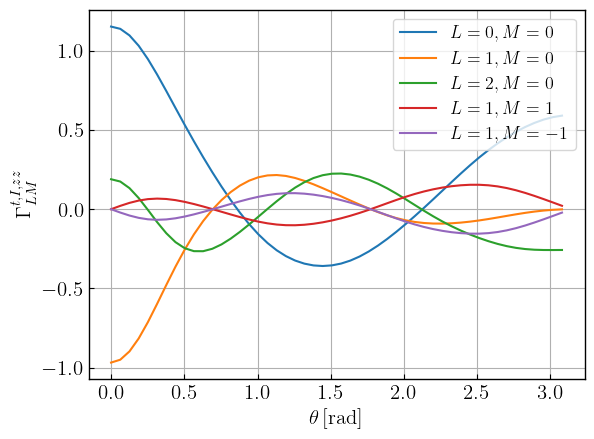

In [649]:
plt.plot(x,gamI00,label="$L=0,M=0$")
plt.plot(x,gamI10,label="$L=1,M=0$")
plt.plot(x,gamI20,label="$L=2,M=0$")
plt.plot(x,gamI11,label="$L=1,M=1$")
plt.plot(x,gamI1m1,label="$L=1,M=-1$")

plt.xlabel("$\\theta\,[\mathrm{rad}]$")
plt.ylabel("$\Gamma^{t,I,zz}_{LM}$")
plt.legend(loc='upper right',fontsize = 13)

plt.show()

### $\Gamma^{t,V,zz}_{LM}$

In [129]:
gamV00 = GamV(0,0,x,lmax)

In [130]:
gamV11 = GamV(1,1,x,lmax)

In [131]:
gamV21 = GamV(2,1,x,lmax)

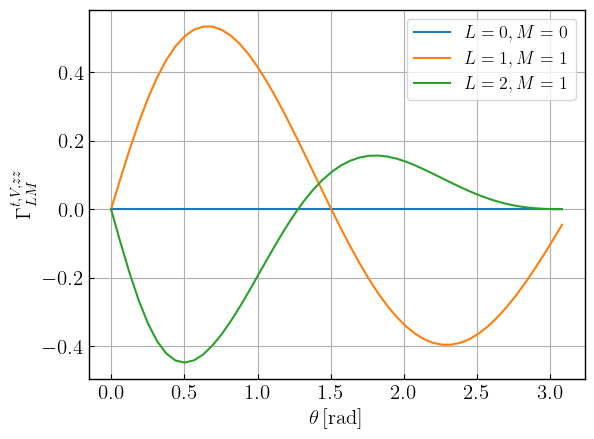

In [646]:
plt.plot(x,gamV00,label="$L=0,M=0$")
plt.plot(x,gamV11,label="$L=1,M=1$")
plt.plot(x,gamV21,label="$L=2,M=1$")


plt.xlabel("$\\theta\,[\mathrm{rad}]$")
plt.ylabel("$\Gamma^{t,V,zz}_{LM}$")
plt.legend(loc='upper right',fontsize = 13)

plt.show()

### $\Gamma^{t,E,zz}_{LM}$

In [133]:
gamE20 = GamE(2,0,x,lmax)

In [134]:
gamE30 = GamE(3,0,x,lmax)

In [135]:
gamE40 = GamE(4,0,x,lmax)

In [136]:
gamE50 = GamE(5,0,x,lmax)

In [137]:
gamE60 = GamE(6,0,x,lmax)

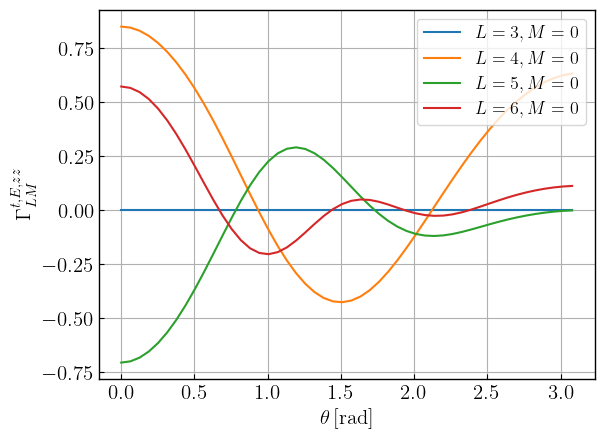

In [138]:
plt.plot(x,gamE30,label="$L=3,M=0$")
plt.plot(x,gamE40,label="$L=4,M=0$")
plt.plot(x,gamE50,label="$L=5,M=0$")
plt.plot(x,gamE60,label="$L=6,M=0$")

plt.xlabel("$\\theta\,[\mathrm{rad}]$")
plt.ylabel("$\Gamma^{t,E,zz}_{LM}$")
plt.legend(loc='upper right',fontsize = 13)

plt.show()

### $\Gamma^{t,B,zz}_{LM}$

In [139]:
gamB31 = GamB(3,1,x,lmax)

In [140]:
gamB41 = GamB(4,1,x,lmax)

In [142]:
gamB51 = GamB(5,1,x,lmax)

In [144]:
gamB61 = GamB(6,1,x,lmax)

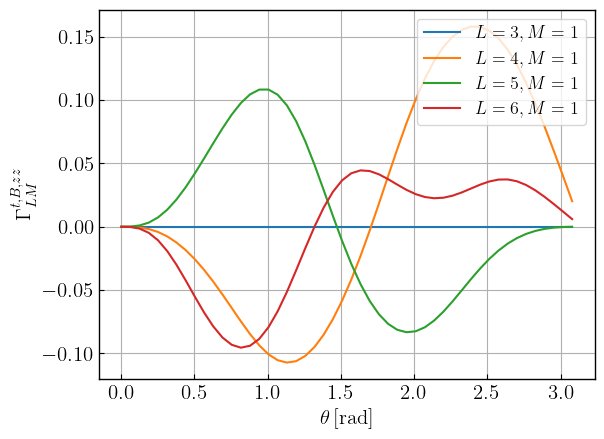

In [145]:
plt.plot(x,gamB31,label="$L=3,M=1$")
plt.plot(x,gamB41,label="$L=4,M=1$")
plt.plot(x,gamB51,label="$L=5,M=1$")
plt.plot(x,gamB61,label="$L=6,M=1$")

plt.xlabel("$\\theta\,[\mathrm{rad}]$")
plt.ylabel("$\Gamma^{t,B,zz}_{LM}$")
plt.legend(loc='upper right',fontsize = 13)

plt.show()

## $\Gamma^{v,X,zz}_{LM}$ (spin-1 GWs)

### $\Gamma^{v,I,zz}_{LM}$

In [399]:
gamI_v00 = GamI_v(0,0,x,lmax)
gamI_v10 = GamI_v(1,0,x,lmax)
gamI_v11 = GamI_v(1,1,x,lmax)

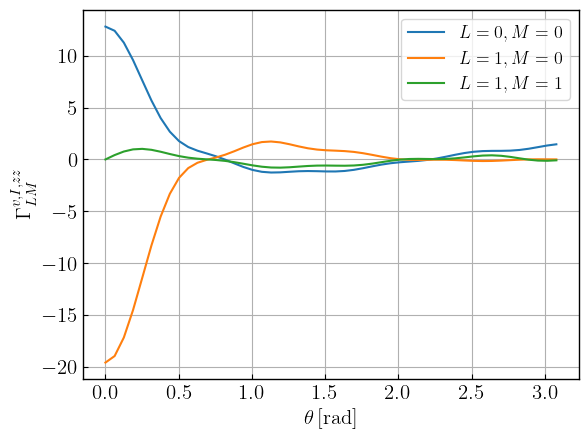

In [400]:
plt.plot(x,gamI_v00,label="$L=0,M=0$")
plt.plot(x,gamI_v10,label="$L=1,M=0$")
plt.plot(x,gamI_v11,label="$L=1,M=1$")

plt.xlabel("$\\theta\,[\mathrm{rad}]$")
plt.ylabel("$\Gamma^{v,I,zz}_{LM}$")
plt.legend(loc='upper right',fontsize = 13)

plt.show()

### $\Gamma^{v,V,zz}_{LM}$

In [401]:
gamV_v00 = GamV_v(0,0,x,lmax)
gamV_v10 = GamV_v(1,0,x,lmax)
gamV_v11 = GamV_v(1,1,x,lmax)

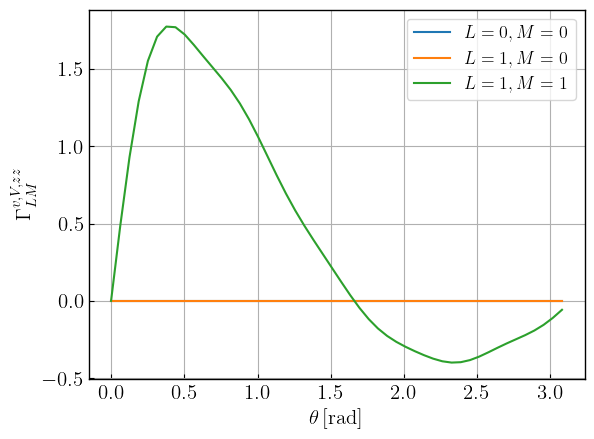

In [402]:
plt.plot(x,gamV_v00,label="$L=0,M=0$")
plt.plot(x,gamV_v10,label="$L=1,M=0$")
plt.plot(x,gamV_v11,label="$L=1,M=1$")

plt.xlabel("$\\theta\,[\mathrm{rad}]$")
plt.ylabel("$\Gamma^{v,V,zz}_{LM}$")
plt.legend(loc='upper right',fontsize = 13)

plt.show()

### $\Gamma^{v,E,zz}_{LM}$

In [408]:
gamE_v10 = GamE_v(1,0,x,lmax)
gamE_v11 = GamE_v(1,1,x,lmax)
gamE_v20 = GamE_v(2,0,x,lmax)
gamE_v21 = GamE_v(2,1,x,lmax)

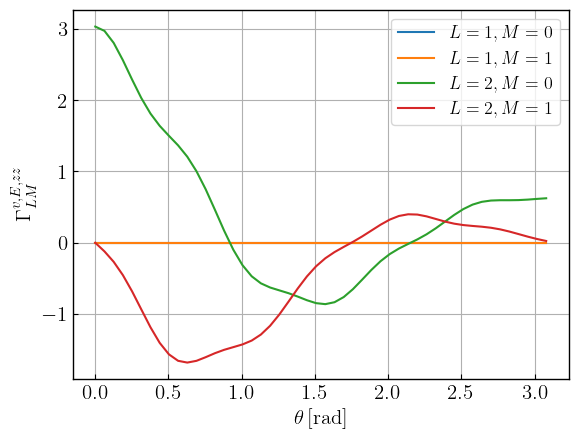

In [409]:
plt.plot(x,gamE_v10,label="$L=1,M=0$")
plt.plot(x,gamE_v11,label="$L=1,M=1$")
plt.plot(x,gamE_v20,label="$L=2,M=0$")
plt.plot(x,gamE_v21,label="$L=2,M=1$")

plt.xlabel("$\\theta\,[\mathrm{rad}]$")
plt.ylabel("$\Gamma^{v,E,zz}_{LM}$")
plt.legend(loc='upper right',fontsize = 13)

plt.show()

### $\Gamma^{v,B,zz}_{LM}$

In [410]:
gamB_v10 = GamB_v(1,0,x,lmax)
gamB_v11 = GamB_v(1,1,x,lmax)
gamB_v20 = GamB_v(2,0,x,lmax)
gamB_v21 = GamB_v(2,1,x,lmax)

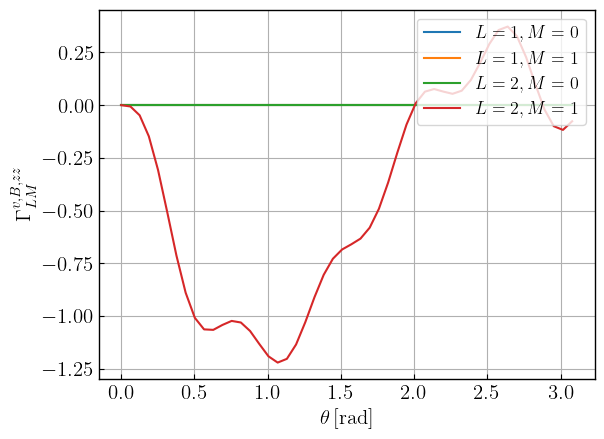

In [411]:
plt.plot(x,gamB_v10,label="$L=1,M=0$")
plt.plot(x,gamB_v11,label="$L=1,M=1$")
plt.plot(x,gamB_v20,label="$L=2,M=0$")
plt.plot(x,gamB_v21,label="$L=2,M=1$")

plt.xlabel("$\\theta\,[\mathrm{rad}]$")
plt.ylabel("$\Gamma^{v,B,zz}_{LM}$")
plt.legend(loc='upper right',fontsize = 13)

plt.show()

# $\Gamma^{p,X,ST}_{LM,\alpha\beta}$ in $p \in \{t,v\}$, $X \in \{I,V,E,B\}$, $S,T \in \{E,B\}$, and $\alpha,\beta \in \{\theta, \phi\}$

## define functions

In [528]:
def mod_Y(l,m,theta): # modified spherical harmonics
    yy=0
    if(abs(m)<=l):
        yy = sc.sph_harm(m,l,0,theta)
    return yy

def Y_S(l,m,theta,S,alpha): # Y^S_alpha, S=E=0, =B=0, alpha=theta=0, =phi=1 
    #NOTE: the order of l and m is changed from sc.sph_harm(m,l,0,theta).
    #The expressions of the vector spherical harmonics are from Eqs.(D1) and (D2) in arXiv:1810.02369.
    yy = 0
    if S==0: # Y^E
        if alpha == 0: # Y_theta
            yy = -1/2/np.sqrt(l*(l+1))*( np.sqrt((l-m)*(l+m+1))*mod_Y(l,m+1,theta) - np.sqrt((l+m)*(l-m+1))*mod_Y(l,m-1,theta) )
        elif alpha == 1: # Y_phi/i, 
            yy = -1/np.sqrt(l*(l+1))*m/np.sqrt(1- pow(np.cos(theta),2))*sc.sph_harm(m,l,0,theta)
        else:
            print('error alpha is not 0 or 1')
    if S==1: # Y^B 
        if alpha == 0: # Y_theta/i
            yy = 1/np.sqrt(l*(l+1))*m/np.sqrt(1- pow(np.cos(theta),2))*sc.sph_harm(m,l,0,theta)
        elif alpha == 1: # Y_phi
            yy = -1/2/np.sqrt(l*(l+1))*( np.sqrt((l-m)*(l+m+1))*mod_Y(l,m+1,theta) - np.sqrt((l+m)*(l-m+1))*mod_Y(l,m-1,theta) )
        else:
            print('error alpha is not 0 or 1')
    return yy

def YY_ST(l,ld,L,M,theta,S,T,alpha,beta): # Y^S_{alpha} x Y^T_{beta} in S,T={E,B} and alpha,beta={theta,phi}
    yy=0
    for m in range(-l,l+1):
        for md in range(-ld,ld+1):
            yy = yy+ CG(l,m,ld,md,L,M).doit()*Y_S(l,m,0.001,S,alpha)*Y_S(ld,md,theta,T,beta) 
            ## NOTE: 0.0001 is substituted to avoid the coordinate singularity 
    return yy
    
def Elt(l): # E^t_l
    return 2/np.sqrt(l*(l+1))*zlt(l)
def Elv(l): # E^v_l
    elv = pow(-1,l+1)*np.sqrt(4*np.pi*(2*l+1)/l/(l+1))/np.sqrt(l*(l+1))
    if l==1: 
        elv = elv - pow(-1,l+1)*np.sqrt(4*np.pi*(2*l+1)/l/(l+1))*2*np.sqrt(2)/3
    return elv


def Blt(l): # B^t_l/i, NOTE: i omitted. Strictly, B^t_l = (-i) E^t_l
    return -Elt(l)
def Blv(l): # B^v_l/i, NOTE: i omitted. 
    return -zlv(l)/np.sqrt(l*(l+1))
    

def FI_eb(l,ld,L,M):
    return -2*Elt(l)*Blt(ld)*wigner_3j(l,ld,L,-2,2,0)*(1-xLll(l,ld,L))
def FV_eb(l,ld,L,M):
    return 2*Elt(l)*Blt(ld)*wigner_3j(l,ld,L,-2,2,0)*xLll(l,ld,L)
def FE_eb(l,ld,L,M):
    return -2*Elt(l)*Blt(ld)*wigner_3j(l,ld,L,2,2,-4)*(1-xLll(l,ld,L))
def FB_eb(l,ld,L,M):
    return -2*Elt(l)*Blt(ld)*wigner_3j(l,ld,L,2,2,-4)*xLll(l,ld,L)

def FI_eb_v(l,ld,L,M):
    return 2*Elv(l)*Blv(ld)*wigner_3j(l,ld,L,-1,1,0)*(1-xLll(l,ld,L))
def FV_eb_v(l,ld,L,M):
    return -2*Elv(l)*Blv(ld)*wigner_3j(l,ld,L,-1,1,0)*xLll(l,ld,L)
def FE_eb_v(l,ld,L,M):
    return -2*Elv(l)*Blv(ld)*wigner_3j(l,ld,L,1,1,-2)*(1-xLll(l,ld,L))
def FB_eb_v(l,ld,L,M):
    return -2*Elv(l)*Blv(ld)*wigner_3j(l,ld,L,1,1,-2)*xLll(l,ld,L)

def GamI_eb(L,M,theta,lmax,alpha,beta):
    gam = 0
    for l in range(2,lmax+1):
        for ld in range(2,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FI_eb(l,ld,L,M)*YY_ST(l,ld,L,M,theta,0,1,alpha,beta)
    return gam
def GamV_eb(L,M,theta,lmax,alpha,beta):
    gam = 0
    for l in range(2,lmax+1):
        for ld in range(2,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FV_eb(l,ld,L,M)*YY_ST(l,ld,L,M,theta,0,1,alpha,beta)
    return gam    
def GamE_eb(L,M,theta,lmax,alpha,beta):
    gam = 0
    for l in range(2,lmax+1):
        for ld in range(2,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FE_eb(l,ld,L,M)*YY_ST(l,ld,L,M,theta,0,1,alpha,beta)
    return gam    
def GamB_eb(L,M,theta,lmax,alpha,beta):
    gam = 0
    for l in range(2,lmax+1):
        for ld in range(2,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FB_eb(l,ld,L,M)*YY_ST(l,ld,L,M,theta,0,1,alpha,beta)
    return gam    


def GamI_eb_v(L,M,theta,lmax,alpha,beta):
    gam = 0
    for l in range(1,lmax+1):
        for ld in range(1,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FI_eb_v(l,ld,L,M)*YY_ST(l,ld,L,M,theta,0,1,alpha,beta)
    return gam
def GamV_eb_v(L,M,theta,lmax,alpha,beta):
    gam = 0
    for l in range(1,lmax+1):
        for ld in range(1,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FV_eb_v(l,ld,L,M)*YY_ST(l,ld,L,M,theta,0,1,alpha,beta)
    return gam
def GamE_eb_v(L,M,theta,lmax,alpha,beta):
    gam = 0
    for l in range(1,lmax+1):
        for ld in range(1,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FE_eb_v(l,ld,L,M)*YY_ST(l,ld,L,M,theta,0,1,alpha,beta)
    return gam
def GamB_eb_v(L,M,theta,lmax,alpha,beta):
    gam = 0
    for l in range(1,lmax+1):
        for ld in range(1,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FB_eb_v(l,ld,L,M)*YY_ST(l,ld,L,M,theta,0,1,alpha,beta)
    return gam

def FI_ee(l,ld,L,M):
    return 4/np.sqrt(l*(l+1)*ld*(ld+1))*FIzz(l,ld,L,M)
def FV_ee(l,ld,L,M):
    return 4/np.sqrt(l*(l+1)*ld*(ld+1))*FVzz(l,ld,L,M)
def FE_ee(l,ld,L,M):
    return 4/np.sqrt(l*(l+1)*ld*(ld+1))*FEzz(l,ld,L,M)    
def FB_ee(l,ld,L,M):
    return 4/np.sqrt(l*(l+1)*ld*(ld+1))*FBzz(l,ld,L,M)

def FI_ee_v(l,ld,L,M):
    return Elv(l)*Elv(ld)/zlv(l)/zlv(ld)*FIzz_v(l,ld,L,M)
def FV_ee_v(l,ld,L,M):
    return Elv(l)*Elv(ld)/zlv(l)/zlv(ld)*FVzz_v(l,ld,L,M)
def FE_ee_v(l,ld,L,M):
    return Elv(l)*Elv(ld)/zlv(l)/zlv(ld)*FEzz_v(l,ld,L,M)
def FB_ee_v(l,ld,L,M):
    return Elv(l)*Elv(ld)/zlv(l)/zlv(ld)*FBzz_v(l,ld,L,M)

def GamI_ee(L,M,theta,lmax,alpha,beta):
    gam = 0
    for l in range(2,lmax+1):
        for ld in range(2,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FI_ee(l,ld,L,M)*YY_ST(l,ld,L,M,theta,0,0,alpha,beta)
    return gam
def GamV_ee(L,M,theta,lmax,alpha,beta):
    gam = 0
    for l in range(2,lmax+1):
        for ld in range(2,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FV_ee(l,ld,L,M)*YY_ST(l,ld,L,M,theta,0,0,alpha,beta)
    return gam   
def GamE_ee(L,M,theta,lmax,alpha,beta):
    gam = 0
    for l in range(2,lmax+1):
        for ld in range(2,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FE_ee(l,ld,L,M)*YY_ST(l,ld,L,M,theta,0,0,alpha,beta)
    return gam  
def GamB_ee(L,M,theta,lmax,alpha,beta):
    gam = 0
    for l in range(2,lmax+1):
        for ld in range(2,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FB_ee(l,ld,L,M)*YY_ST(l,ld,L,M,theta,0,0,alpha,beta)
    return gam    


def GamI_ee_v(L,M,theta,lmax,alpha,beta):
    gam = 0
    for l in range(1,lmax+1):
        for ld in range(1,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FI_ee_v(l,ld,L,M)*YY_ST(l,ld,L,M,theta,0,0,alpha,beta)
    return gam
def GamV_ee_v(L,M,theta,lmax,alpha,beta):
    gam = 0
    for l in range(1,lmax+1):
        for ld in range(1,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FV_ee_v(l,ld,L,M)*YY_ST(l,ld,L,M,theta,0,0,alpha,beta)
    return gam
def GamE_ee_v(L,M,theta,lmax,alpha,beta):
    gam = 0
    for l in range(1,lmax+1):
        for ld in range(1,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FE_ee_v(l,ld,L,M)*YY_ST(l,ld,L,M,theta,0,0,alpha,beta)
    return gam
def GamB_ee_v(L,M,theta,lmax,alpha,beta):
    gam = 0
    for l in range(1,lmax+1):
        for ld in range(1,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FB_ee_v(l,ld,L,M)*YY_ST(l,ld,L,M,theta,0,0,alpha,beta)
    return gam

### Added additional (-1) in the end to take into account B^* = -B^* because B \propto i
def FI_be(l,ld,L,M):
    return -2*Blt(l)*Elt(ld)*wigner_3j(l,ld,L,-2,2,0)*(1-xLll(l,ld,L))*(-1)
def FV_be(l,ld,L,M):
    return 2*Blt(l)*Elt(ld)*wigner_3j(l,ld,L,-2,2,0)*xLll(l,ld,L)*(-1)
def FE_be(l,ld,L,M):
    return 2*Blt(l)*Elt(ld)*wigner_3j(l,ld,L,2,2,-4)*(1-xLll(l,ld,L))*(-1)
def FB_be(l,ld,L,M):
    return 2*Blt(l)*Elt(ld)*wigner_3j(l,ld,L,2,2,-4)*xLll(l,ld,L)*(-1)
## NOTE: above expressions FX_be() is used for Gamma^{Sz} and Gamma^{zS}

def FI_be_v(l,ld,L,M):
    return 2*Blv(l)*Elv(ld)*wigner_3j(l,ld,L,-1,1,0)*(1-xLll(l,ld,L))*(-1)
def FV_be_v(l,ld,L,M):
    return -2*Blv(l)*Elv(ld)*wigner_3j(l,ld,L,-1,1,0)*xLll(l,ld,L)*(-1)
def FE_be_v(l,ld,L,M):
    return 2*Blv(l)*Elv(ld)*wigner_3j(l,ld,L,1,1,-2)*(1-xLll(l,ld,L))*(-1)
def FB_be_v(l,ld,L,M):
    return 2*Blv(l)*Elv(ld)*wigner_3j(l,ld,L,1,1,-2)*xLll(l,ld,L)*(-1)

def GamI_be_v(L,M,theta,lmax,alpha,beta):
    gam = 0
    for l in range(1,lmax+1):
        for ld in range(1,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FI_be_v(l,ld,L,M)*YY_ST(l,ld,L,M,theta,1,0,alpha,beta)
    return gam
def GamV_be_v(L,M,theta,lmax,alpha,beta):
    gam = 0
    for l in range(1,lmax+1):
        for ld in range(1,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FV_be_v(l,ld,L,M)*YY_ST(l,ld,L,M,theta,1,0,alpha,beta)
    return gam
def GamE_be_v(L,M,theta,lmax,alpha,beta):
    gam = 0
    for l in range(1,lmax+1):
        for ld in range(1,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FE_be_v(l,ld,L,M)*YY_ST(l,ld,L,M,theta,1,0,alpha,beta)
    return gam
def GamB_be_v(L,M,theta,lmax,alpha,beta):
    gam = 0
    for l in range(1,lmax+1):
        for ld in range(1,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FB_be_v(l,ld,L,M)*YY_ST(l,ld,L,M,theta,1,0,alpha,beta)
    return gam


def FI_bb_v(l,ld,L,M):
    return -2*Blv(l)*Blv(ld)*wigner_3j(l,ld,L,-1,1,0)*xLll(l,ld,L)
def FV_bb_v(l,ld,L,M):
    return 2*Blv(l)*Blv(ld)*wigner_3j(l,ld,L,-1,1,0)*(1-xLll(l,ld,L))
def FE_bb_v(l,ld,L,M):
    return -2*Blv(l)*Blv(ld)*wigner_3j(l,ld,L,1,1,-2)*xLll(l,ld,L)
def FB_bb_v(l,ld,L,M):
    return -2*Blv(l)*Blv(ld)*wigner_3j(l,ld,L,1,1,-2)*(1-xLll(l,ld,L))

def GamI_bb_v(L,M,theta,lmax,alpha,beta):
    gam = 0
    for l in range(1,lmax+1):
        for ld in range(1,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FI_bb_v(l,ld,L,M)*YY_ST(l,ld,L,M,theta,1,1,alpha,beta)
    return gam
def GamV_bb_v(L,M,theta,lmax,alpha,beta):
    gam = 0
    for l in range(1,lmax+1):
        for ld in range(1,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FV_bb_v(l,ld,L,M)*YY_ST(l,ld,L,M,theta,1,1,alpha,beta)
    return gam
def GamE_bb_v(L,M,theta,lmax,alpha,beta):
    gam = 0
    for l in range(1,lmax+1):
        for ld in range(1,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FE_bb_v(l,ld,L,M)*YY_ST(l,ld,L,M,theta,1,1,alpha,beta)
    return gam
def GamB_bb_v(L,M,theta,lmax,alpha,beta):
    gam = 0
    for l in range(1,lmax+1):
        for ld in range(1,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FB_bb_v(l,ld,L,M)*YY_ST(l,ld,L,M,theta,1,1,alpha,beta)
    return gam



## determine the number of plot points and lmax

In [305]:
div = 50 # number of points between [0, Pi]
lmax = 10 # max value of l which we take into account
epsilon = 1e-4 # regulator
x = np.arange(epsilon, np.pi-epsilon, np.pi/div)

## $\Gamma^{t,X,ST}_{LM,\alpha\beta}$ (spin-2 GWs)

### $\Gamma^{t,X,EE}_{LM,\alpha\beta}$

#### $\Gamma^{t,I,EE}_{LM,\alpha\beta}$ in $\alpha,\beta \in \{\theta,\phi\}$

In [375]:
gamI_ee_tt00 = GamI_ee(0,0,x,lmax,0,0)
gamI_ee_tt10 = GamI_ee(1,0,x,lmax,0,0)
gamI_ee_tt11 = GamI_ee(1,1,x,lmax,0,0)

In [376]:
gamI_ee_tp00 = GamI_ee(0,0,x,lmax,0,1)
gamI_ee_tp10 = GamI_ee(1,0,x,lmax,0,1)
gamI_ee_tp11 = GamI_ee(1,1,x,lmax,0,1)

In [377]:
gamI_ee_pt00 = GamI_ee(0,0,x,lmax,1,0)
gamI_ee_pt10 = GamI_ee(1,0,x,lmax,1,0)
gamI_ee_pt11 = GamI_ee(1,1,x,lmax,1,0)

In [378]:
gamI_ee_pp00 = GamI_ee(0,0,x,lmax,1,1)
gamI_ee_pp10 = GamI_ee(1,0,x,lmax,1,1)
gamI_ee_pp11 = GamI_ee(1,1,x,lmax,1,1)

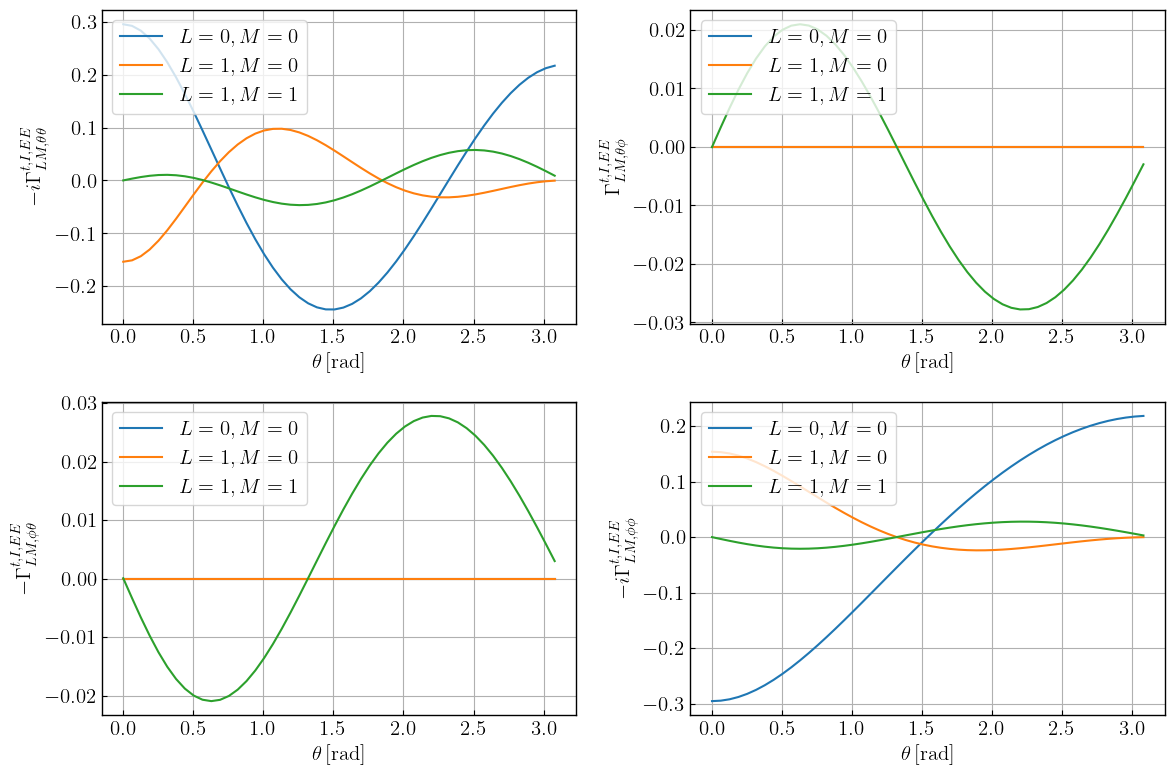

In [380]:
fig = plt.figure(figsize = (12,8),tight_layout=True)
#add_subplot(row,column,place)
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

bbox_dict = dict(edgecolor="black",facecolor="white")

ax1.plot(x,gamI_ee_tt00,label="$L=0,M=0$")
ax1.plot(x,gamI_ee_tt10,label="$L=1,M=0$")
ax1.plot(x,gamI_ee_tt11,label="$L=1,M=1$")

ax1.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax1.set_ylabel("$-i\Gamma^{t,I,EE}_{LM,\\theta\\theta}$")
fig.subplots_adjust(bottom=0.)
ax1.legend(loc='upper left')

ax2.plot(x,gamI_ee_tp00,label="$L=0,M=0$")
ax2.plot(x,gamI_ee_tp10,label="$L=1,M=0$")
ax2.plot(x,gamI_ee_tp11,label="$L=1,M=1$")

ax2.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax2.set_ylabel("$\Gamma^{t,I,EE}_{LM,\\theta\phi}$")
fig.subplots_adjust(bottom=0.)
ax2.legend(loc='upper left')

ax3.plot(x,gamI_ee_pt00,label="$L=0,M=0$")
ax3.plot(x,gamI_ee_pt10,label="$L=1,M=0$")
ax3.plot(x,gamI_ee_pt11,label="$L=1,M=1$")

ax3.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax3.set_ylabel("$-\Gamma^{t,I,EE}_{LM,\phi\\theta}$")
fig.subplots_adjust(bottom=0.)
ax3.legend(loc='upper left')

ax4.plot(x,gamI_ee_pp00,label="$L=0,M=0$")
ax4.plot(x,gamI_ee_pp10,label="$L=1,M=0$")
ax4.plot(x,gamI_ee_pp11,label="$L=1,M=1$")

ax4.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax4.set_ylabel("$-i\Gamma^{t,I,EE}_{LM,\phi\phi}$")
fig.subplots_adjust(bottom=0.)
ax4.legend(loc='upper left')

#fig.savefig("/Users/keisuke/Documents/XXX.pdf", bbox_inches='tight')
plt.show()

#### $\Gamma^{t,V,EE}_{LM,\alpha\beta}$ in $\alpha,\beta \in \{\theta,\phi\}$

In [386]:
gamV_ee_tt00 = GamV_ee(0,0,x,lmax,0,0)
gamV_ee_tt10 = GamV_ee(1,0,x,lmax,0,0)
gamV_ee_tt11 = GamV_ee(1,1,x,lmax,0,0)

gamV_ee_tp00 = GamV_ee(0,0,x,lmax,0,1)
gamV_ee_tp10 = GamV_ee(1,0,x,lmax,0,1)
gamV_ee_tp11 = GamV_ee(1,1,x,lmax,0,1)

gamV_ee_pt00 = GamV_ee(0,0,x,lmax,1,0)
gamV_ee_pt10 = GamV_ee(1,0,x,lmax,1,0)
gamV_ee_pt11 = GamV_ee(1,1,x,lmax,1,0)

gamV_ee_pp00 = GamV_ee(0,0,x,lmax,1,1)
gamV_ee_pp10 = GamV_ee(1,0,x,lmax,1,1)
gamV_ee_pp11 = GamV_ee(1,1,x,lmax,1,1)

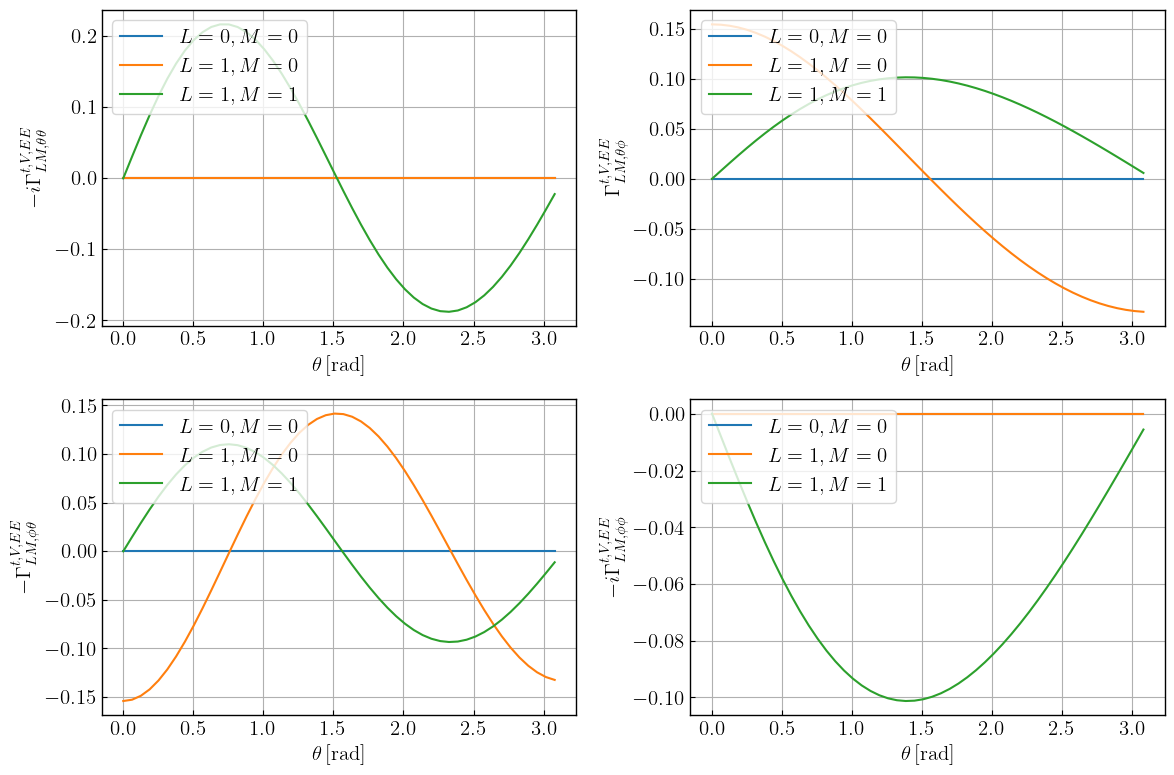

In [387]:
fig = plt.figure(figsize = (12,8),tight_layout=True)
#add_subplot(row,column,place)
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

bbox_dict = dict(edgecolor="black",facecolor="white")

ax1.plot(x,gamV_ee_tt00,label="$L=0,M=0$")
ax1.plot(x,gamV_ee_tt10,label="$L=1,M=0$")
ax1.plot(x,gamV_ee_tt11,label="$L=1,M=1$")

ax1.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax1.set_ylabel("$-i\Gamma^{t,V,EE}_{LM,\\theta\\theta}$")
fig.subplots_adjust(bottom=0.)
ax1.legend(loc='upper left')

ax2.plot(x,gamV_ee_tp00,label="$L=0,M=0$")
ax2.plot(x,gamV_ee_tp10,label="$L=1,M=0$")
ax2.plot(x,gamV_ee_tp11,label="$L=1,M=1$")

ax2.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax2.set_ylabel("$\Gamma^{t,V,EE}_{LM,\\theta\phi}$")
fig.subplots_adjust(bottom=0.)
ax2.legend(loc='upper left')

ax3.plot(x,gamV_ee_pt00,label="$L=0,M=0$")
ax3.plot(x,gamV_ee_pt10,label="$L=1,M=0$")
ax3.plot(x,gamV_ee_pt11,label="$L=1,M=1$")

ax3.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax3.set_ylabel("$-\Gamma^{t,V,EE}_{LM,\phi\\theta}$")
fig.subplots_adjust(bottom=0.)
ax3.legend(loc='upper left')

ax4.plot(x,gamV_ee_pp00,label="$L=0,M=0$")
ax4.plot(x,gamV_ee_pp10,label="$L=1,M=0$")
ax4.plot(x,gamV_ee_pp11,label="$L=1,M=1$")

ax4.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax4.set_ylabel("$-i\Gamma^{t,V,EE}_{LM,\phi\phi}$")
fig.subplots_adjust(bottom=0.)
ax4.legend(loc='upper left')

#fig.savefig("/Users/keisuke/Documents/XXX.pdf", bbox_inches='tight')
plt.show()

#### $\Gamma^{t,E,EE}_{LM,\alpha\beta}$ in $\alpha,\beta \in \{\theta,\phi\}$

In [388]:
gamE_ee_tt30 = GamE_ee(3,0,x,lmax,0,0)
gamE_ee_tt31 = GamE_ee(3,1,x,lmax,0,0)
gamE_ee_tt40 = GamE_ee(4,0,x,lmax,0,0)
gamE_ee_tt41 = GamE_ee(4,1,x,lmax,0,0)

In [389]:
gamE_ee_tp30 = GamE_ee(3,0,x,lmax,0,1)
gamE_ee_tp31 = GamE_ee(3,1,x,lmax,0,1)
gamE_ee_tp40 = GamE_ee(4,0,x,lmax,0,1)
gamE_ee_tp41 = GamE_ee(4,1,x,lmax,0,1)

In [390]:
gamE_ee_pt30 = GamE_ee(3,0,x,lmax,1,0)
gamE_ee_pt31 = GamE_ee(3,1,x,lmax,1,0)
gamE_ee_pt40 = GamE_ee(4,0,x,lmax,1,0)
gamE_ee_pt41 = GamE_ee(4,1,x,lmax,1,0)

In [391]:
gamE_ee_pp30 = GamE_ee(3,0,x,lmax,1,1)
gamE_ee_pp31 = GamE_ee(3,1,x,lmax,1,1)
gamE_ee_pp40 = GamE_ee(4,0,x,lmax,1,1)
gamE_ee_pp41 = GamE_ee(4,1,x,lmax,1,1)

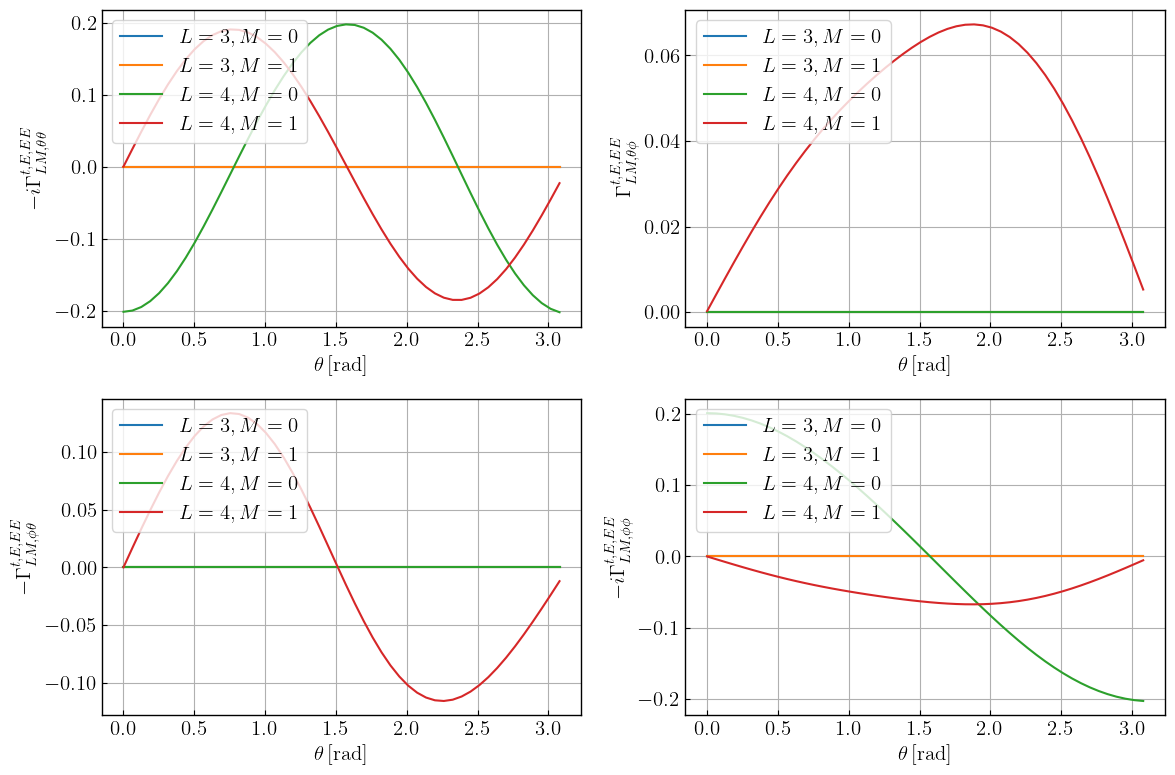

In [392]:
fig = plt.figure(figsize = (12,8),tight_layout=True)
#add_subplot(row,column,place)
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

bbox_dict = dict(edgecolor="black",facecolor="white")

ax1.plot(x,gamE_ee_tt30,label="$L=3,M=0$")
ax1.plot(x,gamE_ee_tt31,label="$L=3,M=1$")
ax1.plot(x,gamE_ee_tt40,label="$L=4,M=0$")
ax1.plot(x,gamE_ee_tt41,label="$L=4,M=1$")

ax1.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax1.set_ylabel("$-i\Gamma^{t,E,EE}_{LM,\\theta\\theta}$")
fig.subplots_adjust(bottom=0.)
ax1.legend(loc='upper left')

ax2.plot(x,gamE_ee_tp30,label="$L=3,M=0$")
ax2.plot(x,gamE_ee_tp31,label="$L=3,M=1$")
ax2.plot(x,gamE_ee_tp40,label="$L=4,M=0$")
ax2.plot(x,gamE_ee_tp41,label="$L=4,M=1$")

ax2.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax2.set_ylabel("$\Gamma^{t,E,EE}_{LM,\\theta\phi}$")
fig.subplots_adjust(bottom=0.)
ax2.legend(loc='upper left')

ax3.plot(x,gamE_ee_pt30,label="$L=3,M=0$")
ax3.plot(x,gamE_ee_pt31,label="$L=3,M=1$")
ax3.plot(x,gamE_ee_pt40,label="$L=4,M=0$")
ax3.plot(x,gamE_ee_pt41,label="$L=4,M=1$")

ax3.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax3.set_ylabel("$-\Gamma^{t,E,EE}_{LM,\phi\\theta}$")
fig.subplots_adjust(bottom=0.)
ax3.legend(loc='upper left')

ax4.plot(x,gamE_ee_pp30,label="$L=3,M=0$")
ax4.plot(x,gamE_ee_pp31,label="$L=3,M=1$")
ax4.plot(x,gamE_ee_pp40,label="$L=4,M=0$")
ax4.plot(x,gamE_ee_pp41,label="$L=4,M=1$")

ax4.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax4.set_ylabel("$-i\Gamma^{t,E,EE}_{LM,\phi\phi}$")
fig.subplots_adjust(bottom=0.)
ax4.legend(loc='upper left')

#fig.savefig("/Users/keisuke/Documents/XXX.pdf", bbox_inches='tight')
plt.show()

#### $\Gamma^{t,B,EE}_{LM,\alpha\beta}$ in $\alpha,\beta \in \{\theta,\phi\}$

In [393]:
gamB_ee_tt30 = GamB_ee(3,0,x,lmax,0,0)
gamB_ee_tt31 = GamB_ee(3,1,x,lmax,0,0)
gamB_ee_tt40 = GamB_ee(4,0,x,lmax,0,0)
gamB_ee_tt41 = GamB_ee(4,1,x,lmax,0,0)

In [394]:
gamB_ee_tp30 = GamB_ee(3,0,x,lmax,0,1)
gamB_ee_tp31 = GamB_ee(3,1,x,lmax,0,1)
gamB_ee_tp40 = GamB_ee(4,0,x,lmax,0,1)
gamB_ee_tp41 = GamB_ee(4,1,x,lmax,0,0)

In [395]:
gamB_ee_pt30 = GamB_ee(3,0,x,lmax,1,0)
gamB_ee_pt31 = GamB_ee(3,1,x,lmax,1,0)
gamB_ee_pt40 = GamB_ee(4,0,x,lmax,1,0)
gamB_ee_pt41 = GamB_ee(4,1,x,lmax,1,0)

In [396]:
gamB_ee_pp30 = GamB_ee(3,0,x,lmax,1,1)
gamB_ee_pp31 = GamB_ee(3,1,x,lmax,1,1)
gamB_ee_pp40 = GamB_ee(4,0,x,lmax,1,1)
gamB_ee_pp41 = GamB_ee(4,1,x,lmax,1,1)

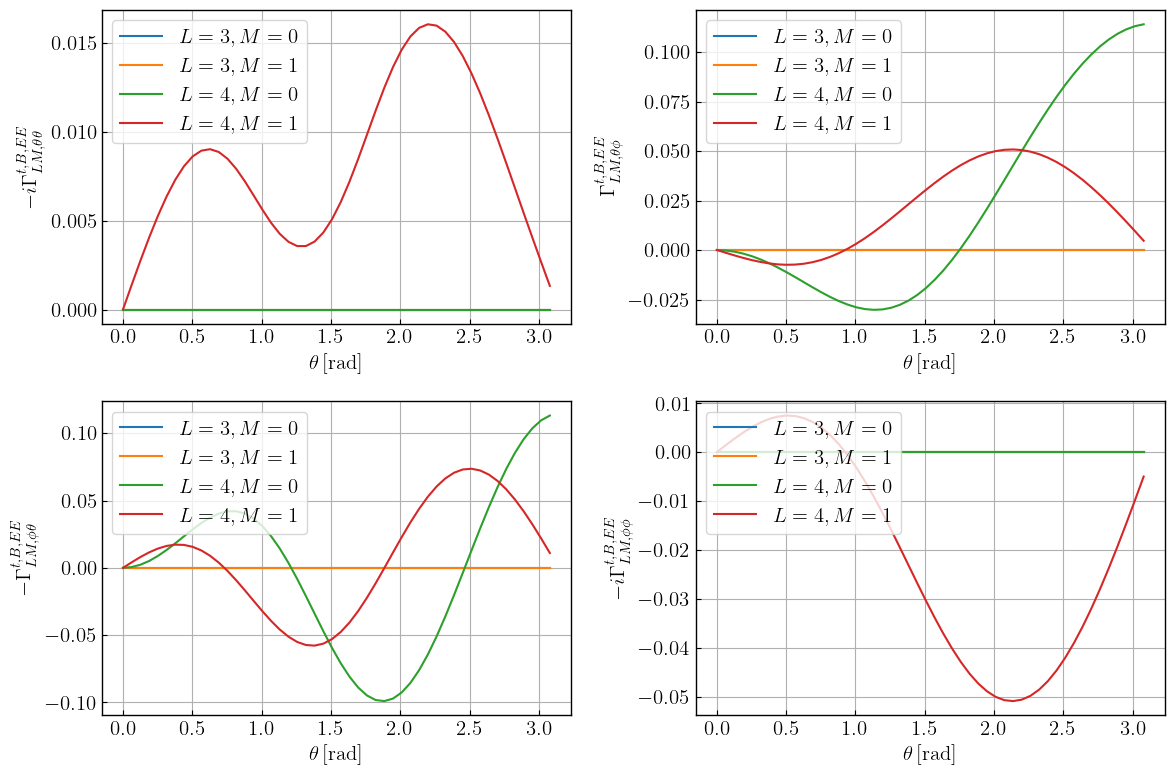

In [397]:
fig = plt.figure(figsize = (12,8),tight_layout=True)
#add_subplot(row,column,place)
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

bbox_dict = dict(edgecolor="black",facecolor="white")

ax1.plot(x,gamB_ee_tt30,label="$L=3,M=0$")
ax1.plot(x,gamB_ee_tt31,label="$L=3,M=1$")
ax1.plot(x,gamB_ee_tt40,label="$L=4,M=0$")
ax1.plot(x,gamB_ee_tt41,label="$L=4,M=1$")

ax1.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax1.set_ylabel("$-i\Gamma^{t,B,EE}_{LM,\\theta\\theta}$")
fig.subplots_adjust(bottom=0.)
ax1.legend(loc='upper left')

ax2.plot(x,gamB_ee_tp30,label="$L=3,M=0$")
ax2.plot(x,gamB_ee_tp31,label="$L=3,M=1$")
ax2.plot(x,gamB_ee_tp40,label="$L=4,M=0$")
ax2.plot(x,gamB_ee_tp41,label="$L=4,M=1$")

ax2.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax2.set_ylabel("$\Gamma^{t,B,EE}_{LM,\\theta\phi}$")
fig.subplots_adjust(bottom=0.)
ax2.legend(loc='upper left')

ax3.plot(x,gamB_ee_pt30,label="$L=3,M=0$")
ax3.plot(x,gamB_ee_pt31,label="$L=3,M=1$")
ax3.plot(x,gamB_ee_pt40,label="$L=4,M=0$")
ax3.plot(x,gamB_ee_pt41,label="$L=4,M=1$")

ax3.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax3.set_ylabel("$-\Gamma^{t,B,EE}_{LM,\phi\\theta}$")
fig.subplots_adjust(bottom=0.)
ax3.legend(loc='upper left')

ax4.plot(x,gamB_ee_pp30,label="$L=3,M=0$")
ax4.plot(x,gamB_ee_pp31,label="$L=3,M=1$")
ax4.plot(x,gamB_ee_pp40,label="$L=4,M=0$")
ax4.plot(x,gamB_ee_pp41,label="$L=4,M=1$")

ax4.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax4.set_ylabel("$-i\Gamma^{t,B,EE}_{LM,\phi\phi}$")
fig.subplots_adjust(bottom=0.)
ax4.legend(loc='upper left')

#fig.savefig("/Users/keisuke/Documents/XXX.pdf", bbox_inches='tight')
plt.show()

### $\Gamma^{t,X,EB}_{LM,\alpha\beta}$

#### $\Gamma^{t,I,EB}_{LM,\alpha\beta}$ in $\alpha,\beta \in \{\theta,\phi\}$

In [299]:
gamI_eb_tt00 = GamI_eb(0,0,x,lmax,0,0)

In [308]:
gamI_eb_tp00 = GamI_eb(0,0,x,lmax,0,1)

In [309]:
gamI_eb_pt00 = GamI_eb(0,0,x,lmax,1,0)

In [310]:
gamI_eb_pp00 = GamI_eb(0,0,x,lmax,1,1)

In [300]:
gamI_eb_tt10 = GamI_eb(1,0,x,lmax,0,0)

In [311]:
gamI_eb_tp10 = GamI_eb(1,0,x,lmax,0,1)

In [325]:
gamI_eb_tp11 = GamI_eb(1,1,x,lmax,0,1)

In [312]:
gamI_eb_pt10 = GamI_eb(1,0,x,lmax,1,0)

In [326]:
gamI_eb_pt11 = GamI_eb(1,1,x,lmax,1,0)

In [313]:
gamI_eb_pp10 = GamI_eb(1,0,x,lmax,1,1)

In [301]:
gamI_eb_tt20 = GamI_eb(2,0,x,lmax,0,0)

In [314]:
gamI_eb_tp20 = GamI_eb(2,0,x,lmax,0,1)

In [327]:
gamI_eb_tp21 = GamI_eb(2,1,x,lmax,0,1)

In [315]:
gamI_eb_pt20 = GamI_eb(2,0,x,lmax,1,0)

In [328]:
gamI_eb_pt21 = GamI_eb(2,1,x,lmax,1,0)

In [316]:
gamI_eb_pp20 = GamI_eb(2,0,x,lmax,1,1)

In [302]:
gamI_eb_tt30 = GamI_eb(3,0,x,lmax,0,0)

In [317]:
gamI_eb_tp30 = GamI_eb(3,0,x,lmax,0,1)

In [329]:
gamI_eb_tp31 = GamI_eb(3,1,x,lmax,0,1)

In [318]:
gamI_eb_pt30 = GamI_eb(3,0,x,lmax,1,0)

In [330]:
gamI_eb_pt31 = GamI_eb(3,1,x,lmax,1,0)

In [319]:
gamI_eb_pp30 = GamI_eb(3,0,x,lmax,1,1)

In [303]:
gamI_eb_tt11 = GamI_eb(1,1,x,lmax,0,0)

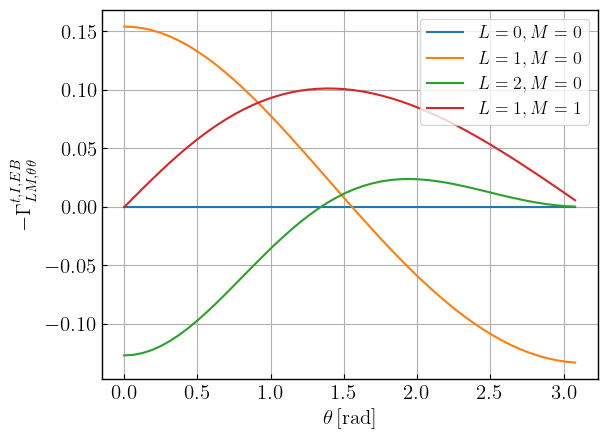

In [333]:
plt.plot(x,gamI_eb_tt00,label="$L=0,M=0$")
plt.plot(x,gamI_eb_tt10,label="$L=1,M=0$")
plt.plot(x,gamI_eb_tt20,label="$L=2,M=0$")
plt.plot(x,gamI_eb_tt11,label="$L=1,M=1$")

plt.xlabel("$\\theta\,[\mathrm{rad}]$")
plt.ylabel("$-\Gamma^{t,I,EB}_{LM,\\theta\\theta}$")
plt.legend(loc='upper right',fontsize = 13)

plt.show()
#plt.savefig("/Users/keisuke/.../XXX.pdf", bbox_inches='tight')

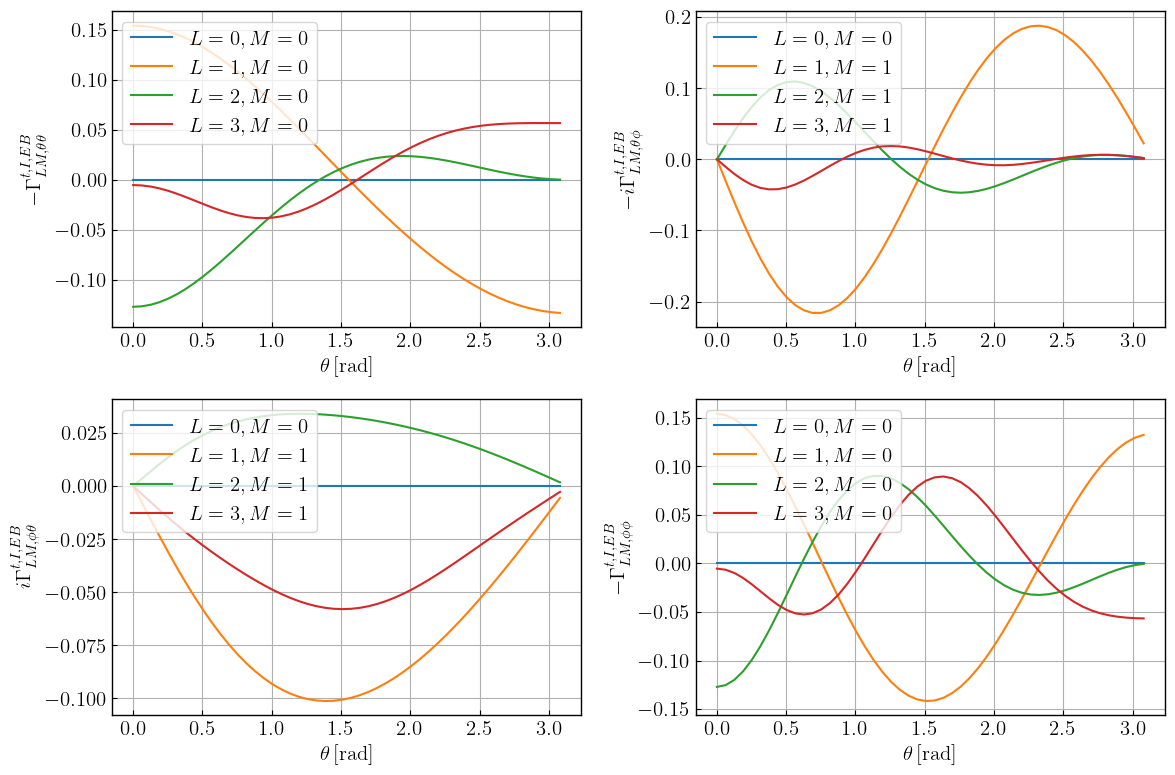

In [335]:
fig = plt.figure(figsize = (12,8),tight_layout=True)
#add_subplot(row,column,place)
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

bbox_dict = dict(edgecolor="black",facecolor="white")

ax1.plot(x,gamI_eb_tt00,label="$L=0,M=0$")
ax1.plot(x,gamI_eb_tt10,label="$L=1,M=0$")
ax1.plot(x,gamI_eb_tt20,label="$L=2,M=0$")
ax1.plot(x,gamI_eb_tt30,label="$L=3,M=0$")

#ax1.set_ylim([1e-16, 1e-6])
#ax1.set_xlim([1, 60])
#ax1.set_title("$N-N_0=0.87$ (thick), $=0.95$ (thin)",fontsize=16)
ax1.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax1.set_ylabel("$-\Gamma^{t,I,EB}_{LM,\\theta\\theta}$")
#ax1.set_xscale("log")
#ax1.set_yscale("log")
#ax1.set_xticks([1,2,5,10,20,50],[1,2,5,10,20,50])
#ax1.set_yticks([1e-18,1e-16,1e-14,1e-12,1e-10],["$10^{-18}$","","$10^{-14}$","","$10^{-10}$"])
fig.subplots_adjust(bottom=0.)
ax1.legend(loc='upper left')

ax2.plot(x,gamI_eb_tp00,label="$L=0,M=0$")
ax2.plot(x,gamI_eb_tp11,label="$L=1,M=1$")
ax2.plot(x,gamI_eb_tp21,label="$L=2,M=1$")
ax2.plot(x,gamI_eb_tp31,label="$L=3,M=1$")

ax2.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax2.set_ylabel("$-i\Gamma^{t,I,EB}_{LM,\\theta\phi}$")
fig.subplots_adjust(bottom=0.)
ax2.legend(loc='upper left')

ax3.plot(x,gamI_eb_pt00,label="$L=0,M=0$")
ax3.plot(x,gamI_eb_pt11,label="$L=1,M=1$")
ax3.plot(x,gamI_eb_pt21,label="$L=2,M=1$")
ax3.plot(x,gamI_eb_pt31,label="$L=3,M=1$")

ax3.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax3.set_ylabel("$i\Gamma^{t,I,EB}_{LM,\phi\\theta}$")
fig.subplots_adjust(bottom=0.)
ax3.legend(loc='upper left')

ax4.plot(x,gamI_eb_pp00,label="$L=0,M=0$")
ax4.plot(x,gamI_eb_pp10,label="$L=1,M=0$")
ax4.plot(x,gamI_eb_pp20,label="$L=2,M=0$")
ax4.plot(x,gamI_eb_pp30,label="$L=3,M=0$")

ax4.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax4.set_ylabel("$-\Gamma^{t,I,EB}_{LM,\phi\phi}$")
fig.subplots_adjust(bottom=0.)
ax4.legend(loc='upper left')

#fig.savefig("/Users/keisuke/Documents/XXX.pdf", bbox_inches='tight')
plt.show()

#### $\Gamma^{t,V,EB}_{LM,\alpha\beta}$ in $\alpha,\beta \in \{\theta,\phi\}$

In [338]:
gamV_eb_tt00 = GamV_eb(0,0,x,lmax,0,0)

In [343]:
gamV_eb_tp00 = GamV_eb(0,0,x,lmax,0,1)

In [345]:
gamV_eb_pt00 = GamV_eb(0,0,x,lmax,1,0)

In [346]:
gamV_eb_pp00 = GamV_eb(0,0,x,lmax,1,1)

In [339]:
gamV_eb_tt10 = GamV_eb(1,0,x,lmax,0,0)

In [344]:
gamV_eb_tp10 = GamV_eb(1,0,x,lmax,0,1)

In [347]:
gamV_eb_pt10 = GamV_eb(1,0,x,lmax,1,0)

In [348]:
gamV_eb_pp10 = GamV_eb(1,0,x,lmax,1,1)

In [342]:
gamV_eb_tt11 = GamV_eb(1,1,x,lmax,0,0)

In [349]:
gamV_eb_tp11 = GamV_eb(1,1,x,lmax,0,1)

In [350]:
gamV_eb_pt11 = GamV_eb(1,1,x,lmax,1,0)

In [351]:
gamV_eb_pp11 = GamV_eb(1,1,x,lmax,1,1)

In [341]:
gamV_eb_tt21 = GamV_eb(2,1,x,lmax,0,0)

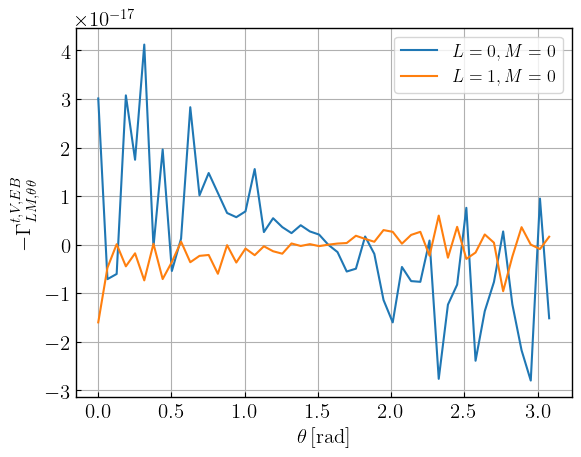

In [340]:
plt.plot(x,gamV_eb_tt00,label="$L=0,M=0$")
plt.plot(x,gamV_eb_tt10,label="$L=1,M=0$")

plt.xlabel("$\\theta\,[\mathrm{rad}]$")
plt.ylabel("$-\Gamma^{t,V,EB}_{LM,\\theta\\theta}$")
plt.legend(loc='upper right',fontsize = 13)

plt.show()
#plt.savefig("/Users/keisuke/.../XXX.pdf", bbox_inches='tight')

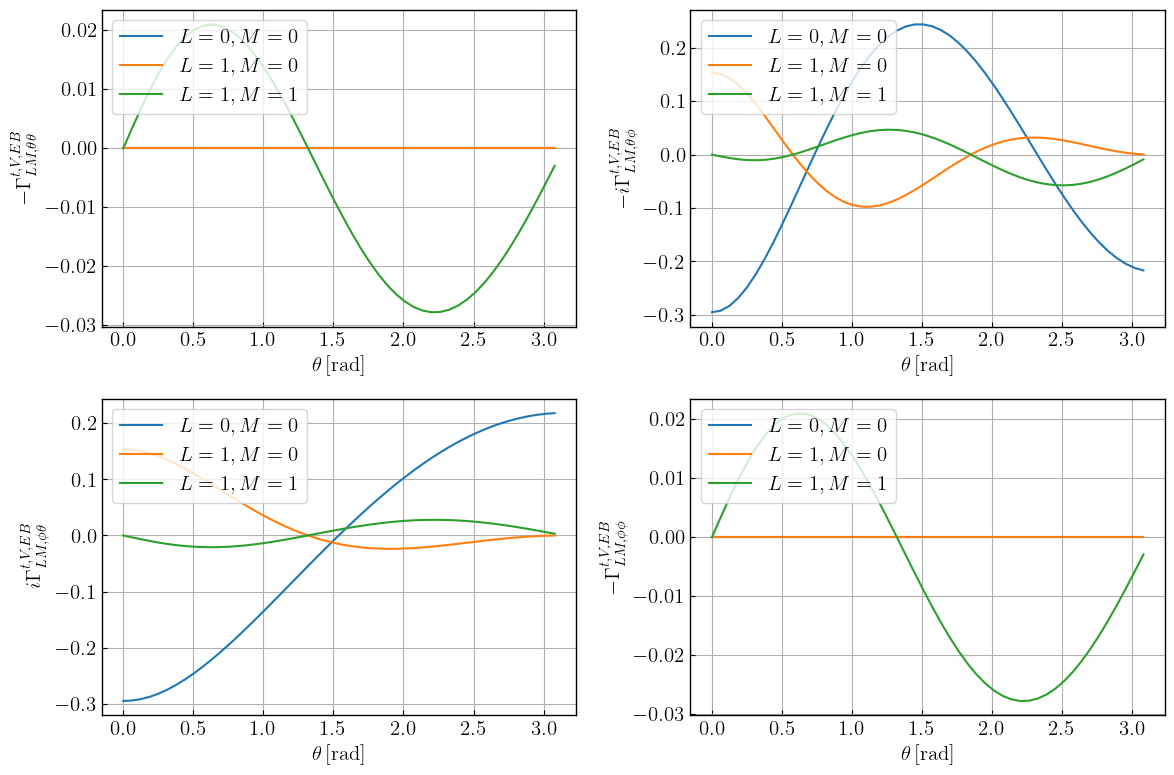

In [352]:
fig = plt.figure(figsize = (12,8),tight_layout=True)
#add_subplot(row,column,place)
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

bbox_dict = dict(edgecolor="black",facecolor="white")

ax1.plot(x,gamV_eb_tt00,label="$L=0,M=0$")
ax1.plot(x,gamV_eb_tt10,label="$L=1,M=0$")
ax1.plot(x,gamV_eb_tt11,label="$L=1,M=1$")

#ax1.set_ylim([1e-16, 1e-6])
#ax1.set_xlim([1, 60])
#ax1.set_title("$N-N_0=0.87$ (thick), $=0.95$ (thin)",fontsize=16)
ax1.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax1.set_ylabel("$-\Gamma^{t,V,EB}_{LM,\\theta\\theta}$")
#ax1.set_xscale("log")
#ax1.set_yscale("log")
#ax1.set_xticks([1,2,5,10,20,50],[1,2,5,10,20,50])
#ax1.set_yticks([1e-18,1e-16,1e-14,1e-12,1e-10],["$10^{-18}$","","$10^{-14}$","","$10^{-10}$"])
fig.subplots_adjust(bottom=0.)
ax1.legend(loc='upper left')

ax2.plot(x,gamV_eb_tp00,label="$L=0,M=0$")
ax2.plot(x,gamV_eb_tp10,label="$L=1,M=0$")
ax2.plot(x,gamV_eb_tp11,label="$L=1,M=1$")

ax2.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax2.set_ylabel("$-i\Gamma^{t,V,EB}_{LM,\\theta\phi}$")
fig.subplots_adjust(bottom=0.)
ax2.legend(loc='upper left')

ax3.plot(x,gamV_eb_pt00,label="$L=0,M=0$")
ax3.plot(x,gamV_eb_pt10,label="$L=1,M=0$")
ax3.plot(x,gamV_eb_pt11,label="$L=1,M=1$")

ax3.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax3.set_ylabel("$i\Gamma^{t,V,EB}_{LM,\phi\\theta}$")
fig.subplots_adjust(bottom=0.)
ax3.legend(loc='upper left')

ax4.plot(x,gamV_eb_pp00,label="$L=0,M=0$")
ax4.plot(x,gamV_eb_pp10,label="$L=1,M=0$")
ax4.plot(x,gamV_eb_pp11,label="$L=1,M=1$")

ax4.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax4.set_ylabel("$-\Gamma^{t,V,EB}_{LM,\phi\phi}$")
fig.subplots_adjust(bottom=0.)
ax4.legend(loc='upper left')

#fig.savefig("/Users/keisuke/Documents/XXX.pdf", bbox_inches='tight')
plt.show()

#### $\Gamma^{t,E,EB}_{LM,\alpha\beta}$ in $\alpha,\beta \in \{\theta,\phi\}$

In [353]:
gamE_eb_tt30 = GamE_eb(3,0,x,lmax,0,0)
gamE_eb_tt40 = GamE_eb(4,0,x,lmax,0,0)

In [355]:
gamE_eb_tp31 = GamE_eb(3,1,x,lmax,0,1)
gamE_eb_tp41 = GamE_eb(4,1,x,lmax,0,1)

In [357]:
gamE_eb_pt31 = GamE_eb(3,1,x,lmax,1,0)
gamE_eb_pt41 = GamE_eb(4,1,x,lmax,1,0)

In [358]:
gamE_eb_pp30 = GamE_eb(3,0,x,lmax,1,1)
gamE_eb_pp40 = GamE_eb(4,0,x,lmax,1,1)

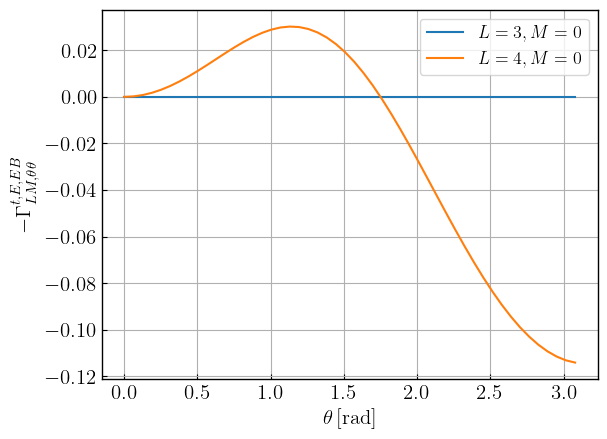

In [354]:
plt.plot(x,gamE_eb_tt30,label="$L=3,M=0$")
plt.plot(x,gamE_eb_tt40,label="$L=4,M=0$")

plt.xlabel("$\\theta\,[\mathrm{rad}]$")
plt.ylabel("$-\Gamma^{t,E,EB}_{LM,\\theta\\theta}$")
plt.legend(loc='upper right',fontsize = 13)

plt.show()
#plt.savefig("/Users/keisuke/.../XXX.pdf", bbox_inches='tight')

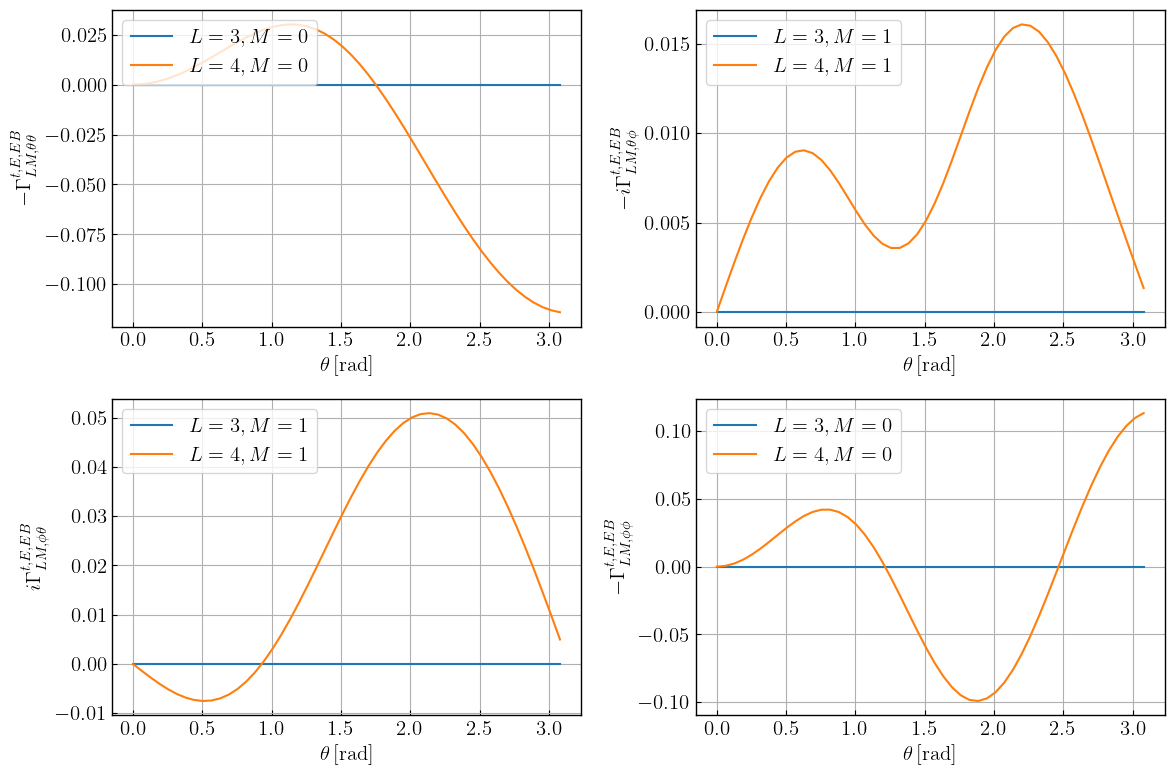

In [360]:
fig = plt.figure(figsize = (12,8),tight_layout=True)
#add_subplot(row,column,place)
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

bbox_dict = dict(edgecolor="black",facecolor="white")

ax1.plot(x,gamE_eb_tt30,label="$L=3,M=0$")
ax1.plot(x,gamE_eb_tt40,label="$L=4,M=0$")

#ax1.set_ylim([1e-16, 1e-6])
#ax1.set_xlim([1, 60])
#ax1.set_title("$N-N_0=0.87$ (thick), $=0.95$ (thin)",fontsize=16)
ax1.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax1.set_ylabel("$-\Gamma^{t,E,EB}_{LM,\\theta\\theta}$")
#ax1.set_xscale("log")
#ax1.set_yscale("log")
#ax1.set_xticks([1,2,5,10,20,50],[1,2,5,10,20,50])
#ax1.set_yticks([1e-18,1e-16,1e-14,1e-12,1e-10],["$10^{-18}$","","$10^{-14}$","","$10^{-10}$"])
fig.subplots_adjust(bottom=0.)
ax1.legend(loc='upper left')

ax2.plot(x,gamE_eb_tp31,label="$L=3,M=1$")
ax2.plot(x,gamE_eb_tp41,label="$L=4,M=1$")

ax2.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax2.set_ylabel("$-i\Gamma^{t,E,EB}_{LM,\\theta\phi}$")
fig.subplots_adjust(bottom=0.)
ax2.legend(loc='upper left')

ax3.plot(x,gamE_eb_pt31,label="$L=3,M=1$")
ax3.plot(x,gamE_eb_pt41,label="$L=4,M=1$")

ax3.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax3.set_ylabel("$i\Gamma^{t,E,EB}_{LM,\phi\\theta}$")
fig.subplots_adjust(bottom=0.)
ax3.legend(loc='upper left')

ax4.plot(x,gamE_eb_pp30,label="$L=3,M=0$")
ax4.plot(x,gamE_eb_pp40,label="$L=4,M=0$")

ax4.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax4.set_ylabel("$-\Gamma^{t,E,EB}_{LM,\phi\phi}$")
fig.subplots_adjust(bottom=0.)
ax4.legend(loc='upper left')

#fig.savefig("/Users/keisuke/Documents/XXX.pdf", bbox_inches='tight')
plt.show()

#### $\Gamma^{t,B,EB}_{LM,\alpha\beta}$ in $\alpha,\beta \in \{\theta,\phi\}$

In [367]:
gamB_eb_tt31 = GamB_eb(3,1,x,lmax,0,0)
gamB_eb_tt41 = GamB_eb(4,1,x,lmax,0,0)

In [368]:
gamB_eb_tp30 = GamB_eb(3,0,x,lmax,0,1)
gamB_eb_tp40 = GamB_eb(4,0,x,lmax,0,1)

In [369]:
gamB_eb_pt30 = GamB_eb(3,0,x,lmax,1,0)
gamB_eb_pt40 = GamB_eb(4,0,x,lmax,1,0)

In [370]:
gamB_eb_pp31 = GamB_eb(3,1,x,lmax,1,1)
gamB_eb_pp41 = GamB_eb(4,1,x,lmax,1,1)

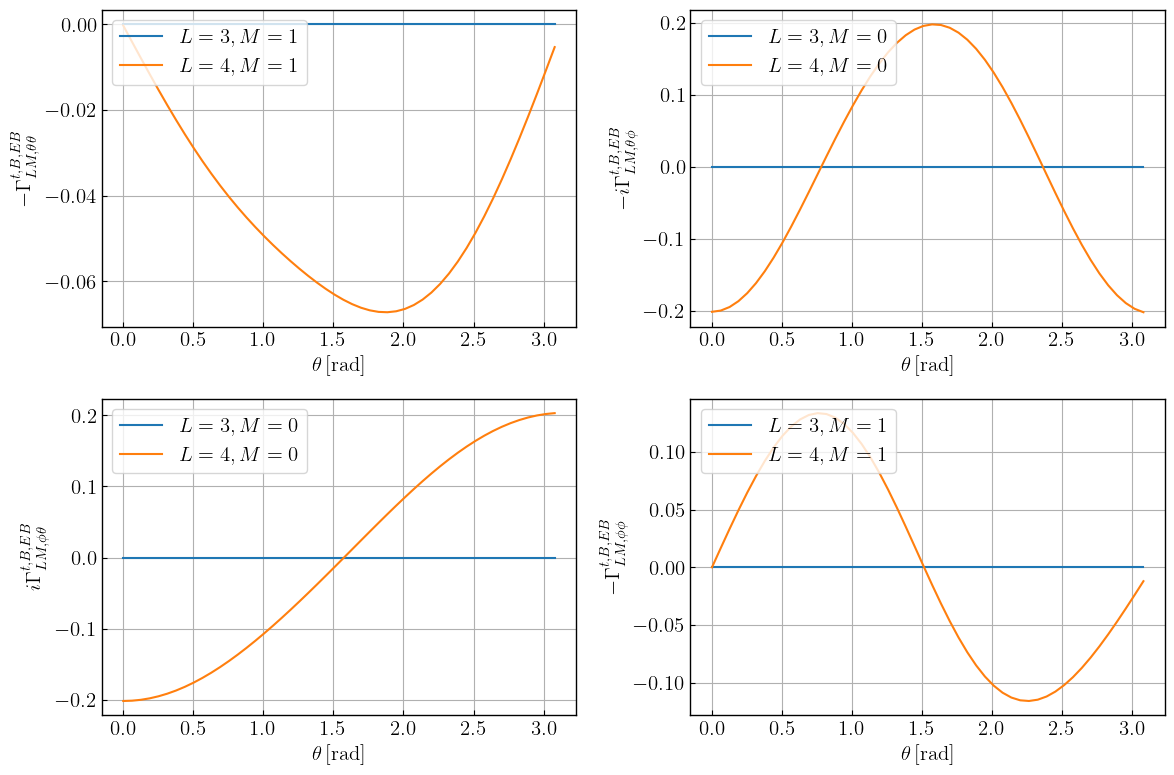

In [371]:
fig = plt.figure(figsize = (12,8),tight_layout=True)
#add_subplot(row,column,place)
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

bbox_dict = dict(edgecolor="black",facecolor="white")

ax1.plot(x,gamB_eb_tt31,label="$L=3,M=1$")
ax1.plot(x,gamB_eb_tt41,label="$L=4,M=1$")

#ax1.set_ylim([1e-16, 1e-6])
#ax1.set_xlim([1, 60])
#ax1.set_title("$N-N_0=0.87$ (thick), $=0.95$ (thin)",fontsize=16)
ax1.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax1.set_ylabel("$-\Gamma^{t,B,EB}_{LM,\\theta\\theta}$")
#ax1.set_xscale("log")
#ax1.set_yscale("log")
#ax1.set_xticks([1,2,5,10,20,50],[1,2,5,10,20,50])
#ax1.set_yticks([1e-18,1e-16,1e-14,1e-12,1e-10],["$10^{-18}$","","$10^{-14}$","","$10^{-10}$"])
fig.subplots_adjust(bottom=0.)
ax1.legend(loc='upper left')

ax2.plot(x,gamB_eb_tp30,label="$L=3,M=0$")
ax2.plot(x,gamB_eb_tp40,label="$L=4,M=0$")

ax2.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax2.set_ylabel("$-i\Gamma^{t,B,EB}_{LM,\\theta\phi}$")
fig.subplots_adjust(bottom=0.)
ax2.legend(loc='upper left')

ax3.plot(x,gamB_eb_pt30,label="$L=3,M=0$")
ax3.plot(x,gamB_eb_pt40,label="$L=4,M=0$")

ax3.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax3.set_ylabel("$i\Gamma^{t,B,EB}_{LM,\phi\\theta}$")
fig.subplots_adjust(bottom=0.)
ax3.legend(loc='upper left')

ax4.plot(x,gamB_eb_pp31,label="$L=3,M=1$")
ax4.plot(x,gamB_eb_pp41,label="$L=4,M=1$")

ax4.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax4.set_ylabel("$-\Gamma^{t,B,EB}_{LM,\phi\phi}$")
fig.subplots_adjust(bottom=0.)
ax4.legend(loc='upper left')

#fig.savefig("/Users/keisuke/Documents/XXX.pdf", bbox_inches='tight')
plt.show()

### $\Gamma^{t,X,BE}_{LM,\alpha\beta}$ and $\Gamma^{t,X,BB}_{LM,\alpha\beta}$ in $\alpha,\beta \in \{\theta,\phi\}$

From $E^t_l = (-i)B^t_l$, $Y^E_{\theta} = Y^B_{\phi}, Y^E_{\phi} = - Y^B_{\theta}$, and $F^{X,EE}=Z^X F^{X,BB}$ and $F^{X,EB}=-Z^X F^{X,BE}$ with $Z^X=1$ for $X\in\{I,V\}$ and $Z^X=-1$ for $X\in\{E,B\}$, we obtain 
$$
\begin{align}
\Gamma^{t,X,BE}_{\theta\theta} &= Z^X \Gamma^{t,X,EB}_{\phi\phi}, \\
\Gamma^{t,X,BE}_{\theta\phi} &= -Z^X\Gamma^{t,X,EB}_{\phi\theta}, \\
\Gamma^{t,X,BE}_{\phi\theta} &= -Z^X\Gamma^{t,X,EB}_{\theta\phi}, \\
\Gamma^{t,X,BE}_{\phi\phi} &= Z^X\Gamma^{t,X,EB}_{\theta\theta},
\end{align}
$$
$$
\begin{align}
\Gamma^{t,X,BB}_{\theta\theta} &= Z^X\Gamma^{t,X,EE}_{\phi\phi}, \\
\Gamma^{t,X,BB}_{\theta\phi} &= -Z^X\Gamma^{t,X,EE}_{\phi\theta}, \\
\Gamma^{t,X,BB}_{\phi\theta} &= -Z^X\Gamma^{t,X,EE}_{\theta\phi}, \\
\Gamma^{t,X,BB}_{\phi\phi} &= Z^X\Gamma^{t,X,EE}_{\theta\theta}.
\end{align}
$$

## $\Gamma^{v,X,ST}_{LM,\alpha\beta}$ (spin-1 GWs)

### $\Gamma^{v,X,EE}_{LM,\alpha\beta}$

In [445]:
gamI_ee_tt00_v = GamI_ee_v(0,0,x,lmax,0,0)
gamI_ee_tt10_v = GamI_ee_v(1,0,x,lmax,0,0)
gamI_ee_tt11_v = GamI_ee_v(1,1,x,lmax,0,0)

In [446]:
gamI_ee_tp00_v = GamI_ee_v(0,0,x,lmax,0,1)
gamI_ee_tp10_v = GamI_ee_v(1,0,x,lmax,0,1)
gamI_ee_tp11_v = GamI_ee_v(1,1,x,lmax,0,1)

In [450]:
gamI_ee_pt00_v = GamI_ee_v(0,0,x,lmax,1,0)
gamI_ee_pt10_v = GamI_ee_v(1,0,x,lmax,1,0)
gamI_ee_pt11_v = GamI_ee_v(1,1,x,lmax,1,0)

In [451]:
gamI_ee_pp00_v = GamI_ee_v(0,0,x,lmax,1,1)
gamI_ee_pp10_v = GamI_ee_v(1,0,x,lmax,1,1)
gamI_ee_pp11_v = GamI_ee_v(1,1,x,lmax,1,1)

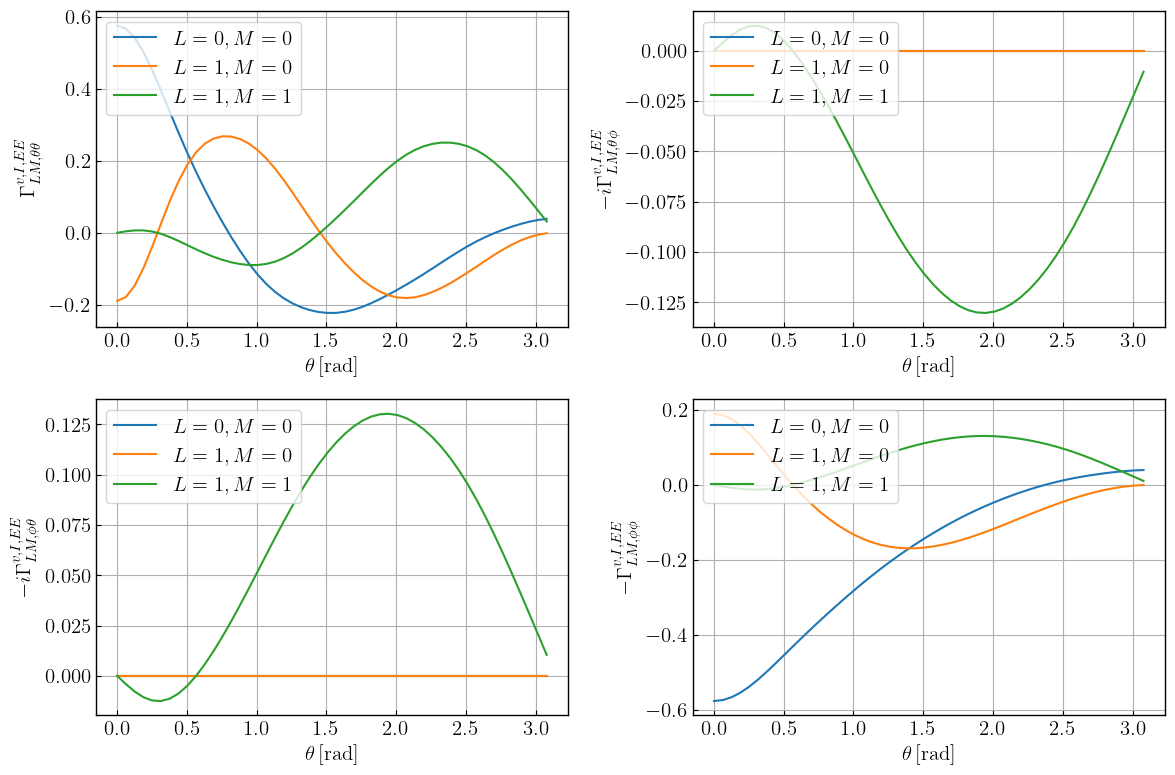

In [500]:
fig = plt.figure(figsize = (12,8),tight_layout=True)
#add_subplot(row,column,place)
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

bbox_dict = dict(edgecolor="black",facecolor="white")

ax1.plot(x,gamI_ee_tt00_v,label="$L=0,M=0$")
ax1.plot(x,gamI_ee_tt10_v,label="$L=1,M=0$")
ax1.plot(x,gamI_ee_tt11_v,label="$L=1,M=1$")

ax1.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax1.set_ylabel("$\Gamma^{v,I,EE}_{LM,\\theta\\theta}$")
fig.subplots_adjust(bottom=0.)
ax1.legend(loc='upper left')

ax2.plot(x,gamI_ee_tp00_v,label="$L=0,M=0$")
ax2.plot(x,gamI_ee_tp10_v,label="$L=1,M=0$")
ax2.plot(x,gamI_ee_tp11_v,label="$L=1,M=1$")

ax2.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax2.set_ylabel("$-i\Gamma^{v,I,EE}_{LM,\\theta\phi}$")
fig.subplots_adjust(bottom=0.)
ax2.legend(loc='upper left')

ax3.plot(x,gamI_ee_pt00_v,label="$L=0,M=0$")
ax3.plot(x,gamI_ee_pt10_v,label="$L=1,M=0$")
ax3.plot(x,gamI_ee_pt11_v,label="$L=1,M=1$")

ax3.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax3.set_ylabel("$-i\Gamma^{v,I,EE}_{LM,\phi\\theta}$")
fig.subplots_adjust(bottom=0.)
ax3.legend(loc='upper left')

ax4.plot(x,gamI_ee_pp00_v,label="$L=0,M=0$")
ax4.plot(x,gamI_ee_pp10_v,label="$L=1,M=0$")
ax4.plot(x,gamI_ee_pp11_v,label="$L=1,M=1$")

ax4.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax4.set_ylabel("$-\Gamma^{v,I,EE}_{LM,\phi\phi}$")
fig.subplots_adjust(bottom=0.)
ax4.legend(loc='upper left')

#fig.savefig("/Users/keisuke/Documents/XXX.pdf", bbox_inches='tight')
plt.show()

In [453]:
gamV_ee_tt00_v = GamV_ee_v(0,0,x,lmax,0,0)
gamV_ee_tt10_v = GamV_ee_v(1,0,x,lmax,0,0)
gamV_ee_tt11_v = GamV_ee_v(1,1,x,lmax,0,0)

In [454]:
gamV_ee_tp00_v = GamV_ee_v(0,0,x,lmax,0,1)
gamV_ee_tp10_v = GamV_ee_v(1,0,x,lmax,0,1)
gamV_ee_tp11_v = GamV_ee_v(1,1,x,lmax,0,1)

In [455]:
gamV_ee_pt00_v = GamV_ee_v(0,0,x,lmax,1,0)
gamV_ee_pt10_v = GamV_ee_v(1,0,x,lmax,1,0)
gamV_ee_pt11_v = GamV_ee_v(1,1,x,lmax,1,0)

In [456]:
gamV_ee_pp00_v = GamV_ee_v(0,0,x,lmax,1,1)
gamV_ee_pp10_v = GamV_ee_v(1,0,x,lmax,1,1)
gamV_ee_pp11_v = GamV_ee_v(1,1,x,lmax,1,1)

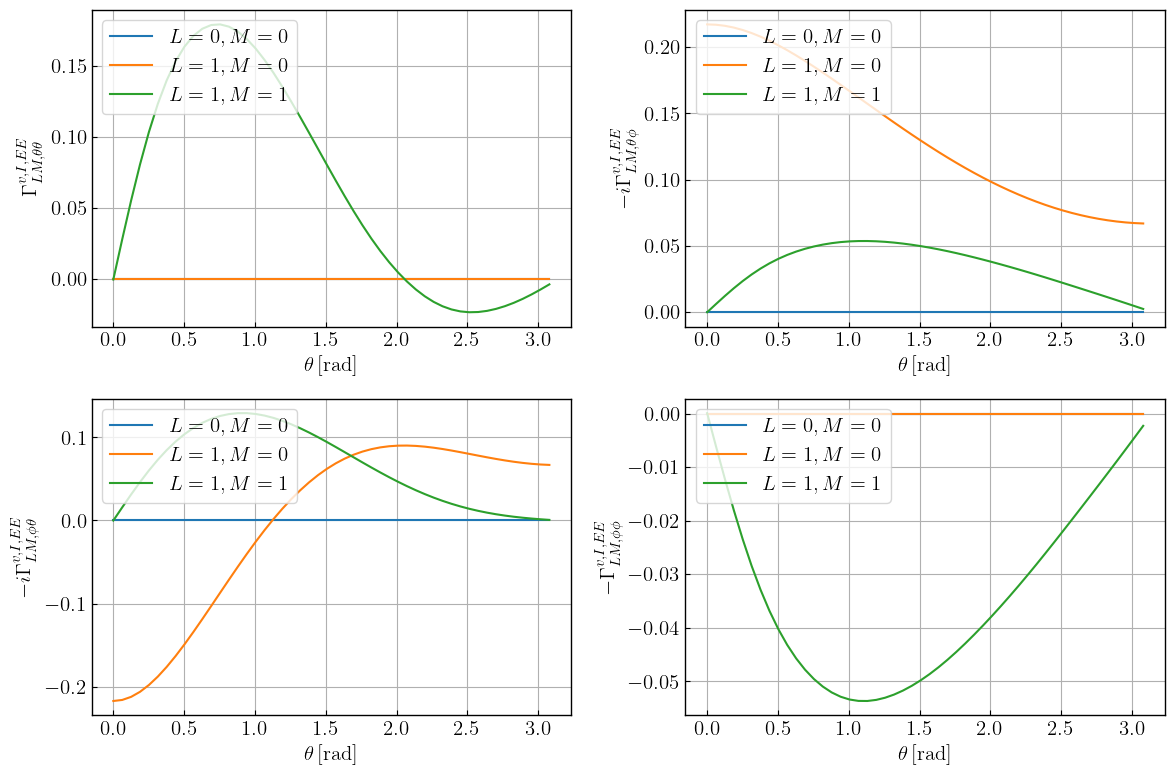

In [501]:
fig = plt.figure(figsize = (12,8),tight_layout=True)
#add_subplot(row,column,place)
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

bbox_dict = dict(edgecolor="black",facecolor="white")

ax1.plot(x,gamV_ee_tt00_v,label="$L=0,M=0$")
ax1.plot(x,gamV_ee_tt10_v,label="$L=1,M=0$")
ax1.plot(x,gamV_ee_tt11_v,label="$L=1,M=1$")

ax1.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax1.set_ylabel("$\Gamma^{v,I,EE}_{LM,\\theta\\theta}$")
fig.subplots_adjust(bottom=0.)
ax1.legend(loc='upper left')

ax2.plot(x,gamV_ee_tp00_v,label="$L=0,M=0$")
ax2.plot(x,gamV_ee_tp10_v,label="$L=1,M=0$")
ax2.plot(x,gamV_ee_tp11_v,label="$L=1,M=1$")

ax2.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax2.set_ylabel("$-i\Gamma^{v,I,EE}_{LM,\\theta\phi}$")
fig.subplots_adjust(bottom=0.)
ax2.legend(loc='upper left')

ax3.plot(x,gamV_ee_pt00_v,label="$L=0,M=0$")
ax3.plot(x,gamV_ee_pt10_v,label="$L=1,M=0$")
ax3.plot(x,gamV_ee_pt11_v,label="$L=1,M=1$")

ax3.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax3.set_ylabel("$-i\Gamma^{v,I,EE}_{LM,\phi\\theta}$")
fig.subplots_adjust(bottom=0.)
ax3.legend(loc='upper left')

ax4.plot(x,gamV_ee_pp00_v,label="$L=0,M=0$")
ax4.plot(x,gamV_ee_pp10_v,label="$L=1,M=0$")
ax4.plot(x,gamV_ee_pp11_v,label="$L=1,M=1$")

ax4.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax4.set_ylabel("$-\Gamma^{v,I,EE}_{LM,\phi\phi}$")
fig.subplots_adjust(bottom=0.)
ax4.legend(loc='upper left')

#fig.savefig("/Users/keisuke/Documents/XXX.pdf", bbox_inches='tight')
plt.show()

In [458]:
gamE_ee_tt10_v = GamE_ee_v(1,0,x,lmax,0,0)
gamE_ee_tt11_v = GamE_ee_v(1,1,x,lmax,0,0)
gamE_ee_tt20_v = GamE_ee_v(2,0,x,lmax,0,0)
gamE_ee_tt21_v = GamE_ee_v(2,1,x,lmax,0,0)

In [459]:
gamE_ee_tp10_v = GamE_ee_v(1,0,x,lmax,0,1)
gamE_ee_tp11_v = GamE_ee_v(1,1,x,lmax,0,1)
gamE_ee_tp20_v = GamE_ee_v(2,0,x,lmax,0,1)
gamE_ee_tp21_v = GamE_ee_v(2,1,x,lmax,0,1)

In [460]:
gamE_ee_pt10_v = GamE_ee_v(1,0,x,lmax,1,0)
gamE_ee_pt11_v = GamE_ee_v(1,1,x,lmax,1,0)
gamE_ee_pt20_v = GamE_ee_v(2,0,x,lmax,1,0)
gamE_ee_pt21_v = GamE_ee_v(2,1,x,lmax,1,0)

In [461]:
gamE_ee_pp10_v = GamE_ee_v(1,0,x,lmax,1,1)
gamE_ee_pp11_v = GamE_ee_v(1,1,x,lmax,1,1)
gamE_ee_pp20_v = GamE_ee_v(2,0,x,lmax,1,1)
gamE_ee_pp21_v = GamE_ee_v(2,1,x,lmax,1,1)

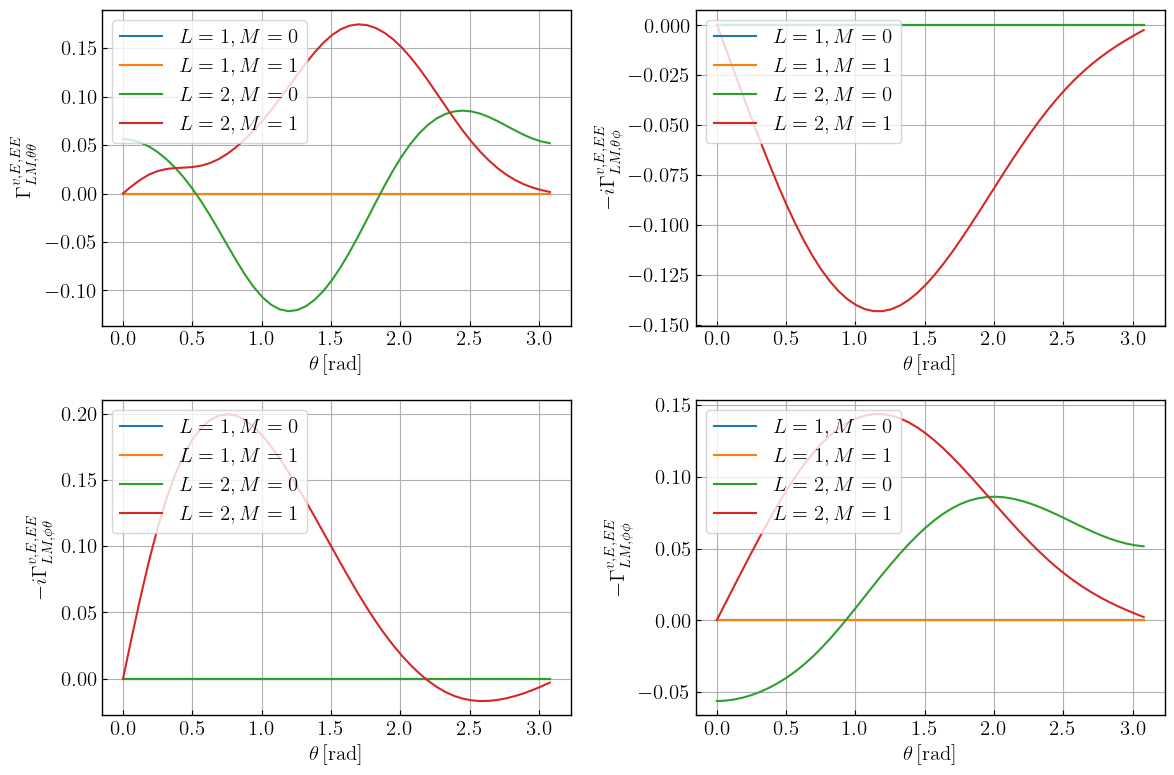

In [523]:
fig = plt.figure(figsize = (12,8),tight_layout=True)
#add_subplot(row,column,place)
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

bbox_dict = dict(edgecolor="black",facecolor="white")

ax1.plot(x,gamE_ee_tt10_v,label="$L=1,M=0$")
ax1.plot(x,gamE_ee_tt11_v,label="$L=1,M=1$")
ax1.plot(x,gamE_ee_tt20_v,label="$L=2,M=0$")
ax1.plot(x,gamE_ee_tt21_v,label="$L=2,M=1$")

ax1.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax1.set_ylabel("$\Gamma^{v,E,EE}_{LM,\\theta\\theta}$")
fig.subplots_adjust(bottom=0.)
ax1.legend(loc='upper left')

ax2.plot(x,gamE_ee_tp10_v,label="$L=1,M=0$")
ax2.plot(x,gamE_ee_tp11_v,label="$L=1,M=1$")
ax2.plot(x,gamE_ee_tp20_v,label="$L=2,M=0$")
ax2.plot(x,gamE_ee_tp21_v,label="$L=2,M=1$")

ax2.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax2.set_ylabel("$-i\Gamma^{v,E,EE}_{LM,\\theta\phi}$")
fig.subplots_adjust(bottom=0.)
ax2.legend(loc='upper left')

ax3.plot(x,gamE_ee_pt10_v,label="$L=1,M=0$")
ax3.plot(x,gamE_ee_pt11_v,label="$L=1,M=1$")
ax3.plot(x,gamE_ee_pt20_v,label="$L=2,M=0$")
ax3.plot(x,gamE_ee_pt21_v,label="$L=2,M=1$")

ax3.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax3.set_ylabel("$-i\Gamma^{v,E,EE}_{LM,\phi\\theta}$")
fig.subplots_adjust(bottom=0.)
ax3.legend(loc='upper left')

ax4.plot(x,gamE_ee_pp10_v,label="$L=1,M=0$")
ax4.plot(x,gamE_ee_pp11_v,label="$L=1,M=1$")
ax4.plot(x,gamE_ee_pp20_v,label="$L=2,M=0$")
ax4.plot(x,gamE_ee_pp21_v,label="$L=2,M=1$")

ax4.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax4.set_ylabel("$-\Gamma^{v,E,EE}_{LM,\phi\phi}$")
fig.subplots_adjust(bottom=0.)
ax4.legend(loc='upper left')

#fig.savefig("/Users/keisuke/Documents/XXX.pdf", bbox_inches='tight')
plt.show()

In [463]:
gamB_ee_tt10_v = GamB_ee_v(1,0,x,lmax,0,0)
gamB_ee_tt11_v = GamB_ee_v(1,1,x,lmax,0,0)
gamB_ee_tt20_v = GamB_ee_v(2,0,x,lmax,0,0)
gamB_ee_tt21_v = GamB_ee_v(2,1,x,lmax,0,0)

In [464]:
gamB_ee_tp10_v = GamB_ee_v(1,0,x,lmax,0,1)
gamB_ee_tp11_v = GamB_ee_v(1,1,x,lmax,0,1)
gamB_ee_tp20_v = GamB_ee_v(2,0,x,lmax,0,1)
gamB_ee_tp21_v = GamB_ee_v(2,1,x,lmax,0,1)

In [465]:
gamB_ee_pt10_v = GamB_ee_v(1,0,x,lmax,1,0)
gamB_ee_pt11_v = GamB_ee_v(1,1,x,lmax,1,0)
gamB_ee_pt20_v = GamB_ee_v(2,0,x,lmax,1,0)
gamB_ee_pt21_v = GamB_ee_v(2,1,x,lmax,1,0)

In [466]:
gamB_ee_pp10_v = GamB_ee_v(1,0,x,lmax,1,1)
gamB_ee_pp11_v = GamB_ee_v(1,1,x,lmax,1,1)
gamB_ee_pp20_v = GamB_ee_v(2,0,x,lmax,1,1)
gamB_ee_pp21_v = GamB_ee_v(2,1,x,lmax,1,1)

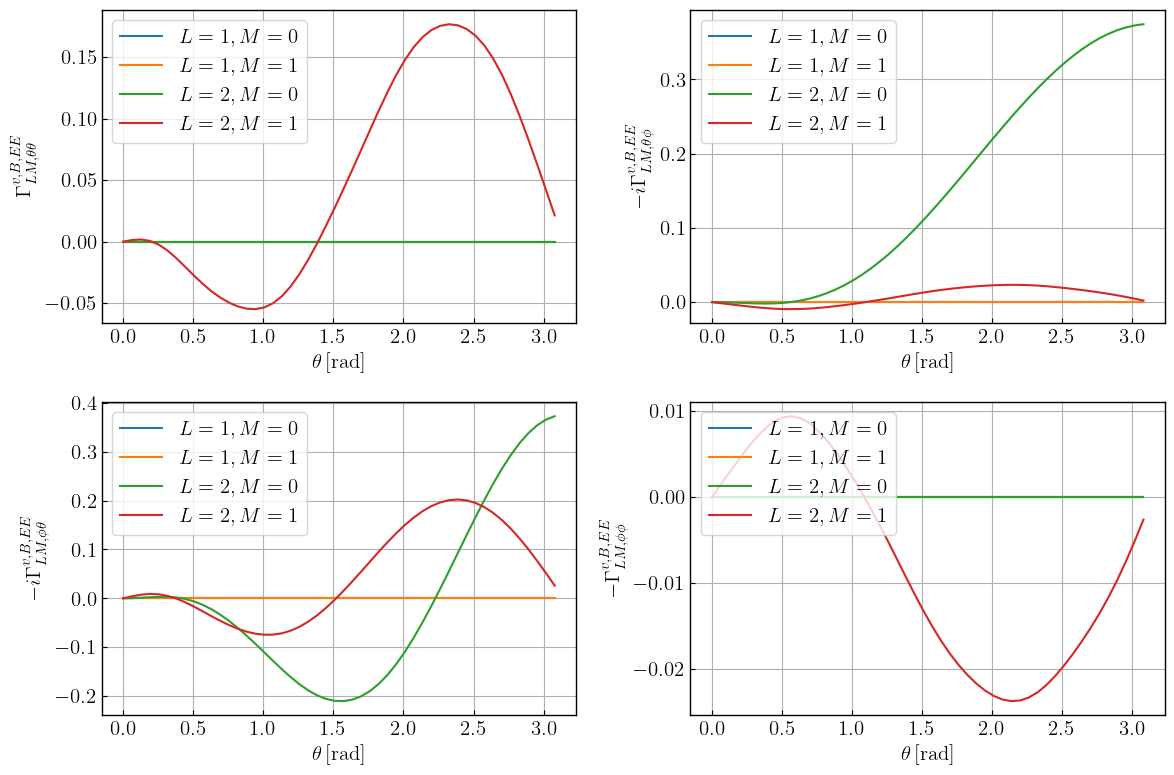

In [503]:
fig = plt.figure(figsize = (12,8),tight_layout=True)
#add_subplot(row,column,place)
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

bbox_dict = dict(edgecolor="black",facecolor="white")

ax1.plot(x,gamB_ee_tt10_v,label="$L=1,M=0$")
ax1.plot(x,gamB_ee_tt11_v,label="$L=1,M=1$")
ax1.plot(x,gamB_ee_tt20_v,label="$L=2,M=0$")
ax1.plot(x,gamB_ee_tt21_v,label="$L=2,M=1$")

ax1.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax1.set_ylabel("$\Gamma^{v,B,EE}_{LM,\\theta\\theta}$")
fig.subplots_adjust(bottom=0.)
ax1.legend(loc='upper left')

ax2.plot(x,gamB_ee_tp10_v,label="$L=1,M=0$")
ax2.plot(x,gamB_ee_tp11_v,label="$L=1,M=1$")
ax2.plot(x,gamB_ee_tp20_v,label="$L=2,M=0$")
ax2.plot(x,gamB_ee_tp21_v,label="$L=2,M=1$")

ax2.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax2.set_ylabel("$-i\Gamma^{v,B,EE}_{LM,\\theta\phi}$")
fig.subplots_adjust(bottom=0.)
ax2.legend(loc='upper left')

ax3.plot(x,gamB_ee_pt10_v,label="$L=1,M=0$")
ax3.plot(x,gamB_ee_pt11_v,label="$L=1,M=1$")
ax3.plot(x,gamB_ee_pt20_v,label="$L=2,M=0$")
ax3.plot(x,gamB_ee_pt21_v,label="$L=2,M=1$")

ax3.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax3.set_ylabel("$-i\Gamma^{v,B,EE}_{LM,\phi\\theta}$")
fig.subplots_adjust(bottom=0.)
ax3.legend(loc='upper left')

ax4.plot(x,gamB_ee_pp10_v,label="$L=1,M=0$")
ax4.plot(x,gamB_ee_pp11_v,label="$L=1,M=1$")
ax4.plot(x,gamB_ee_pp20_v,label="$L=2,M=0$")
ax4.plot(x,gamB_ee_pp21_v,label="$L=2,M=1$")

ax4.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax4.set_ylabel("$-\Gamma^{v,B,EE}_{LM,\phi\phi}$")
fig.subplots_adjust(bottom=0.)
ax4.legend(loc='upper left')

#fig.savefig("/Users/keisuke/Documents/XXX.pdf", bbox_inches='tight')
plt.show()

### $\Gamma^{v,X,BB}_{LM,\alpha\beta}$

In [499]:
gamI_bb_tt00_v = GamI_bb_v(0,0,x,lmax,0,0)
gamI_bb_tt10_v = GamI_bb_v(1,0,x,lmax,0,0)
gamI_bb_tt11_v = GamI_bb_v(1,1,x,lmax,0,0)

In [504]:
gamI_bb_tp00_v = GamI_bb_v(0,0,x,lmax,0,1)
gamI_bb_tp10_v = GamI_bb_v(1,0,x,lmax,0,1)
gamI_bb_tp11_v = GamI_bb_v(1,1,x,lmax,0,1)

In [505]:
gamI_bb_pt00_v = GamI_bb_v(0,0,x,lmax,1,0)
gamI_bb_pt10_v = GamI_bb_v(1,0,x,lmax,1,0)
gamI_bb_pt11_v = GamI_bb_v(1,1,x,lmax,1,0)

In [506]:
gamI_bb_pp00_v = GamI_bb_v(0,0,x,lmax,1,1)
gamI_bb_pp10_v = GamI_bb_v(1,0,x,lmax,1,1)
gamI_bb_pp11_v = GamI_bb_v(1,1,x,lmax,1,1)

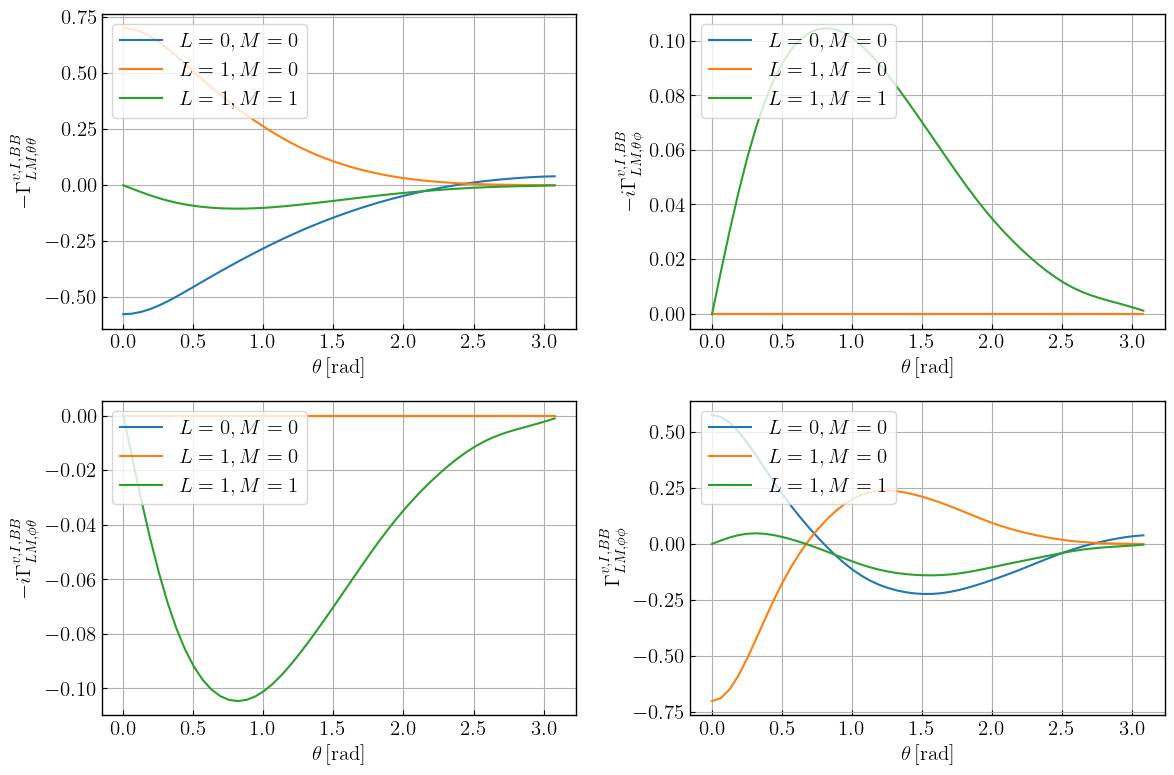

In [507]:
fig = plt.figure(figsize = (12,8),tight_layout=True)
#add_subplot(row,column,place)
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

bbox_dict = dict(edgecolor="black",facecolor="white")

ax1.plot(x,gamI_bb_tt00_v,label="$L=0,M=0$")
ax1.plot(x,gamI_bb_tt10_v,label="$L=1,M=0$")
ax1.plot(x,gamI_bb_tt11_v,label="$L=1,M=1$")

ax1.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax1.set_ylabel("$-\Gamma^{v,I,BB}_{LM,\\theta\\theta}$")
fig.subplots_adjust(bottom=0.)
ax1.legend(loc='upper left')

ax2.plot(x,gamI_bb_tp00_v,label="$L=0,M=0$")
ax2.plot(x,gamI_bb_tp10_v,label="$L=1,M=0$")
ax2.plot(x,gamI_bb_tp11_v,label="$L=1,M=1$")

ax2.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax2.set_ylabel("$-i\Gamma^{v,I,BB}_{LM,\\theta\phi}$")
fig.subplots_adjust(bottom=0.)
ax2.legend(loc='upper left')

ax3.plot(x,gamI_bb_pt00_v,label="$L=0,M=0$")
ax3.plot(x,gamI_bb_pt10_v,label="$L=1,M=0$")
ax3.plot(x,gamI_bb_pt11_v,label="$L=1,M=1$")

ax3.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax3.set_ylabel("$-i\Gamma^{v,I,BB}_{LM,\phi\\theta}$")
fig.subplots_adjust(bottom=0.)
ax3.legend(loc='upper left')

ax4.plot(x,gamI_bb_pp00_v,label="$L=0,M=0$")
ax4.plot(x,gamI_bb_pp10_v,label="$L=1,M=0$")
ax4.plot(x,gamI_bb_pp11_v,label="$L=1,M=1$")

ax4.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax4.set_ylabel("$\Gamma^{v,I,BB}_{LM,\phi\phi}$")
fig.subplots_adjust(bottom=0.)
ax4.legend(loc='upper left')

#fig.savefig("/Users/keisuke/Documents/XXX.pdf", bbox_inches='tight')
plt.show()

In [508]:
gamV_bb_tt00_v = GamV_bb_v(0,0,x,lmax,0,0)
gamV_bb_tt10_v = GamV_bb_v(1,0,x,lmax,0,0)
gamV_bb_tt11_v = GamV_bb_v(1,1,x,lmax,0,0)

In [524]:
gamV_bb_tp00_v = GamV_bb_v(0,0,x,lmax,0,1)
gamV_bb_tp10_v = GamV_bb_v(1,0,x,lmax,0,1)
gamV_bb_tp11_v = GamV_bb_v(1,1,x,lmax,0,1)

In [525]:
gamV_bb_pt00_v = GamV_bb_v(0,0,x,lmax,1,0)
gamV_bb_pt10_v = GamV_bb_v(1,0,x,lmax,1,0)
gamV_bb_pt11_v = GamV_bb_v(1,1,x,lmax,1,0)

In [526]:
gamV_bb_pp00_v = GamV_bb_v(0,0,x,lmax,1,1)
gamV_bb_pp10_v = GamV_bb_v(1,0,x,lmax,1,1)
gamV_bb_pp11_v = GamV_bb_v(1,1,x,lmax,1,1)

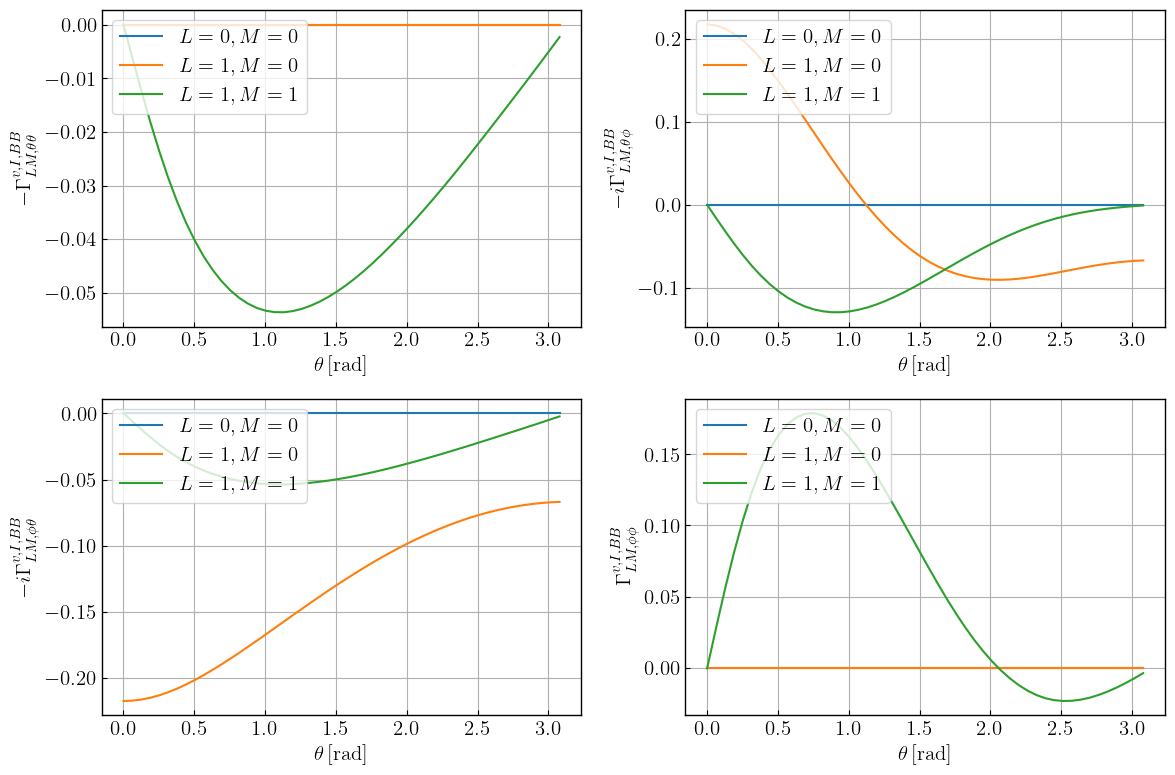

In [527]:
fig = plt.figure(figsize = (12,8),tight_layout=True)
#add_subplot(row,column,place)
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

bbox_dict = dict(edgecolor="black",facecolor="white")

ax1.plot(x,gamV_bb_tt00_v,label="$L=0,M=0$")
ax1.plot(x,gamV_bb_tt10_v,label="$L=1,M=0$")
ax1.plot(x,gamV_bb_tt11_v,label="$L=1,M=1$")

ax1.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax1.set_ylabel("$-\Gamma^{v,I,BB}_{LM,\\theta\\theta}$")
fig.subplots_adjust(bottom=0.)
ax1.legend(loc='upper left')

ax2.plot(x,gamV_bb_tp00_v,label="$L=0,M=0$")
ax2.plot(x,gamV_bb_tp10_v,label="$L=1,M=0$")
ax2.plot(x,gamV_bb_tp11_v,label="$L=1,M=1$")

ax2.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax2.set_ylabel("$-i\Gamma^{v,I,BB}_{LM,\\theta\phi}$")
fig.subplots_adjust(bottom=0.)
ax2.legend(loc='upper left')

ax3.plot(x,gamV_bb_pt00_v,label="$L=0,M=0$")
ax3.plot(x,gamV_bb_pt10_v,label="$L=1,M=0$")
ax3.plot(x,gamV_bb_pt11_v,label="$L=1,M=1$")

ax3.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax3.set_ylabel("$-i\Gamma^{v,I,BB}_{LM,\phi\\theta}$")
fig.subplots_adjust(bottom=0.)
ax3.legend(loc='upper left')

ax4.plot(x,gamV_bb_pp00_v,label="$L=0,M=0$")
ax4.plot(x,gamV_bb_pp10_v,label="$L=1,M=0$")
ax4.plot(x,gamV_bb_pp11_v,label="$L=1,M=1$")

ax4.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax4.set_ylabel("$\Gamma^{v,I,BB}_{LM,\phi\phi}$")
fig.subplots_adjust(bottom=0.)
ax4.legend(loc='upper left')

#fig.savefig("/Users/keisuke/Documents/XXX.pdf", bbox_inches='tight')
plt.show()

In [518]:
gamE_bb_tt10_v = GamE_bb_v(1,0,x,lmax,0,0)
gamE_bb_tt11_v = GamE_bb_v(1,1,x,lmax,0,0)
gamE_bb_tt20_v = GamE_bb_v(2,0,x,lmax,0,0)
gamE_bb_tt21_v = GamE_bb_v(2,1,x,lmax,0,0)

In [519]:
gamE_bb_tp10_v = GamE_bb_v(1,0,x,lmax,0,1)
gamE_bb_tp11_v = GamE_bb_v(1,1,x,lmax,0,1)
gamE_bb_tp20_v = GamE_bb_v(2,0,x,lmax,0,1)
gamE_bb_tp21_v = GamE_bb_v(2,1,x,lmax,0,1)

In [520]:
gamE_bb_pt10_v = GamE_bb_v(1,0,x,lmax,1,0)
gamE_bb_pt11_v = GamE_bb_v(1,1,x,lmax,1,0)
gamE_bb_pt20_v = GamE_bb_v(2,0,x,lmax,1,0)
gamE_bb_pt21_v = GamE_bb_v(2,1,x,lmax,1,0)

In [521]:
gamE_bb_pp10_v = GamE_bb_v(1,0,x,lmax,1,1)
gamE_bb_pp11_v = GamE_bb_v(1,1,x,lmax,1,1)
gamE_bb_pp20_v = GamE_bb_v(2,0,x,lmax,1,1)
gamE_bb_pp21_v = GamE_bb_v(2,1,x,lmax,1,1)

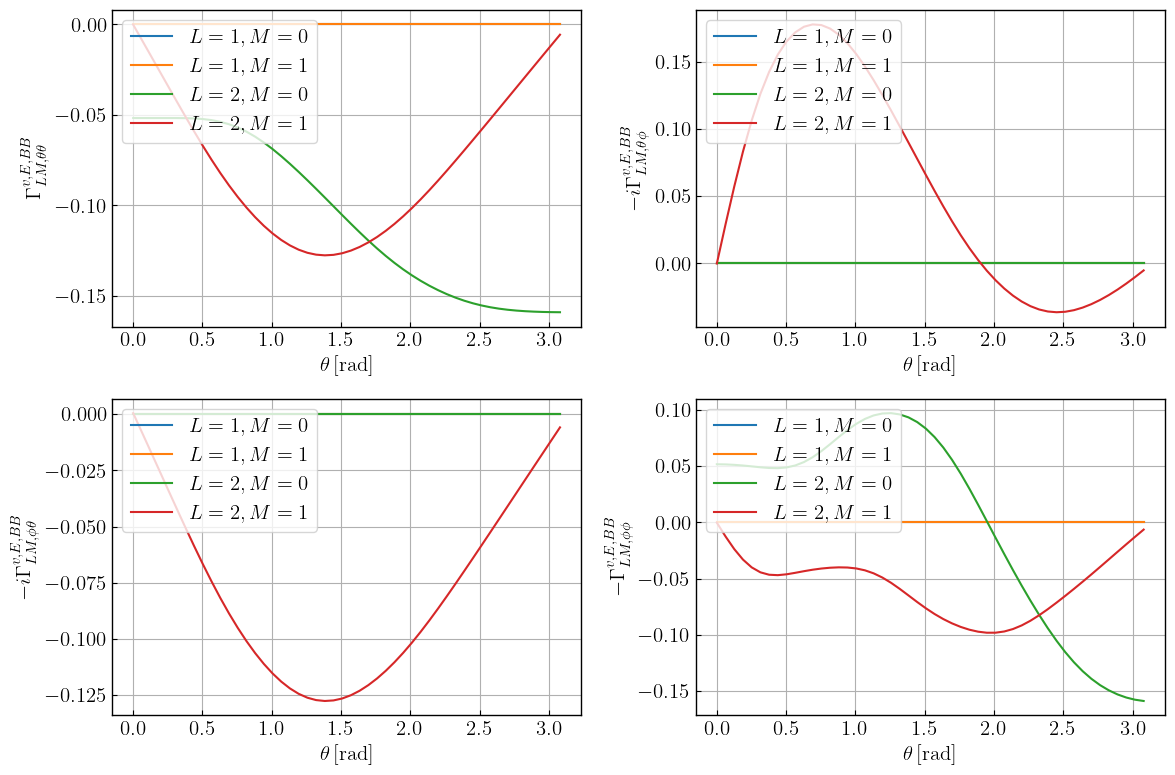

In [522]:
fig = plt.figure(figsize = (12,8),tight_layout=True)
#add_subplot(row,column,place)
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

bbox_dict = dict(edgecolor="black",facecolor="white")

ax1.plot(x,gamE_bb_tt10_v,label="$L=1,M=0$")
ax1.plot(x,gamE_bb_tt11_v,label="$L=1,M=1$")
ax1.plot(x,gamE_bb_tt20_v,label="$L=2,M=0$")
ax1.plot(x,gamE_bb_tt21_v,label="$L=2,M=1$")

ax1.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax1.set_ylabel("$\Gamma^{v,E,BB}_{LM,\\theta\\theta}$")
fig.subplots_adjust(bottom=0.)
ax1.legend(loc='upper left')

ax2.plot(x,gamE_bb_tp10_v,label="$L=1,M=0$")
ax2.plot(x,gamE_bb_tp11_v,label="$L=1,M=1$")
ax2.plot(x,gamE_bb_tp20_v,label="$L=2,M=0$")
ax2.plot(x,gamE_bb_tp21_v,label="$L=2,M=1$")

ax2.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax2.set_ylabel("$-i\Gamma^{v,E,BB}_{LM,\\theta\phi}$")
fig.subplots_adjust(bottom=0.)
ax2.legend(loc='upper left')

ax3.plot(x,gamE_bb_pt10_v,label="$L=1,M=0$")
ax3.plot(x,gamE_bb_pt11_v,label="$L=1,M=1$")
ax3.plot(x,gamE_bb_pt20_v,label="$L=2,M=0$")
ax3.plot(x,gamE_bb_pt21_v,label="$L=2,M=1$")

ax3.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax3.set_ylabel("$-i\Gamma^{v,E,BB}_{LM,\phi\\theta}$")
fig.subplots_adjust(bottom=0.)
ax3.legend(loc='upper left')

ax4.plot(x,gamE_bb_pp10_v,label="$L=1,M=0$")
ax4.plot(x,gamE_bb_pp11_v,label="$L=1,M=1$")
ax4.plot(x,gamE_bb_pp20_v,label="$L=2,M=0$")
ax4.plot(x,gamE_bb_pp21_v,label="$L=2,M=1$")

ax4.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax4.set_ylabel("$-\Gamma^{v,E,BB}_{LM,\phi\phi}$")
fig.subplots_adjust(bottom=0.)
ax4.legend(loc='upper left')

#fig.savefig("/Users/keisuke/Documents/XXX.pdf", bbox_inches='tight')
plt.show()

In [513]:
gamB_bb_tt10_v = GamB_bb_v(1,0,x,lmax,0,0)
gamB_bb_tt11_v = GamB_bb_v(1,1,x,lmax,0,0)
gamB_bb_tt20_v = GamB_bb_v(2,0,x,lmax,0,0)
gamB_bb_tt21_v = GamB_bb_v(2,1,x,lmax,0,0)

In [514]:
gamB_bb_tp10_v = GamB_bb_v(1,0,x,lmax,0,1)
gamB_bb_tp11_v = GamB_bb_v(1,1,x,lmax,0,1)
gamB_bb_tp20_v = GamB_bb_v(2,0,x,lmax,0,1)
gamB_bb_tp21_v = GamB_bb_v(2,1,x,lmax,0,1)

In [515]:
gamB_bb_pt10_v = GamB_bb_v(1,0,x,lmax,1,0)
gamB_bb_pt11_v = GamB_bb_v(1,1,x,lmax,1,0)
gamB_bb_pt20_v = GamB_bb_v(2,0,x,lmax,1,0)
gamB_bb_pt21_v = GamB_bb_v(2,1,x,lmax,1,0)

In [516]:
gamB_bb_pp10_v = GamB_bb_v(1,0,x,lmax,1,1)
gamB_bb_pp11_v = GamB_bb_v(1,1,x,lmax,1,1)
gamB_bb_pp20_v = GamB_bb_v(2,0,x,lmax,1,1)
gamB_bb_pp21_v = GamB_bb_v(2,1,x,lmax,1,1)

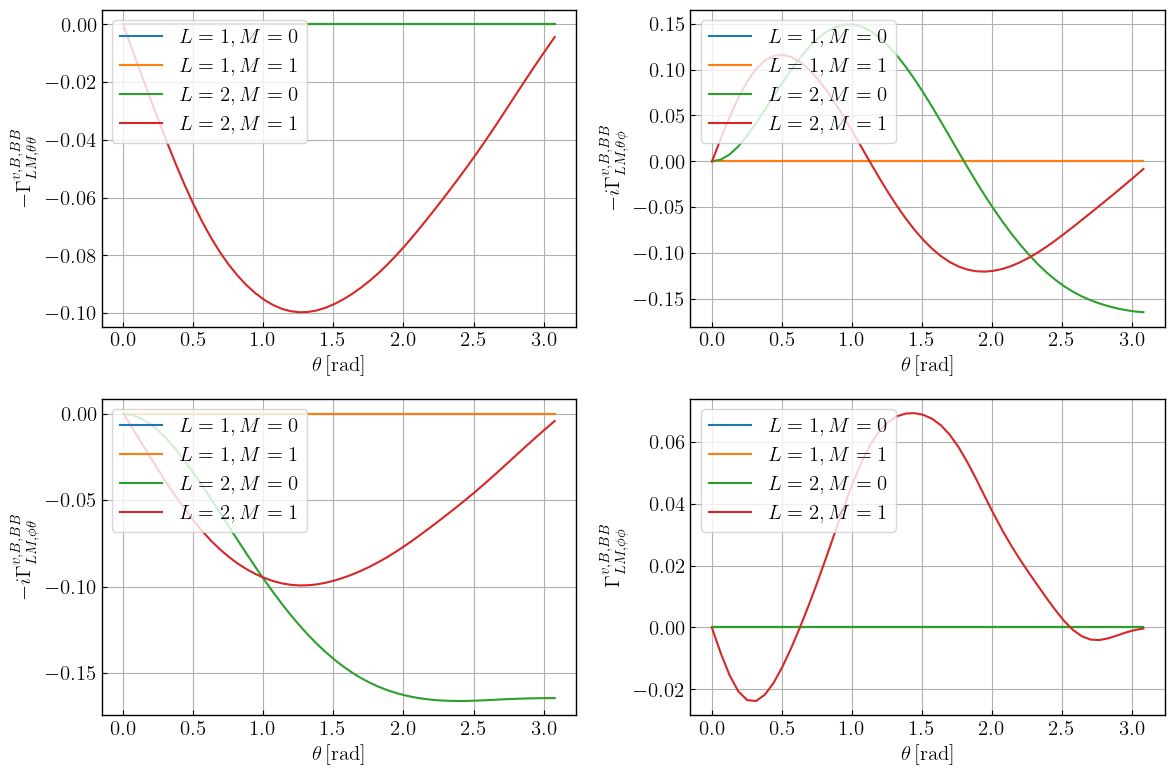

In [517]:
fig = plt.figure(figsize = (12,8),tight_layout=True)
#add_subplot(row,column,place)
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

bbox_dict = dict(edgecolor="black",facecolor="white")

ax1.plot(x,gamB_bb_tt10_v,label="$L=1,M=0$")
ax1.plot(x,gamB_bb_tt11_v,label="$L=1,M=1$")
ax1.plot(x,gamB_bb_tt20_v,label="$L=2,M=0$")
ax1.plot(x,gamB_bb_tt21_v,label="$L=2,M=1$")

ax1.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax1.set_ylabel("$-\Gamma^{v,B,BB}_{LM,\\theta\\theta}$")
fig.subplots_adjust(bottom=0.)
ax1.legend(loc='upper left')

ax2.plot(x,gamB_bb_tp10_v,label="$L=1,M=0$")
ax2.plot(x,gamB_bb_tp11_v,label="$L=1,M=1$")
ax2.plot(x,gamB_bb_tp20_v,label="$L=2,M=0$")
ax2.plot(x,gamB_bb_tp21_v,label="$L=2,M=1$")

ax2.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax2.set_ylabel("$-i\Gamma^{v,B,BB}_{LM,\\theta\phi}$")
fig.subplots_adjust(bottom=0.)
ax2.legend(loc='upper left')

ax3.plot(x,gamB_bb_pt10_v,label="$L=1,M=0$")
ax3.plot(x,gamB_bb_pt11_v,label="$L=1,M=1$")
ax3.plot(x,gamB_bb_pt20_v,label="$L=2,M=0$")
ax3.plot(x,gamB_bb_pt21_v,label="$L=2,M=1$")

ax3.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax3.set_ylabel("$-i\Gamma^{v,B,BB}_{LM,\phi\\theta}$")
fig.subplots_adjust(bottom=0.)
ax3.legend(loc='upper left')

ax4.plot(x,gamB_bb_pp10_v,label="$L=1,M=0$")
ax4.plot(x,gamB_bb_pp11_v,label="$L=1,M=1$")
ax4.plot(x,gamB_bb_pp20_v,label="$L=2,M=0$")
ax4.plot(x,gamB_bb_pp21_v,label="$L=2,M=1$")

ax4.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax4.set_ylabel("$\Gamma^{v,B,BB}_{LM,\phi\phi}$")
fig.subplots_adjust(bottom=0.)
ax4.legend(loc='upper left')

#fig.savefig("/Users/keisuke/Documents/XXX.pdf", bbox_inches='tight')
plt.show()

### $\Gamma^{v,X,EB}_{LM,\alpha\beta}$

In [415]:
gamI_eb_tt00_v = GamI_eb_v(0,0,x,lmax,0,0)
gamI_eb_tt10_v = GamI_eb_v(1,0,x,lmax,0,0)
gamI_eb_tt11_v = GamI_eb_v(1,1,x,lmax,0,0)

In [416]:
gamI_eb_tp00_v = GamI_eb_v(0,0,x,lmax,0,1)
gamI_eb_tp10_v = GamI_eb_v(1,0,x,lmax,0,1)
gamI_eb_tp11_v = GamI_eb_v(1,1,x,lmax,0,1)

In [417]:
gamI_eb_pt00_v = GamI_eb_v(0,0,x,lmax,1,0)
gamI_eb_pt10_v = GamI_eb_v(1,0,x,lmax,1,0)
gamI_eb_pt11_v = GamI_eb_v(1,1,x,lmax,1,0)

In [418]:
gamI_eb_pp00_v = GamI_eb_v(0,0,x,lmax,1,1)
gamI_eb_pp10_v = GamI_eb_v(1,0,x,lmax,1,1)
gamI_eb_pp11_v = GamI_eb_v(1,1,x,lmax,1,1)

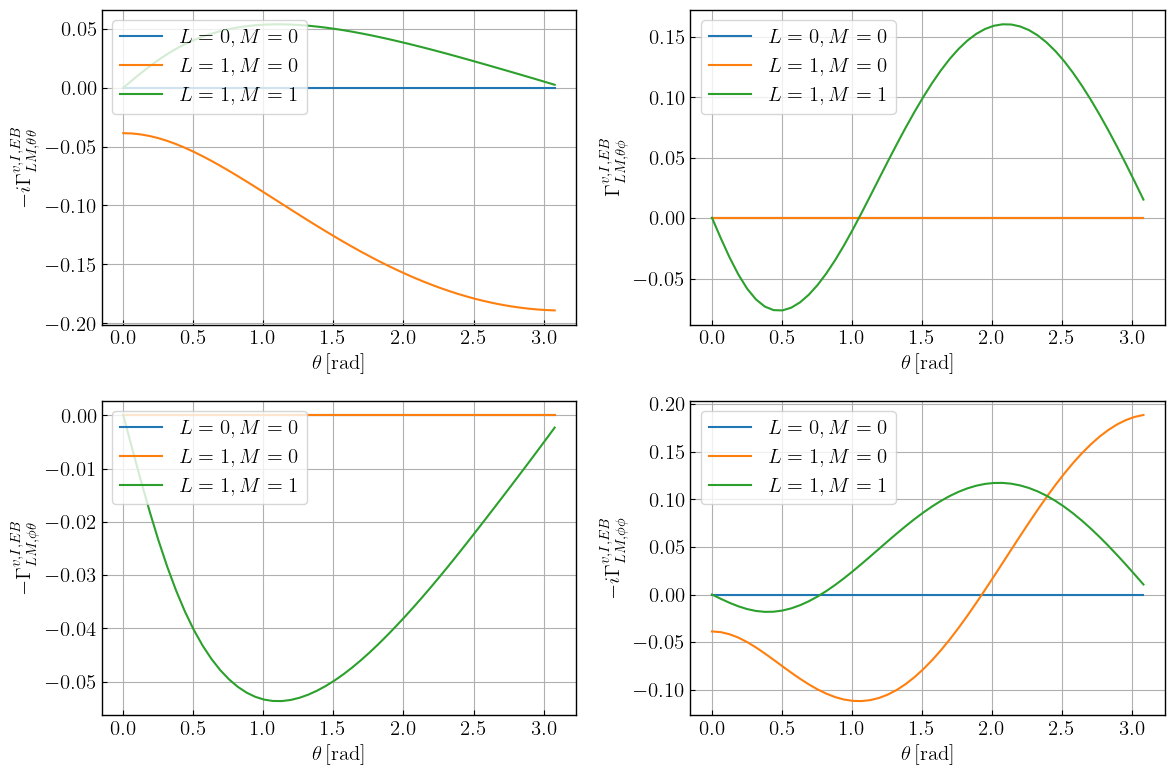

In [419]:
fig = plt.figure(figsize = (12,8),tight_layout=True)
#add_subplot(row,column,place)
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

bbox_dict = dict(edgecolor="black",facecolor="white")

ax1.plot(x,gamI_eb_tt00_v,label="$L=0,M=0$")
ax1.plot(x,gamI_eb_tt10_v,label="$L=1,M=0$")
ax1.plot(x,gamI_eb_tt11_v,label="$L=1,M=1$")

ax1.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax1.set_ylabel("$-i\Gamma^{v,I,EB}_{LM,\\theta\\theta}$")
fig.subplots_adjust(bottom=0.)
ax1.legend(loc='upper left')

ax2.plot(x,gamI_eb_tp00_v,label="$L=0,M=0$")
ax2.plot(x,gamI_eb_tp10_v,label="$L=1,M=0$")
ax2.plot(x,gamI_eb_tp11_v,label="$L=1,M=1$")

ax2.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax2.set_ylabel("$\Gamma^{v,I,EB}_{LM,\\theta\phi}$")
fig.subplots_adjust(bottom=0.)
ax2.legend(loc='upper left')

ax3.plot(x,gamI_eb_pt00_v,label="$L=0,M=0$")
ax3.plot(x,gamI_eb_pt10_v,label="$L=1,M=0$")
ax3.plot(x,gamI_eb_pt11_v,label="$L=1,M=1$")

ax3.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax3.set_ylabel("$-\Gamma^{v,I,EB}_{LM,\phi\\theta}$")
fig.subplots_adjust(bottom=0.)
ax3.legend(loc='upper left')

ax4.plot(x,gamI_eb_pp00_v,label="$L=0,M=0$")
ax4.plot(x,gamI_eb_pp10_v,label="$L=1,M=0$")
ax4.plot(x,gamI_eb_pp11_v,label="$L=1,M=1$")

ax4.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax4.set_ylabel("$-i\Gamma^{v,I,EB}_{LM,\phi\phi}$")
fig.subplots_adjust(bottom=0.)
ax4.legend(loc='upper left')

#fig.savefig("/Users/keisuke/Documents/XXX.pdf", bbox_inches='tight')
plt.show()

In [420]:
gamV_eb_tt00_v = GamV_eb_v(0,0,x,lmax,0,0)
gamV_eb_tt10_v = GamV_eb_v(1,0,x,lmax,0,0)
gamV_eb_tt11_v = GamV_eb_v(1,1,x,lmax,0,0)

In [421]:
gamV_eb_tp00_v = GamV_eb_v(0,0,x,lmax,0,1)
gamV_eb_tp10_v = GamV_eb_v(1,0,x,lmax,0,1)
gamV_eb_tp11_v = GamV_eb_v(1,1,x,lmax,0,1)

In [422]:
gamV_eb_pt00_v = GamV_eb_v(0,0,x,lmax,1,0)
gamV_eb_pt10_v = GamV_eb_v(1,0,x,lmax,1,0)
gamV_eb_pt11_v = GamV_eb_v(1,1,x,lmax,1,0)

In [423]:
gamV_eb_pp00_v = GamV_eb_v(0,0,x,lmax,1,1)
gamV_eb_pp10_v = GamV_eb_v(1,0,x,lmax,1,1)
gamV_eb_pp11_v = GamV_eb_v(1,1,x,lmax,1,1)

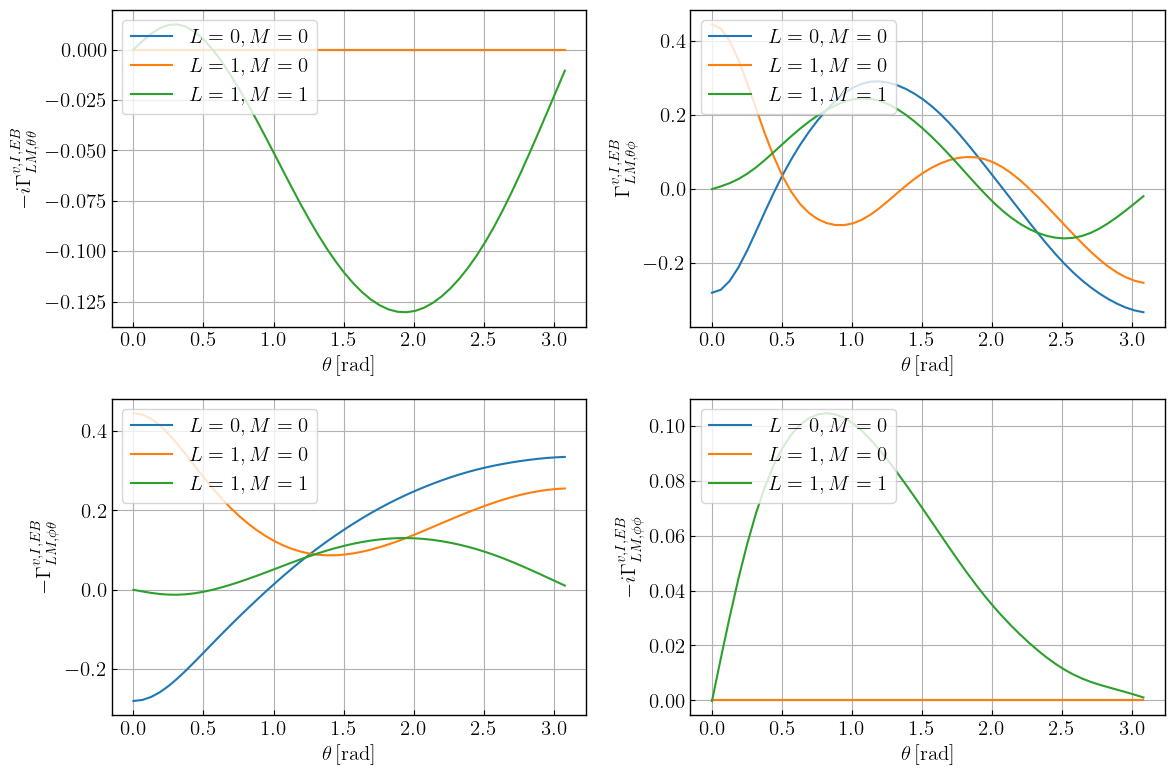

In [426]:
fig = plt.figure(figsize = (12,8),tight_layout=True)
#add_subplot(row,column,place)
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

bbox_dict = dict(edgecolor="black",facecolor="white")

ax1.plot(x,gamV_eb_tt00_v,label="$L=0,M=0$")
ax1.plot(x,gamV_eb_tt10_v,label="$L=1,M=0$")
ax1.plot(x,gamV_eb_tt11_v,label="$L=1,M=1$")

ax1.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax1.set_ylabel("$-i\Gamma^{v,I,EB}_{LM,\\theta\\theta}$")
fig.subplots_adjust(bottom=0.)
ax1.legend(loc='upper left')

ax2.plot(x,gamV_eb_tp00_v,label="$L=0,M=0$")
ax2.plot(x,gamV_eb_tp10_v,label="$L=1,M=0$")
ax2.plot(x,gamV_eb_tp11_v,label="$L=1,M=1$")

ax2.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax2.set_ylabel("$\Gamma^{v,I,EB}_{LM,\\theta\phi}$")
fig.subplots_adjust(bottom=0.)
ax2.legend(loc='upper left')

ax3.plot(x,gamV_eb_pt00_v,label="$L=0,M=0$")
ax3.plot(x,gamV_eb_pt10_v,label="$L=1,M=0$")
ax3.plot(x,gamV_eb_pt11_v,label="$L=1,M=1$")

ax3.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax3.set_ylabel("$-\Gamma^{v,I,EB}_{LM,\phi\\theta}$")
fig.subplots_adjust(bottom=0.)
ax3.legend(loc='upper left')

ax4.plot(x,gamV_eb_pp00_v,label="$L=0,M=0$")
ax4.plot(x,gamV_eb_pp10_v,label="$L=1,M=0$")
ax4.plot(x,gamV_eb_pp11_v,label="$L=1,M=1$")

ax4.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax4.set_ylabel("$-i\Gamma^{v,I,EB}_{LM,\phi\phi}$")
fig.subplots_adjust(bottom=0.)
ax4.legend(loc='upper left')

#fig.savefig("/Users/keisuke/Documents/XXX.pdf", bbox_inches='tight')
plt.show()

In [428]:
gamE_eb_tt10_v = GamE_eb_v(1,0,x,lmax,0,0)
gamE_eb_tt11_v = GamE_eb_v(1,1,x,lmax,0,0)
gamE_eb_tt20_v = GamE_eb_v(2,0,x,lmax,0,0)
gamE_eb_tt21_v = GamE_eb_v(2,1,x,lmax,0,0)

In [431]:
gamE_eb_tp10_v = GamE_eb_v(1,0,x,lmax,0,1)
gamE_eb_tp11_v = GamE_eb_v(1,1,x,lmax,0,1)
gamE_eb_tp20_v = GamE_eb_v(2,0,x,lmax,0,1)
gamE_eb_tp21_v = GamE_eb_v(2,1,x,lmax,0,1)

In [432]:
gamE_eb_pt10_v = GamE_eb_v(1,0,x,lmax,1,0)
gamE_eb_pt11_v = GamE_eb_v(1,1,x,lmax,1,0)
gamE_eb_pt20_v = GamE_eb_v(2,0,x,lmax,1,0)
gamE_eb_pt21_v = GamE_eb_v(2,1,x,lmax,1,0)

In [433]:
gamE_eb_pp10_v = GamE_eb_v(1,0,x,lmax,1,1)
gamE_eb_pp11_v = GamE_eb_v(1,1,x,lmax,1,1)
gamE_eb_pp20_v = GamE_eb_v(2,0,x,lmax,1,1)
gamE_eb_pp21_v = GamE_eb_v(2,1,x,lmax,1,1)

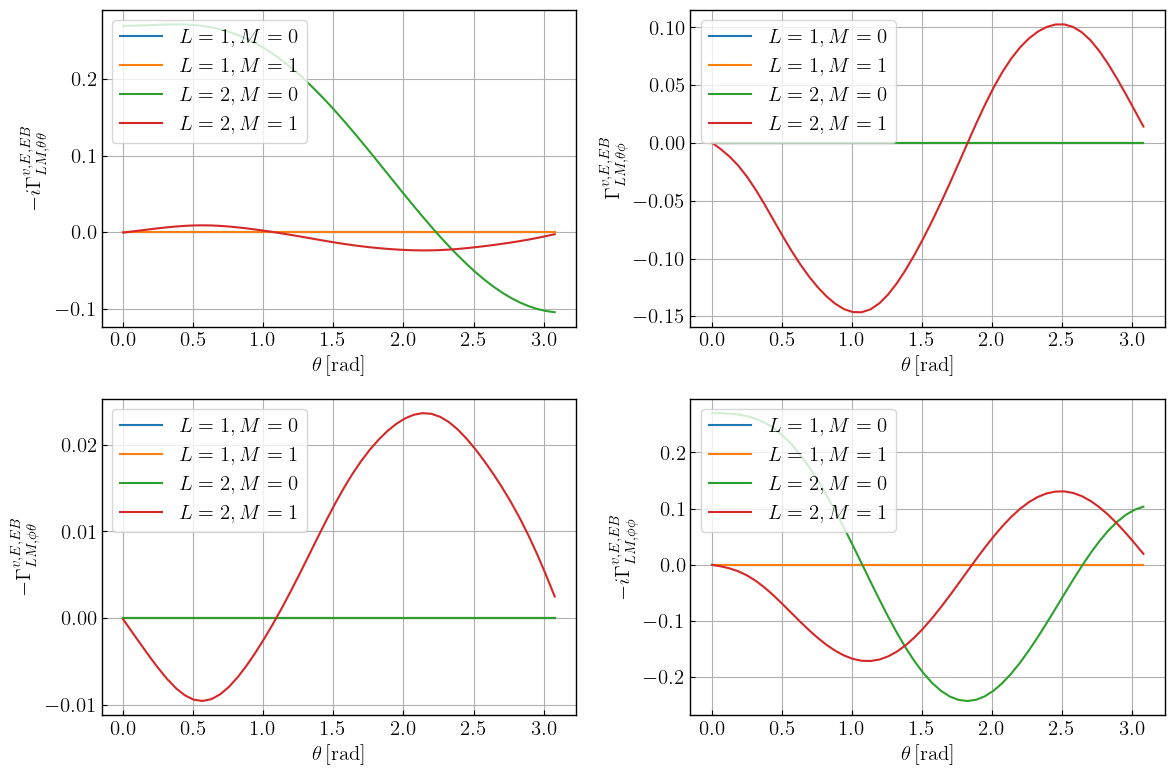

In [436]:
fig = plt.figure(figsize = (12,8),tight_layout=True)
#add_subplot(row,column,place)
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

bbox_dict = dict(edgecolor="black",facecolor="white")

ax1.plot(x,gamE_eb_tt10_v,label="$L=1,M=0$")
ax1.plot(x,gamE_eb_tt11_v,label="$L=1,M=1$")
ax1.plot(x,gamE_eb_tt20_v,label="$L=2,M=0$")
ax1.plot(x,gamE_eb_tt21_v,label="$L=2,M=1$")

ax1.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax1.set_ylabel("$-i\Gamma^{v,E,EB}_{LM,\\theta\\theta}$")
fig.subplots_adjust(bottom=0.)
ax1.legend(loc='upper left')

ax2.plot(x,gamE_eb_tp10_v,label="$L=1,M=0$")
ax2.plot(x,gamE_eb_tp11_v,label="$L=1,M=1$")
ax2.plot(x,gamE_eb_tp20_v,label="$L=2,M=0$")
ax2.plot(x,gamE_eb_tp21_v,label="$L=2,M=1$")

ax2.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax2.set_ylabel("$\Gamma^{v,E,EB}_{LM,\\theta\phi}$")
fig.subplots_adjust(bottom=0.)
ax2.legend(loc='upper left')

ax3.plot(x,gamE_eb_pt10_v,label="$L=1,M=0$")
ax3.plot(x,gamE_eb_pt11_v,label="$L=1,M=1$")
ax3.plot(x,gamE_eb_pt20_v,label="$L=2,M=0$")
ax3.plot(x,gamE_eb_pt21_v,label="$L=2,M=1$")

ax3.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax3.set_ylabel("$-\Gamma^{v,E,EB}_{LM,\phi\\theta}$")
fig.subplots_adjust(bottom=0.)
ax3.legend(loc='upper left')

ax4.plot(x,gamE_eb_pp10_v,label="$L=1,M=0$")
ax4.plot(x,gamE_eb_pp11_v,label="$L=1,M=1$")
ax4.plot(x,gamE_eb_pp20_v,label="$L=2,M=0$")
ax4.plot(x,gamE_eb_pp21_v,label="$L=2,M=1$")

ax4.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax4.set_ylabel("$-i\Gamma^{v,E,EB}_{LM,\phi\phi}$")
fig.subplots_adjust(bottom=0.)
ax4.legend(loc='upper left')

#fig.savefig("/Users/keisuke/Documents/XXX.pdf", bbox_inches='tight')
plt.show()

In [437]:
gamB_eb_tt10_v = GamB_eb_v(1,0,x,lmax,0,0)
gamB_eb_tt11_v = GamB_eb_v(1,1,x,lmax,0,0)
gamB_eb_tt20_v = GamB_eb_v(2,0,x,lmax,0,0)
gamB_eb_tt21_v = GamB_eb_v(2,1,x,lmax,0,0)

In [438]:
gamB_eb_tp10_v = GamB_eb_v(1,0,x,lmax,0,1)
gamB_eb_tp11_v = GamB_eb_v(1,1,x,lmax,0,1)
gamB_eb_tp20_v = GamB_eb_v(2,0,x,lmax,0,1)
gamB_eb_tp21_v = GamB_eb_v(2,1,x,lmax,0,1)

In [439]:
gamB_eb_pt10_v = GamB_eb_v(1,0,x,lmax,1,0)
gamB_eb_pt11_v = GamB_eb_v(1,1,x,lmax,1,0)
gamB_eb_pt20_v = GamB_eb_v(2,0,x,lmax,1,0)
gamB_eb_pt21_v = GamB_eb_v(2,1,x,lmax,1,0)

In [440]:
gamB_eb_pp10_v = GamB_eb_v(1,0,x,lmax,1,1)
gamB_eb_pp11_v = GamB_eb_v(1,1,x,lmax,1,1)
gamB_eb_pp20_v = GamB_eb_v(2,0,x,lmax,1,1)
gamB_eb_pp21_v = GamB_eb_v(2,1,x,lmax,1,1)

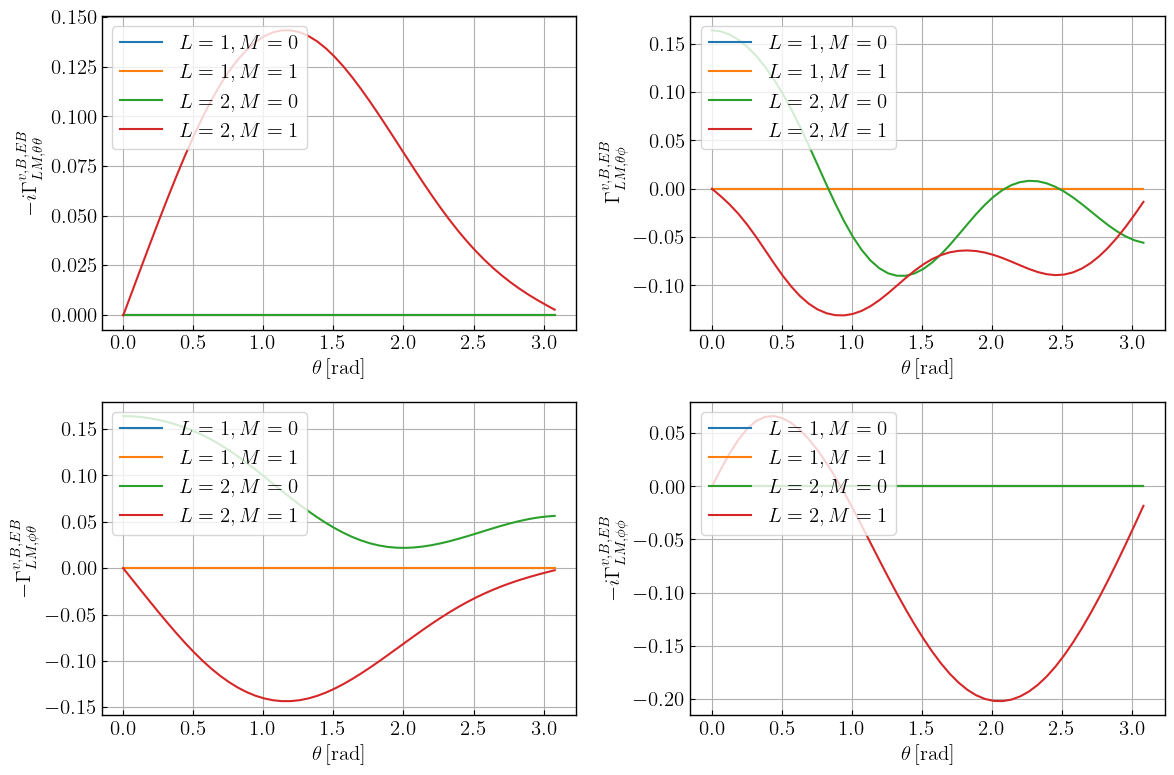

In [441]:
fig = plt.figure(figsize = (12,8),tight_layout=True)
#add_subplot(row,column,place)
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

bbox_dict = dict(edgecolor="black",facecolor="white")

ax1.plot(x,gamB_eb_tt10_v,label="$L=1,M=0$")
ax1.plot(x,gamB_eb_tt11_v,label="$L=1,M=1$")
ax1.plot(x,gamB_eb_tt20_v,label="$L=2,M=0$")
ax1.plot(x,gamB_eb_tt21_v,label="$L=2,M=1$")

ax1.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax1.set_ylabel("$-i\Gamma^{v,B,EB}_{LM,\\theta\\theta}$")
fig.subplots_adjust(bottom=0.)
ax1.legend(loc='upper left')

ax2.plot(x,gamB_eb_tp10_v,label="$L=1,M=0$")
ax2.plot(x,gamB_eb_tp11_v,label="$L=1,M=1$")
ax2.plot(x,gamB_eb_tp20_v,label="$L=2,M=0$")
ax2.plot(x,gamB_eb_tp21_v,label="$L=2,M=1$")

ax2.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax2.set_ylabel("$\Gamma^{v,B,EB}_{LM,\\theta\phi}$")
fig.subplots_adjust(bottom=0.)
ax2.legend(loc='upper left')

ax3.plot(x,gamB_eb_pt10_v,label="$L=1,M=0$")
ax3.plot(x,gamB_eb_pt11_v,label="$L=1,M=1$")
ax3.plot(x,gamB_eb_pt20_v,label="$L=2,M=0$")
ax3.plot(x,gamB_eb_pt21_v,label="$L=2,M=1$")

ax3.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax3.set_ylabel("$-\Gamma^{v,B,EB}_{LM,\phi\\theta}$")
fig.subplots_adjust(bottom=0.)
ax3.legend(loc='upper left')

ax4.plot(x,gamB_eb_pp10_v,label="$L=1,M=0$")
ax4.plot(x,gamB_eb_pp11_v,label="$L=1,M=1$")
ax4.plot(x,gamB_eb_pp20_v,label="$L=2,M=0$")
ax4.plot(x,gamB_eb_pp21_v,label="$L=2,M=1$")

ax4.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax4.set_ylabel("$-i\Gamma^{v,B,EB}_{LM,\phi\phi}$")
fig.subplots_adjust(bottom=0.)
ax4.legend(loc='upper left')

#fig.savefig("/Users/keisuke/Documents/XXX.pdf", bbox_inches='tight')
plt.show()

### $\Gamma^{v,X,BE}_{LM,\alpha\beta}$

In [474]:
gamI_be_tt00_v = GamI_be_v(0,0,x,lmax,0,0)
gamI_be_tt10_v = GamI_be_v(1,0,x,lmax,0,0)
gamI_be_tt11_v = GamI_be_v(1,1,x,lmax,0,0)

In [475]:
gamI_be_tp00_v = GamI_be_v(0,0,x,lmax,0,1)
gamI_be_tp10_v = GamI_be_v(1,0,x,lmax,0,1)
gamI_be_tp11_v = GamI_be_v(1,1,x,lmax,0,1)

In [476]:
gamI_be_pt00_v = GamI_be_v(0,0,x,lmax,1,0)
gamI_be_pt10_v = GamI_be_v(1,0,x,lmax,1,0)
gamI_be_pt11_v = GamI_be_v(1,1,x,lmax,1,0)

In [477]:
gamI_be_pp00_v = GamI_be_v(0,0,x,lmax,1,1)
gamI_be_pp10_v = GamI_be_v(1,0,x,lmax,1,1)
gamI_be_pp11_v = GamI_be_v(1,1,x,lmax,1,1)

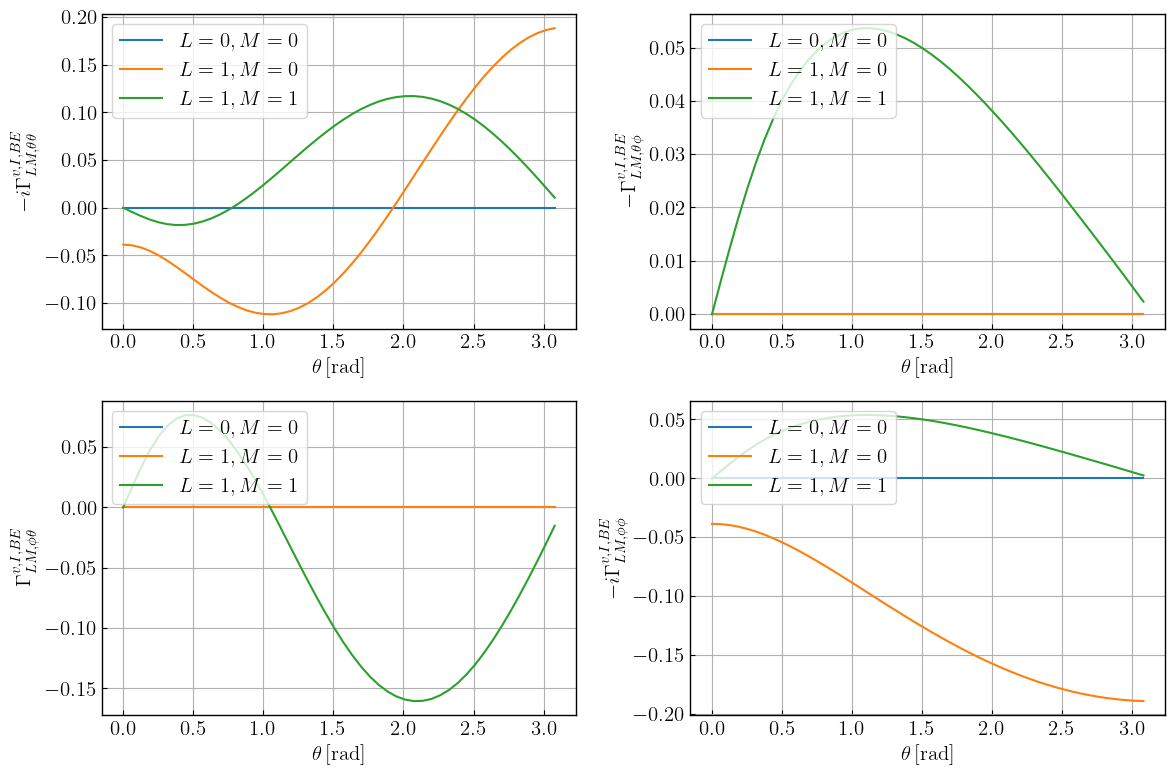

In [495]:
fig = plt.figure(figsize = (12,8),tight_layout=True)
#add_subplot(row,column,place)
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

bbox_dict = dict(edgecolor="black",facecolor="white")

ax1.plot(x,gamI_be_tt00_v,label="$L=0,M=0$")
ax1.plot(x,gamI_be_tt10_v,label="$L=1,M=0$")
ax1.plot(x,gamI_be_tt11_v,label="$L=1,M=1$")

ax1.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax1.set_ylabel("$-i\Gamma^{v,I,BE}_{LM,\\theta\\theta}$")
fig.subplots_adjust(bottom=0.)
ax1.legend(loc='upper left')

ax2.plot(x,gamI_be_tp00_v,label="$L=0,M=0$")
ax2.plot(x,gamI_be_tp10_v,label="$L=1,M=0$")
ax2.plot(x,gamI_be_tp11_v,label="$L=1,M=1$")

ax2.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax2.set_ylabel("$-\Gamma^{v,I,BE}_{LM,\\theta\phi}$")
fig.subplots_adjust(bottom=0.)
ax2.legend(loc='upper left')

ax3.plot(x,gamI_be_pt00_v,label="$L=0,M=0$")
ax3.plot(x,gamI_be_pt10_v,label="$L=1,M=0$")
ax3.plot(x,gamI_be_pt11_v,label="$L=1,M=1$")

ax3.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax3.set_ylabel("$\Gamma^{v,I,BE}_{LM,\phi\\theta}$")
fig.subplots_adjust(bottom=0.)
ax3.legend(loc='upper left')

ax4.plot(x,gamI_be_pp00_v,label="$L=0,M=0$")
ax4.plot(x,gamI_be_pp10_v,label="$L=1,M=0$")
ax4.plot(x,gamI_be_pp11_v,label="$L=1,M=1$")

ax4.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax4.set_ylabel("$-i\Gamma^{v,I,BE}_{LM,\phi\phi}$")
fig.subplots_adjust(bottom=0.)
ax4.legend(loc='upper left')

#fig.savefig("/Users/keisuke/Documents/XXX.pdf", bbox_inches='tight')
plt.show()

In [479]:
gamV_be_tt00_v = GamV_be_v(0,0,x,lmax,0,0)
gamV_be_tt10_v = GamV_be_v(1,0,x,lmax,0,0)
gamV_be_tt11_v = GamV_be_v(1,1,x,lmax,0,0)

In [480]:
gamV_be_tp00_v = GamV_be_v(0,0,x,lmax,0,1)
gamV_be_tp10_v = GamV_be_v(1,0,x,lmax,0,1)
gamV_be_tp11_v = GamV_be_v(1,1,x,lmax,0,1)

In [481]:
gamV_be_pt00_v = GamV_be_v(0,0,x,lmax,1,0)
gamV_be_pt10_v = GamV_be_v(1,0,x,lmax,1,0)
gamV_be_pt11_v = GamV_be_v(1,1,x,lmax,1,0)

In [482]:
gamV_be_pp00_v = GamV_be_v(0,0,x,lmax,1,1)
gamV_be_pp10_v = GamV_be_v(1,0,x,lmax,1,1)
gamV_be_pp11_v = GamV_be_v(1,1,x,lmax,1,1)

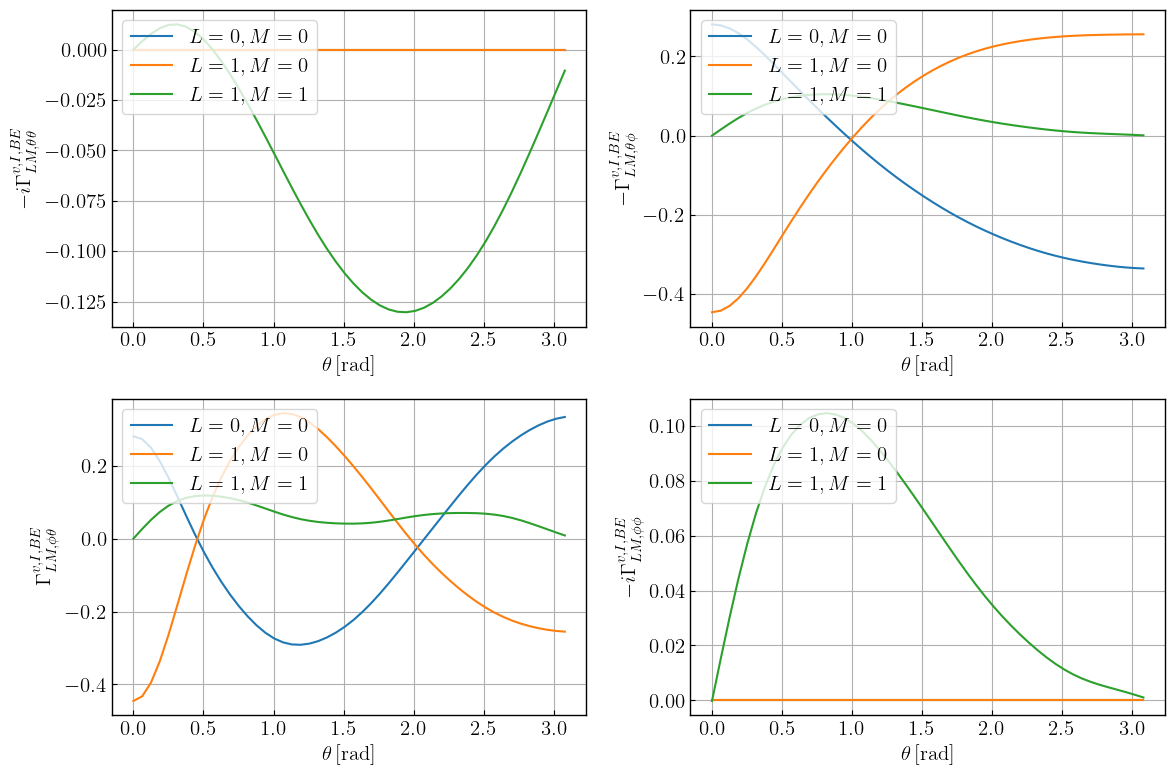

In [496]:
fig = plt.figure(figsize = (12,8),tight_layout=True)
#add_subplot(row,column,place)
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

bbox_dict = dict(edgecolor="black",facecolor="white")

ax1.plot(x,gamV_be_tt00_v,label="$L=0,M=0$")
ax1.plot(x,gamV_be_tt10_v,label="$L=1,M=0$")
ax1.plot(x,gamV_be_tt11_v,label="$L=1,M=1$")

ax1.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax1.set_ylabel("$-i\Gamma^{v,I,BE}_{LM,\\theta\\theta}$")
fig.subplots_adjust(bottom=0.)
ax1.legend(loc='upper left')

ax2.plot(x,gamV_be_tp00_v,label="$L=0,M=0$")
ax2.plot(x,gamV_be_tp10_v,label="$L=1,M=0$")
ax2.plot(x,gamV_be_tp11_v,label="$L=1,M=1$")

ax2.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax2.set_ylabel("$-\Gamma^{v,I,BE}_{LM,\\theta\phi}$")
fig.subplots_adjust(bottom=0.)
ax2.legend(loc='upper left')

ax3.plot(x,gamV_be_pt00_v,label="$L=0,M=0$")
ax3.plot(x,gamV_be_pt10_v,label="$L=1,M=0$")
ax3.plot(x,gamV_be_pt11_v,label="$L=1,M=1$")

ax3.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax3.set_ylabel("$\Gamma^{v,I,BE}_{LM,\phi\\theta}$")
fig.subplots_adjust(bottom=0.)
ax3.legend(loc='upper left')

ax4.plot(x,gamV_be_pp00_v,label="$L=0,M=0$")
ax4.plot(x,gamV_be_pp10_v,label="$L=1,M=0$")
ax4.plot(x,gamV_be_pp11_v,label="$L=1,M=1$")

ax4.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax4.set_ylabel("$-i\Gamma^{v,I,BE}_{LM,\phi\phi}$")
fig.subplots_adjust(bottom=0.)
ax4.legend(loc='upper left')

#fig.savefig("/Users/keisuke/Documents/XXX.pdf", bbox_inches='tight')
plt.show()

In [485]:
gamE_be_tt10_v = GamE_be_v(1,0,x,lmax,0,0)
gamE_be_tt11_v = GamE_be_v(1,1,x,lmax,0,0)
gamE_be_tt20_v = GamE_be_v(2,0,x,lmax,0,0)
gamE_be_tt21_v = GamE_be_v(2,1,x,lmax,0,0)

In [486]:
gamE_be_tp10_v = GamE_be_v(1,0,x,lmax,0,1)
gamE_be_tp11_v = GamE_be_v(1,1,x,lmax,0,1)
gamE_be_tp20_v = GamE_be_v(2,0,x,lmax,0,1)
gamE_be_tp21_v = GamE_be_v(2,1,x,lmax,0,1)

In [487]:
gamE_be_pt10_v = GamE_be_v(1,0,x,lmax,1,0)
gamE_be_pt11_v = GamE_be_v(1,1,x,lmax,1,0)
gamE_be_pt20_v = GamE_be_v(2,0,x,lmax,1,0)
gamE_be_pt21_v = GamE_be_v(2,1,x,lmax,1,0)

In [488]:
gamE_be_pp10_v = GamE_be_v(1,0,x,lmax,1,1)
gamE_be_pp11_v = GamE_be_v(1,1,x,lmax,1,1)
gamE_be_pp20_v = GamE_be_v(2,0,x,lmax,1,1)
gamE_be_pp21_v = GamE_be_v(2,1,x,lmax,1,1)

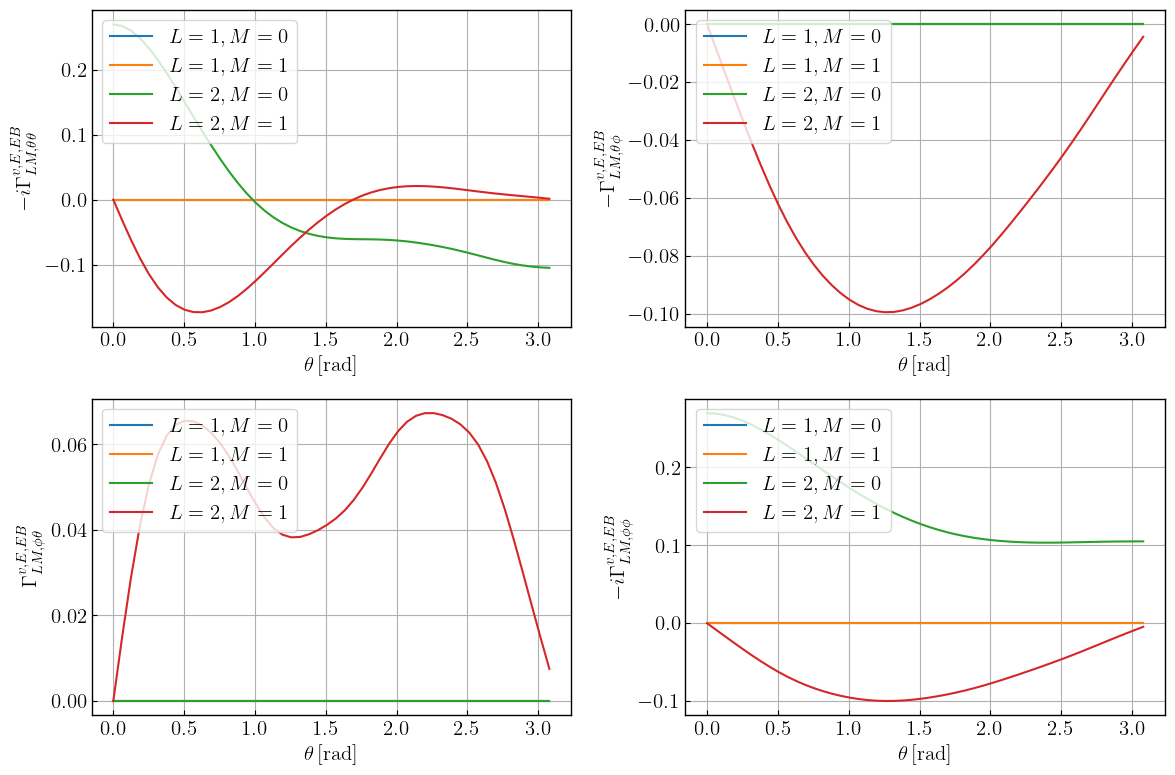

In [497]:
fig = plt.figure(figsize = (12,8),tight_layout=True)
#add_subplot(row,column,place)
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

bbox_dict = dict(edgecolor="black",facecolor="white")

ax1.plot(x,gamE_be_tt10_v,label="$L=1,M=0$")
ax1.plot(x,gamE_be_tt11_v,label="$L=1,M=1$")
ax1.plot(x,gamE_be_tt20_v,label="$L=2,M=0$")
ax1.plot(x,gamE_be_tt21_v,label="$L=2,M=1$")

ax1.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax1.set_ylabel("$-i\Gamma^{v,E,EB}_{LM,\\theta\\theta}$")
fig.subplots_adjust(bottom=0.)
ax1.legend(loc='upper left')

ax2.plot(x,gamE_be_tp10_v,label="$L=1,M=0$")
ax2.plot(x,gamE_be_tp11_v,label="$L=1,M=1$")
ax2.plot(x,gamE_be_tp20_v,label="$L=2,M=0$")
ax2.plot(x,gamE_be_tp21_v,label="$L=2,M=1$")

ax2.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax2.set_ylabel("$-\Gamma^{v,E,EB}_{LM,\\theta\phi}$")
fig.subplots_adjust(bottom=0.)
ax2.legend(loc='upper left')

ax3.plot(x,gamE_be_pt10_v,label="$L=1,M=0$")
ax3.plot(x,gamE_be_pt11_v,label="$L=1,M=1$")
ax3.plot(x,gamE_be_pt20_v,label="$L=2,M=0$")
ax3.plot(x,gamE_be_pt21_v,label="$L=2,M=1$")

ax3.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax3.set_ylabel("$\Gamma^{v,E,EB}_{LM,\phi\\theta}$")
fig.subplots_adjust(bottom=0.)
ax3.legend(loc='upper left')

ax4.plot(x,gamE_be_pp10_v,label="$L=1,M=0$")
ax4.plot(x,gamE_be_pp11_v,label="$L=1,M=1$")
ax4.plot(x,gamE_be_pp20_v,label="$L=2,M=0$")
ax4.plot(x,gamE_be_pp21_v,label="$L=2,M=1$")

ax4.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax4.set_ylabel("$-i\Gamma^{v,E,EB}_{LM,\phi\phi}$")
fig.subplots_adjust(bottom=0.)
ax4.legend(loc='upper left')

#fig.savefig("/Users/keisuke/Documents/XXX.pdf", bbox_inches='tight')
plt.show()

In [490]:
gamB_be_tt10_v = GamB_be_v(1,0,x,lmax,0,0)
gamB_be_tt11_v = GamB_be_v(1,1,x,lmax,0,0)
gamB_be_tt20_v = GamB_be_v(2,0,x,lmax,0,0)
gamB_be_tt21_v = GamB_be_v(2,1,x,lmax,0,0)

In [491]:
gamB_be_tp10_v = GamB_be_v(1,0,x,lmax,0,1)
gamB_be_tp11_v = GamB_be_v(1,1,x,lmax,0,1)
gamB_be_tp20_v = GamB_be_v(2,0,x,lmax,0,1)
gamB_be_tp21_v = GamB_be_v(2,1,x,lmax,0,1)

In [492]:
gamB_be_pt10_v = GamB_be_v(1,0,x,lmax,1,0)
gamB_be_pt11_v = GamB_be_v(1,1,x,lmax,1,0)
gamB_be_pt20_v = GamB_be_v(2,0,x,lmax,1,0)
gamB_be_pt21_v = GamB_be_v(2,1,x,lmax,1,0)

In [493]:
gamB_be_pp10_v = GamB_be_v(1,0,x,lmax,1,1)
gamB_be_pp11_v = GamB_be_v(1,1,x,lmax,1,1)
gamB_be_pp20_v = GamB_be_v(2,0,x,lmax,1,1)
gamB_be_pp21_v = GamB_be_v(2,1,x,lmax,1,1)

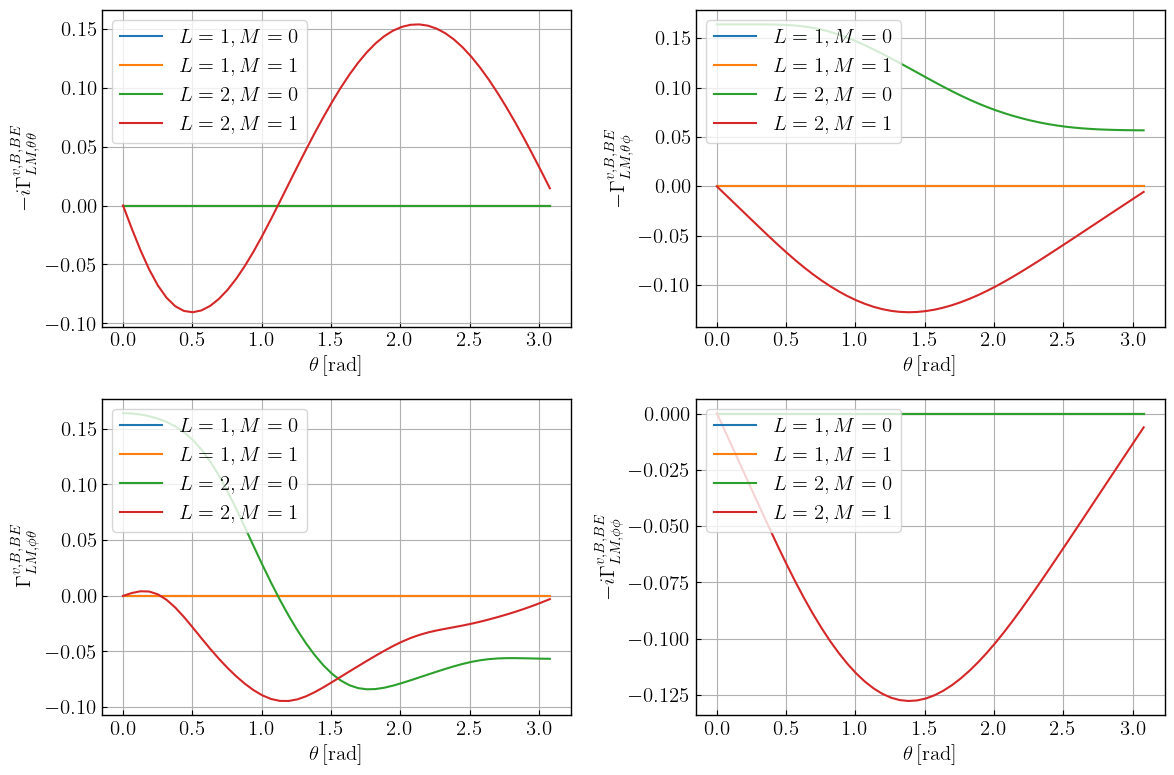

In [498]:
fig = plt.figure(figsize = (12,8),tight_layout=True)
#add_subplot(row,column,place)
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

bbox_dict = dict(edgecolor="black",facecolor="white")

ax1.plot(x,gamB_be_tt10_v,label="$L=1,M=0$")
ax1.plot(x,gamB_be_tt11_v,label="$L=1,M=1$")
ax1.plot(x,gamB_be_tt20_v,label="$L=2,M=0$")
ax1.plot(x,gamB_be_tt21_v,label="$L=2,M=1$")

ax1.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax1.set_ylabel("$-i\Gamma^{v,B,BE}_{LM,\\theta\\theta}$")
fig.subplots_adjust(bottom=0.)
ax1.legend(loc='upper left')

ax2.plot(x,gamB_be_tp10_v,label="$L=1,M=0$")
ax2.plot(x,gamB_be_tp11_v,label="$L=1,M=1$")
ax2.plot(x,gamB_be_tp20_v,label="$L=2,M=0$")
ax2.plot(x,gamB_be_tp21_v,label="$L=2,M=1$")

ax2.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax2.set_ylabel("$-\Gamma^{v,B,BE}_{LM,\\theta\phi}$")
fig.subplots_adjust(bottom=0.)
ax2.legend(loc='upper left')

ax3.plot(x,gamB_be_pt10_v,label="$L=1,M=0$")
ax3.plot(x,gamB_be_pt11_v,label="$L=1,M=1$")
ax3.plot(x,gamB_be_pt20_v,label="$L=2,M=0$")
ax3.plot(x,gamB_be_pt21_v,label="$L=2,M=1$")

ax3.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax3.set_ylabel("$\Gamma^{v,B,BE}_{LM,\phi\\theta}$")
fig.subplots_adjust(bottom=0.)
ax3.legend(loc='upper left')

ax4.plot(x,gamB_be_pp10_v,label="$L=1,M=0$")
ax4.plot(x,gamB_be_pp11_v,label="$L=1,M=1$")
ax4.plot(x,gamB_be_pp20_v,label="$L=2,M=0$")
ax4.plot(x,gamB_be_pp21_v,label="$L=2,M=1$")

ax4.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax4.set_ylabel("$-i\Gamma^{v,B,BE}_{LM,\phi\phi}$")
fig.subplots_adjust(bottom=0.)
ax4.legend(loc='upper left')

#fig.savefig("/Users/keisuke/Documents/XXX.pdf", bbox_inches='tight')
plt.show()

# $\Gamma^{p,X,Sz}_{LM,\alpha}$ and $\Gamma^{p,X,zS}_{LM,\alpha}$ in $p \in \{t,v\}$, $X \in \{I,V,E,B\}$, $S \in \{E,B\}$, and $\alpha \in \{\theta, \phi\}$

## define functions

In [529]:
def YS_Y(l,ld,L,M,theta,S,alpha): # Y^S_{alpha} x Y in S={E,B} and alpha,beta={theta,phi}
    yy=0
    for m in range(-l,l+1):
        for md in range(-ld,ld+1):
            yy = yy+ CG(l,m,ld,md,L,M).doit()*Y_S(l,m,0.001,S,alpha)*mod_Y(ld,md,theta)
            ## NOTE: 0.001 is substituted to avoid the coordinate singularity 
    return yy

def Y_YS(l,ld,L,M,theta,S,alpha): # Y x Y^S_{alpha} in S={E,B} and alpha,beta={theta,phi}
    yy=0
    for m in range(-l,l+1):
        for md in range(-ld,ld+1):
            yy = yy+ CG(l,m,ld,md,L,M).doit()*mod_Y(l,m,0.001)*Y_S(ld,md,theta,S,alpha)
            ## NOTE: 0.001 is substituted to avoid the coordinate singularity 
    return yy


def FI_ze(l,ld,L,M):
    return zlt(l)/Elt(l)*FI_ee(l,ld,L,M)
def FV_ze(l,ld,L,M):
    return zlt(l)/Elt(l)*FV_ee(l,ld,L,M)
def FE_ze(l,ld,L,M):
    return zlt(l)/Elt(l)*FE_ee(l,ld,L,M)
def FB_ze(l,ld,L,M):
    return zlt(l)/Elt(l)*FB_ee(l,ld,L,M)

def FI_ez(l,ld,L,M):
    return zlt(l)/Elt(l)*FI_ee(l,ld,L,M)
def FV_ez(l,ld,L,M):
    return zlt(l)/Elt(l)*FV_ee(l,ld,L,M)
def FE_ez(l,ld,L,M):
    return zlt(l)/Elt(l)*FE_ee(l,ld,L,M)
def FB_ez(l,ld,L,M):
    return zlt(l)/Elt(l)*FB_ee(l,ld,L,M)

def FI_zb(l,ld,L,M):
    return zlt(l)/Elt(l)*FI_eb(l,ld,L,M)
def FV_zb(l,ld,L,M):
    return zlt(l)/Elt(l)*FV_eb(l,ld,L,M)
def FE_zb(l,ld,L,M):
    return zlt(l)/Elt(l)*FE_eb(l,ld,L,M)
def FB_zb(l,ld,L,M):
    return zlt(l)/Elt(l)*FB_eb(l,ld,L,M)

def FI_bz(l,ld,L,M):
    return zlt(l)/Elt(l)*FI_be(l,ld,L,M)
def FV_bz(l,ld,L,M):
    return zlt(l)/Elt(l)*FV_be(l,ld,L,M)
def FE_bz(l,ld,L,M):
    return zlt(l)/Elt(l)*FE_be(l,ld,L,M)
def FB_bz(l,ld,L,M):
    return zlt(l)/Elt(l)*FB_be(l,ld,L,M)

def FI_ze_v(l,ld,L,M):
    return zlv(l)/Elv(l)*FI_ee_v(l,ld,L,M)
def FV_ze_v(l,ld,L,M):
    return zlv(l)/Elv(l)*FV_ee_v(l,ld,L,M)
def FE_ze_v(l,ld,L,M):
    return zlv(l)/Elv(l)*FE_ee_v(l,ld,L,M)
def FB_ze_v(l,ld,L,M):
    return zlv(l)/Elv(l)*FB_ee_v(l,ld,L,M)

def FI_ez_v(l,ld,L,M):
    return zlv(l)/Elv(l)*FI_ee_v(l,ld,L,M)
def FV_ez_v(l,ld,L,M):
    return zlv(l)/Elv(l)*FV_ee_v(l,ld,L,M)
def FE_ez_v(l,ld,L,M):
    return zlv(l)/Elv(l)*FE_ee_v(l,ld,L,M)
def FB_ez_v(l,ld,L,M):
    return zlv(l)/Elv(l)*FB_ee_v(l,ld,L,M)

def FI_zb_v(l,ld,L,M):
    return zlv(l)/Elv(l)*FI_eb_v(l,ld,L,M)
def FV_zb_v(l,ld,L,M):
    return zlv(l)/Elv(l)*FV_eb_v(l,ld,L,M)
def FE_zb_v(l,ld,L,M):
    return zlv(l)/Elv(l)*FE_eb_v(l,ld,L,M)
def FB_zb_v(l,ld,L,M):
    return zlv(l)/Elv(l)*FB_eb_v(l,ld,L,M)

def FI_bz_v(l,ld,L,M):
    return zlv(l)/Elv(l)*FI_be_v(l,ld,L,M)
def FV_bz_v(l,ld,L,M):
    return zlv(l)/Elv(l)*FV_be_v(l,ld,L,M)
def FE_bz_v(l,ld,L,M):
    return zlv(l)/Elv(l)*FE_be_v(l,ld,L,M)
def FB_bz_v(l,ld,L,M):
    return zlv(l)/Elv(l)*FB_be_v(l,ld,L,M)

def GamI_ez(L,M,theta,lmax,alpha):
    gam = 0
    for l in range(2,lmax+1):
        for ld in range(2,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FI_ez(l,ld,L,M)*YS_Y(l,ld,L,M,theta,0,alpha)
    return gam
def GamV_ez(L,M,theta,lmax,alpha):
    gam = 0
    for l in range(2,lmax+1):
        for ld in range(2,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FV_ez(l,ld,L,M)*YS_Y(l,ld,L,M,theta,0,alpha)
    return gam
def GamE_ez(L,M,theta,lmax,alpha):
    gam = 0
    for l in range(2,lmax+1):
        for ld in range(2,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FE_ez(l,ld,L,M)*YS_Y(l,ld,L,M,theta,0,alpha)
    return gam
def GamB_ez(L,M,theta,lmax,alpha):
    gam = 0
    for l in range(2,lmax+1):
        for ld in range(2,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FB_ez(l,ld,L,M)*YS_Y(l,ld,L,M,theta,0,alpha)
    return gam

def GamI_ez_v(L,M,theta,lmax,alpha):
    gam = 0
    for l in range(1,lmax+1):
        for ld in range(1,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FI_ez_v(l,ld,L,M)*YS_Y(l,ld,L,M,theta,0,alpha)
    return gam
def GamV_ez_v(L,M,theta,lmax,alpha):
    gam = 0
    for l in range(1,lmax+1):
        for ld in range(1,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FV_ez_v(l,ld,L,M)*YS_Y(l,ld,L,M,theta,0,alpha)
    return gam
def GamE_ez_v(L,M,theta,lmax,alpha):
    gam = 0
    for l in range(1,lmax+1):
        for ld in range(1,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FE_ez_v(l,ld,L,M)*YS_Y(l,ld,L,M,theta,0,alpha)
    return gam
def GamB_ez_v(L,M,theta,lmax,alpha):
    gam = 0
    for l in range(1,lmax+1):
        for ld in range(1,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FB_ez_v(l,ld,L,M)*YS_Y(l,ld,L,M,theta,0,alpha)
    return gam

def GamI_bz(L,M,theta,lmax,alpha):
    gam = 0
    for l in range(2,lmax+1):
        for ld in range(2,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FI_bz(l,ld,L,M)*YS_Y(l,ld,L,M,theta,1,alpha)
    return gam
def GamV_bz(L,M,theta,lmax,alpha):
    gam = 0
    for l in range(2,lmax+1):
        for ld in range(2,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FV_bz(l,ld,L,M)*YS_Y(l,ld,L,M,theta,1,alpha)
    return gam
def GamE_bz(L,M,theta,lmax,alpha):
    gam = 0
    for l in range(2,lmax+1):
        for ld in range(2,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FE_bz(l,ld,L,M)*YS_Y(l,ld,L,M,theta,1,alpha)
    return gam
def GamB_bz(L,M,theta,lmax,alpha):
    gam = 0
    for l in range(2,lmax+1):
        for ld in range(2,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FB_bz(l,ld,L,M)*YS_Y(l,ld,L,M,theta,1,alpha)
    return gam

def GamI_bz_v(L,M,theta,lmax,alpha):
    gam = 0
    for l in range(1,lmax+1):
        for ld in range(1,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FI_bz_v(l,ld,L,M)*YS_Y(l,ld,L,M,theta,1,alpha)
    return gam
def GamV_bz_v(L,M,theta,lmax,alpha):
    gam = 0
    for l in range(1,lmax+1):
        for ld in range(1,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FV_bz_v(l,ld,L,M)*YS_Y(l,ld,L,M,theta,1,alpha)
    return gam
def GamE_bz_v(L,M,theta,lmax,alpha):
    gam = 0
    for l in range(1,lmax+1):
        for ld in range(1,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FE_bz_v(l,ld,L,M)*YS_Y(l,ld,L,M,theta,1,alpha)
    return gam
def GamB_bz_v(L,M,theta,lmax,alpha):
    gam = 0
    for l in range(1,lmax+1):
        for ld in range(1,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FB_bz_v(l,ld,L,M)*YS_Y(l,ld,L,M,theta,1,alpha)
    return gam


def GamI_ze(L,M,theta,lmax,alpha):
    gam = 0
    for l in range(2,lmax+1):
        for ld in range(2,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FI_ze(l,ld,L,M)*Y_YS(l,ld,L,M,theta,0,alpha)
    return gam
def GamV_ze(L,M,theta,lmax,alpha):
    gam = 0
    for l in range(2,lmax+1):
        for ld in range(2,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FV_ze(l,ld,L,M)*Y_YS(l,ld,L,M,theta,0,alpha)
    return gam
def GamE_ze(L,M,theta,lmax,alpha):
    gam = 0
    for l in range(2,lmax+1):
        for ld in range(2,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FE_ze(l,ld,L,M)*Y_YS(l,ld,L,M,theta,0,alpha)
    return gam
def GamB_ze(L,M,theta,lmax,alpha):
    gam = 0
    for l in range(2,lmax+1):
        for ld in range(2,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FB_ze(l,ld,L,M)*Y_YS(l,ld,L,M,theta,0,alpha)
    return gam

def GamI_ze_v(L,M,theta,lmax,alpha):
    gam = 0
    for l in range(1,lmax+1):
        for ld in range(1,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FI_ze_v(l,ld,L,M)*Y_YS(l,ld,L,M,theta,0,alpha)
    return gam
def GamV_ze_v(L,M,theta,lmax,alpha):
    gam = 0
    for l in range(1,lmax+1):
        for ld in range(1,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FV_ze_v(l,ld,L,M)*Y_YS(l,ld,L,M,theta,0,alpha)
    return gam
def GamE_ze_v(L,M,theta,lmax,alpha):
    gam = 0
    for l in range(1,lmax+1):
        for ld in range(1,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FE_ze_v(l,ld,L,M)*Y_YS(l,ld,L,M,theta,0,alpha)
    return gam
def GamB_ze_v(L,M,theta,lmax,alpha):
    gam = 0
    for l in range(1,lmax+1):
        for ld in range(1,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FB_ze_v(l,ld,L,M)*Y_YS(l,ld,L,M,theta,0,alpha)
    return gam


def GamI_zb(L,M,theta,lmax,alpha):
    gam = 0
    for l in range(2,lmax+1):
        for ld in range(2,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FI_zb(l,ld,L,M)*Y_YS(l,ld,L,M,theta,1,alpha)
    return gam
def GamV_zb(L,M,theta,lmax,alpha):
    gam = 0
    for l in range(2,lmax+1):
        for ld in range(2,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FV_zb(l,ld,L,M)*Y_YS(l,ld,L,M,theta,1,alpha)
    return gam
def GamE_zb(L,M,theta,lmax,alpha):
    gam = 0
    for l in range(2,lmax+1):
        for ld in range(2,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FE_zb(l,ld,L,M)*Y_YS(l,ld,L,M,theta,1,alpha)
    return gam
def GamB_zb(L,M,theta,lmax,alpha):
    gam = 0
    for l in range(2,lmax+1):
        for ld in range(2,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FB_zb(l,ld,L,M)*Y_YS(l,ld,L,M,theta,1,alpha)
    return gam

def GamI_zb_v(L,M,theta,lmax,alpha):
    gam = 0
    for l in range(1,lmax+1):
        for ld in range(1,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FI_zb_v(l,ld,L,M)*Y_YS(l,ld,L,M,theta,1,alpha)
    return gam
def GamV_zb_v(L,M,theta,lmax,alpha):
    gam = 0
    for l in range(1,lmax+1):
        for ld in range(1,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FV_zb_v(l,ld,L,M)*Y_YS(l,ld,L,M,theta,1,alpha)
    return gam
def GamE_zb_v(L,M,theta,lmax,alpha):
    gam = 0
    for l in range(1,lmax+1):
        for ld in range(1,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FE_zb_v(l,ld,L,M)*Y_YS(l,ld,L,M,theta,1,alpha)
    return gam
def GamB_zb_v(L,M,theta,lmax,alpha):
    gam = 0
    for l in range(1,lmax+1):
        for ld in range(1,lmax+1):
           gam = gam + pow(-1,L)*np.sqrt(np.pi)*FB_zb_v(l,ld,L,M)*Y_YS(l,ld,L,M,theta,1,alpha)
    return gam


## Determine the number of plots and l_{max}

In [530]:
div = 50 # number of points between [0, Pi]
lmax = 10 # max value of l which we take into account
epsilon = 1e-4 # regulator
x = np.arange(epsilon, np.pi-epsilon, np.pi/div)

## $\Gamma^{t,X,Sz}_{LM,\alpha}$ and $\Gamma^{t,X,zS}_{LM,\alpha}$ (spin-2 GWs)

### $\Gamma^{t,X,Ez}_{LM,\alpha}$

In [531]:
gamI_ez_t00 = GamI_ez(0,0,x,lmax,0)
gamI_ez_t10 = GamI_ez(1,0,x,lmax,0)
gamI_ez_t11 = GamI_ez(1,1,x,lmax,0)

In [532]:
gamI_ez_p00 = GamI_ez(0,0,x,lmax,1)
gamI_ez_p10 = GamI_ez(1,0,x,lmax,1)
gamI_ez_p11 = GamI_ez(1,1,x,lmax,1)

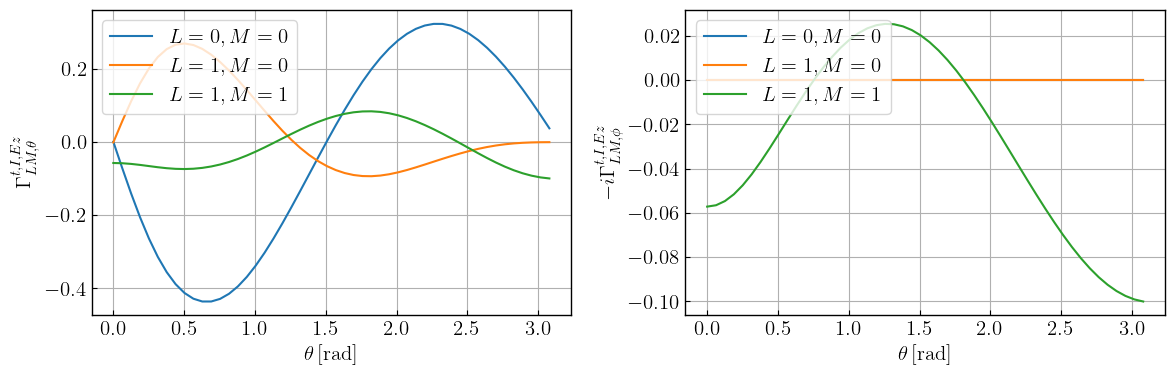

In [535]:
fig = plt.figure(figsize = (12,4),tight_layout=True)
#add_subplot(row,column,place)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

bbox_dict = dict(edgecolor="black",facecolor="white")

ax1.plot(x,gamI_ez_t00,label="$L=0,M=0$")
ax1.plot(x,gamI_ez_t10,label="$L=1,M=0$")
ax1.plot(x,gamI_ez_t11,label="$L=1,M=1$")

ax1.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax1.set_ylabel("$\Gamma^{t,I,Ez}_{LM,\\theta}$")
fig.subplots_adjust(bottom=0.)
ax1.legend(loc='upper left')

ax2.plot(x,gamI_ez_p00,label="$L=0,M=0$")
ax2.plot(x,gamI_ez_p10,label="$L=1,M=0$")
ax2.plot(x,gamI_ez_p11,label="$L=1,M=1$")

ax2.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax2.set_ylabel("$-i\Gamma^{t,I,Ez}_{LM,\phi}$")
fig.subplots_adjust(bottom=0.)
ax2.legend(loc='upper left')


#fig.savefig("/Users/keisuke/Documents/XXX.pdf", bbox_inches='tight')
plt.show()

In [545]:
gamV_ez_t00 = GamV_ez(0,0,x,lmax,0)
gamV_ez_t10 = GamV_ez(1,0,x,lmax,0)
gamV_ez_t11 = GamV_ez(1,1,x,lmax,0)

In [546]:
gamV_ez_p00 = GamV_ez(0,0,x,lmax,1)
gamV_ez_p10 = GamV_ez(1,0,x,lmax,1)
gamV_ez_p11 = GamV_ez(1,1,x,lmax,1)

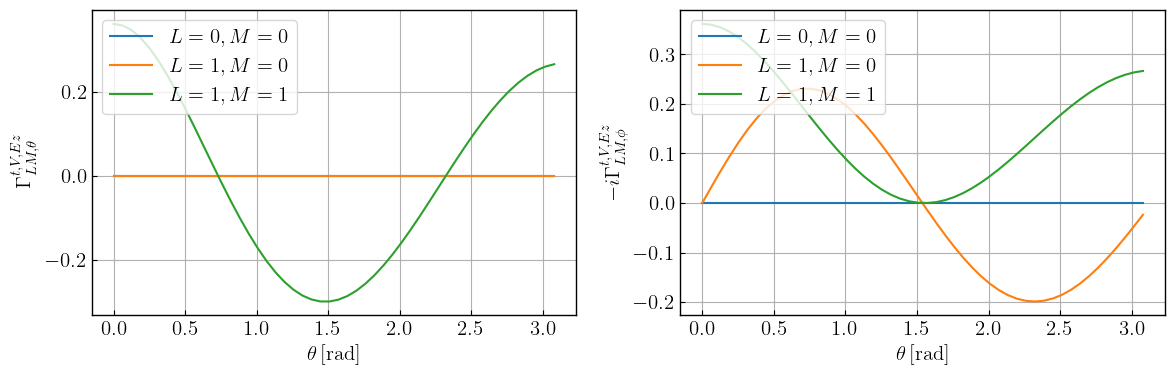

In [547]:
fig = plt.figure(figsize = (12,4),tight_layout=True)
#add_subplot(row,column,place)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

bbox_dict = dict(edgecolor="black",facecolor="white")

ax1.plot(x,gamV_ez_t00,label="$L=0,M=0$")
ax1.plot(x,gamV_ez_t10,label="$L=1,M=0$")
ax1.plot(x,gamV_ez_t11,label="$L=1,M=1$")

ax1.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax1.set_ylabel("$\Gamma^{t,V,Ez}_{LM,\\theta}$")
fig.subplots_adjust(bottom=0.)
ax1.legend(loc='upper left')

ax2.plot(x,gamV_ez_p00,label="$L=0,M=0$")
ax2.plot(x,gamV_ez_p10,label="$L=1,M=0$")
ax2.plot(x,gamV_ez_p11,label="$L=1,M=1$")

ax2.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax2.set_ylabel("$-i\Gamma^{t,V,Ez}_{LM,\phi}$")
fig.subplots_adjust(bottom=0.)
ax2.legend(loc='upper left')


#fig.savefig("/Users/keisuke/Documents/XXX.pdf", bbox_inches='tight')
plt.show()

In [538]:
gamE_ez_t30 = GamE_ez(3,0,x,lmax,0)
gamE_ez_t31 = GamE_ez(3,1,x,lmax,0)
gamE_ez_t40 = GamE_ez(4,0,x,lmax,0)
gamE_ez_t41 = GamE_ez(4,1,x,lmax,0)

In [539]:
gamE_ez_p30 = GamE_ez(3,0,x,lmax,1)
gamE_ez_p31 = GamE_ez(3,1,x,lmax,1)
gamE_ez_p40 = GamE_ez(4,0,x,lmax,1)
gamE_ez_p41 = GamE_ez(4,1,x,lmax,1)

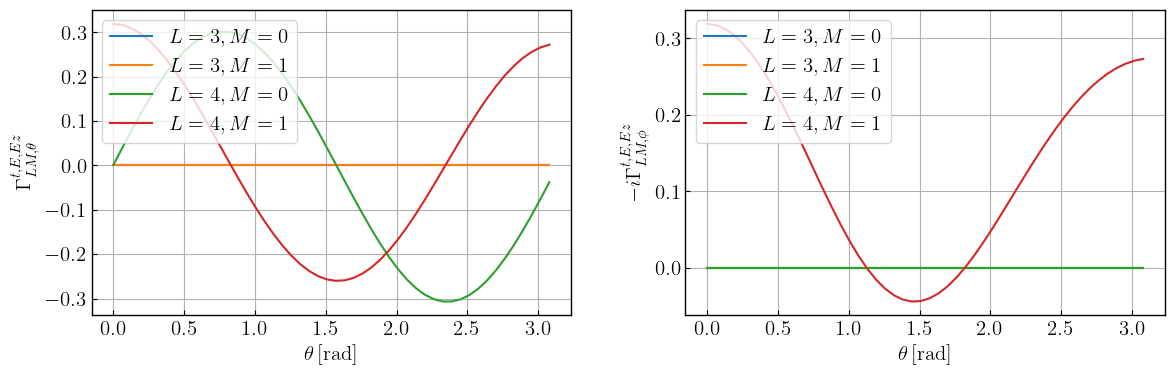

In [540]:
fig = plt.figure(figsize = (12,4),tight_layout=True)
#add_subplot(row,column,place)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

bbox_dict = dict(edgecolor="black",facecolor="white")

ax1.plot(x,gamE_ez_t30,label="$L=3,M=0$")
ax1.plot(x,gamE_ez_t31,label="$L=3,M=1$")
ax1.plot(x,gamE_ez_t40,label="$L=4,M=0$")
ax1.plot(x,gamE_ez_t41,label="$L=4,M=1$")

ax1.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax1.set_ylabel("$\Gamma^{t,E,Ez}_{LM,\\theta}$")
fig.subplots_adjust(bottom=0.)
ax1.legend(loc='upper left')

ax2.plot(x,gamE_ez_p30,label="$L=3,M=0$")
ax2.plot(x,gamE_ez_p31,label="$L=3,M=1$")
ax2.plot(x,gamE_ez_p40,label="$L=4,M=0$")
ax2.plot(x,gamE_ez_p41,label="$L=4,M=1$")

ax2.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax2.set_ylabel("$-i\Gamma^{t,E,Ez}_{LM,\phi}$")
fig.subplots_adjust(bottom=0.)
ax2.legend(loc='upper left')


#fig.savefig("/Users/keisuke/Documents/XXX.pdf", bbox_inches='tight')
plt.show()

In [542]:
gamB_ez_t30 = GamB_ez(3,0,x,lmax,0)
gamB_ez_t31 = GamB_ez(3,1,x,lmax,0)
gamB_ez_t40 = GamB_ez(4,0,x,lmax,0)
gamB_ez_t41 = GamB_ez(4,1,x,lmax,0)

In [543]:
gamB_ez_p30 = GamB_ez(3,0,x,lmax,1)
gamB_ez_p31 = GamB_ez(3,1,x,lmax,1)
gamB_ez_p40 = GamB_ez(4,0,x,lmax,1)
gamB_ez_p41 = GamB_ez(4,1,x,lmax,1)

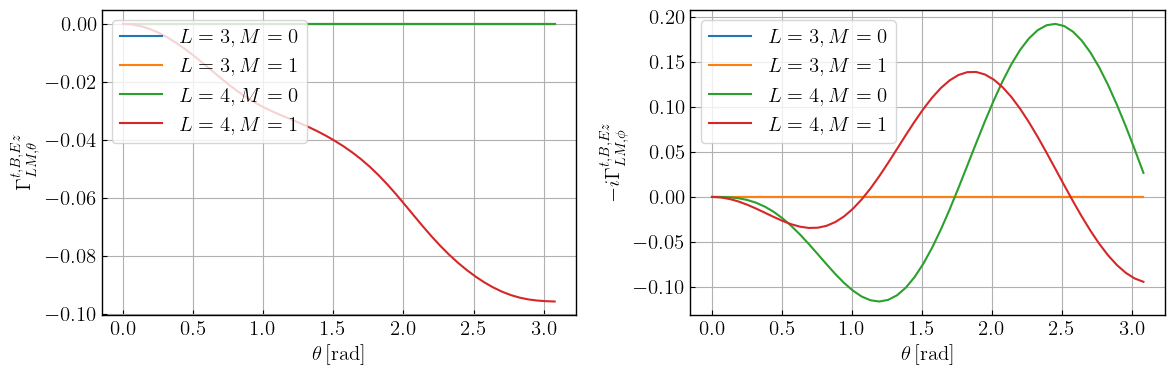

In [544]:
fig = plt.figure(figsize = (12,4),tight_layout=True)
#add_subplot(row,column,place)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

bbox_dict = dict(edgecolor="black",facecolor="white")

ax1.plot(x,gamB_ez_t30,label="$L=3,M=0$")
ax1.plot(x,gamB_ez_t31,label="$L=3,M=1$")
ax1.plot(x,gamB_ez_t40,label="$L=4,M=0$")
ax1.plot(x,gamB_ez_t41,label="$L=4,M=1$")

ax1.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax1.set_ylabel("$\Gamma^{t,B,Ez}_{LM,\\theta}$")
fig.subplots_adjust(bottom=0.)
ax1.legend(loc='upper left')

ax2.plot(x,gamB_ez_p30,label="$L=3,M=0$")
ax2.plot(x,gamB_ez_p31,label="$L=3,M=1$")
ax2.plot(x,gamB_ez_p40,label="$L=4,M=0$")
ax2.plot(x,gamB_ez_p41,label="$L=4,M=1$")

ax2.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax2.set_ylabel("$-i\Gamma^{t,B,Ez}_{LM,\phi}$")
fig.subplots_adjust(bottom=0.)
ax2.legend(loc='upper left')


#fig.savefig("/Users/keisuke/Documents/XXX.pdf", bbox_inches='tight')
plt.show()

### $\Gamma^{t,X,zE}_{LM,\alpha}$

In [548]:
gamI_ze_t00 = GamI_ze(0,0,x,lmax,0)
gamI_ze_t10 = GamI_ze(1,0,x,lmax,0)
gamI_ze_t11 = GamI_ze(1,1,x,lmax,0)

In [549]:
gamI_ze_p00 = GamI_ze(0,0,x,lmax,1)
gamI_ze_p10 = GamI_ze(1,0,x,lmax,1)
gamI_ze_p11 = GamI_ze(1,1,x,lmax,1)

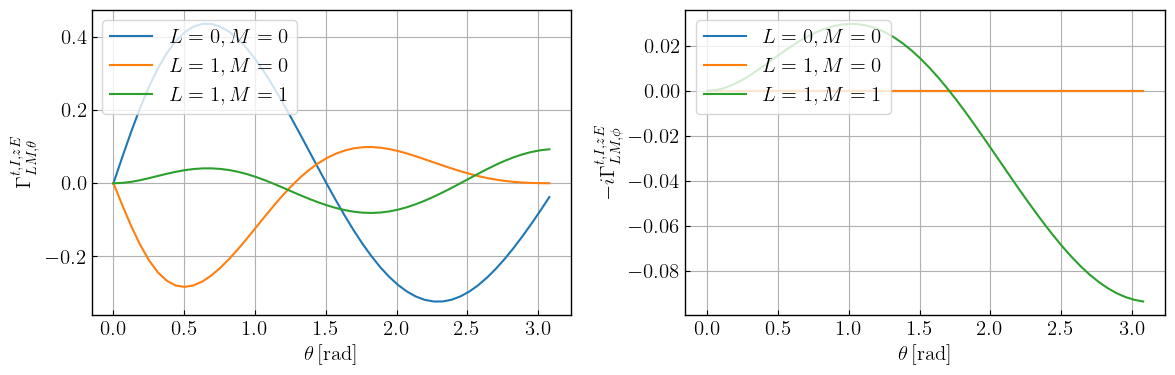

In [550]:
fig = plt.figure(figsize = (12,4),tight_layout=True)
#add_subplot(row,column,place)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

bbox_dict = dict(edgecolor="black",facecolor="white")

ax1.plot(x,gamI_ze_t00,label="$L=0,M=0$")
ax1.plot(x,gamI_ze_t10,label="$L=1,M=0$")
ax1.plot(x,gamI_ze_t11,label="$L=1,M=1$")

ax1.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax1.set_ylabel("$\Gamma^{t,I,zE}_{LM,\\theta}$")
fig.subplots_adjust(bottom=0.)
ax1.legend(loc='upper left')

ax2.plot(x,gamI_ze_p00,label="$L=0,M=0$")
ax2.plot(x,gamI_ze_p10,label="$L=1,M=0$")
ax2.plot(x,gamI_ze_p11,label="$L=1,M=1$")

ax2.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax2.set_ylabel("$-i\Gamma^{t,I,zE}_{LM,\phi}$")
fig.subplots_adjust(bottom=0.)
ax2.legend(loc='upper left')


#fig.savefig("/Users/keisuke/Documents/XXX.pdf", bbox_inches='tight')
plt.show()

In [551]:
gamV_ze_t00 = GamV_ze(0,0,x,lmax,0)
gamV_ze_t10 = GamV_ze(1,0,x,lmax,0)
gamV_ze_t11 = GamV_ze(1,1,x,lmax,0)

In [552]:
gamV_ze_p00 = GamV_ze(0,0,x,lmax,1)
gamV_ze_p10 = GamV_ze(1,0,x,lmax,1)
gamV_ze_p11 = GamV_ze(1,1,x,lmax,1)

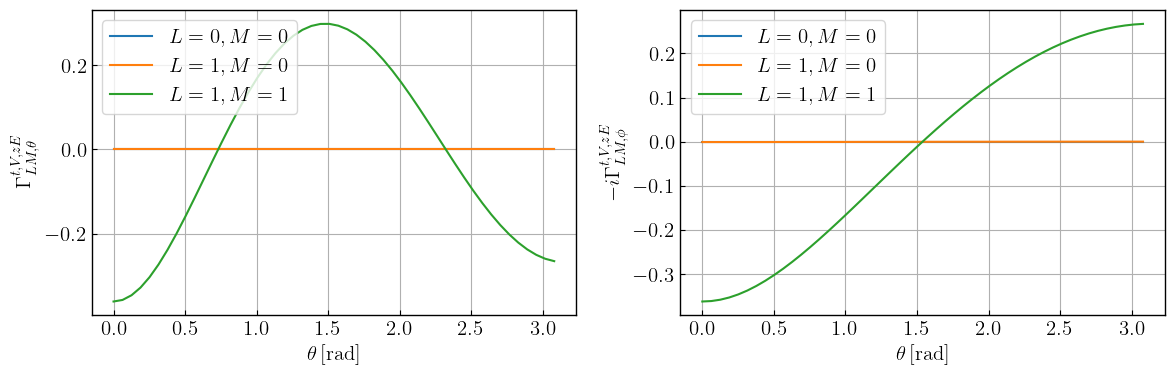

In [553]:
fig = plt.figure(figsize = (12,4),tight_layout=True)
#add_subplot(row,column,place)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

bbox_dict = dict(edgecolor="black",facecolor="white")

ax1.plot(x,gamV_ze_t00,label="$L=0,M=0$")
ax1.plot(x,gamV_ze_t10,label="$L=1,M=0$")
ax1.plot(x,gamV_ze_t11,label="$L=1,M=1$")

ax1.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax1.set_ylabel("$\Gamma^{t,V,zE}_{LM,\\theta}$")
fig.subplots_adjust(bottom=0.)
ax1.legend(loc='upper left')

ax2.plot(x,gamV_ze_p00,label="$L=0,M=0$")
ax2.plot(x,gamV_ze_p10,label="$L=1,M=0$")
ax2.plot(x,gamV_ze_p11,label="$L=1,M=1$")

ax2.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax2.set_ylabel("$-i\Gamma^{t,V,zE}_{LM,\phi}$")
fig.subplots_adjust(bottom=0.)
ax2.legend(loc='upper left')


#fig.savefig("/Users/keisuke/Documents/XXX.pdf", bbox_inches='tight')
plt.show()

In [554]:
gamE_ze_t30 = GamE_ze(3,0,x,lmax,0)
gamE_ze_t31 = GamE_ze(3,1,x,lmax,0)
gamE_ze_t40 = GamE_ze(4,0,x,lmax,0)
gamE_ze_t41 = GamE_ze(4,1,x,lmax,0)

In [555]:
gamE_ze_p30 = GamE_ze(3,0,x,lmax,1)
gamE_ze_p31 = GamE_ze(3,1,x,lmax,1)
gamE_ze_p40 = GamE_ze(4,0,x,lmax,1)
gamE_ze_p41 = GamE_ze(4,1,x,lmax,1)

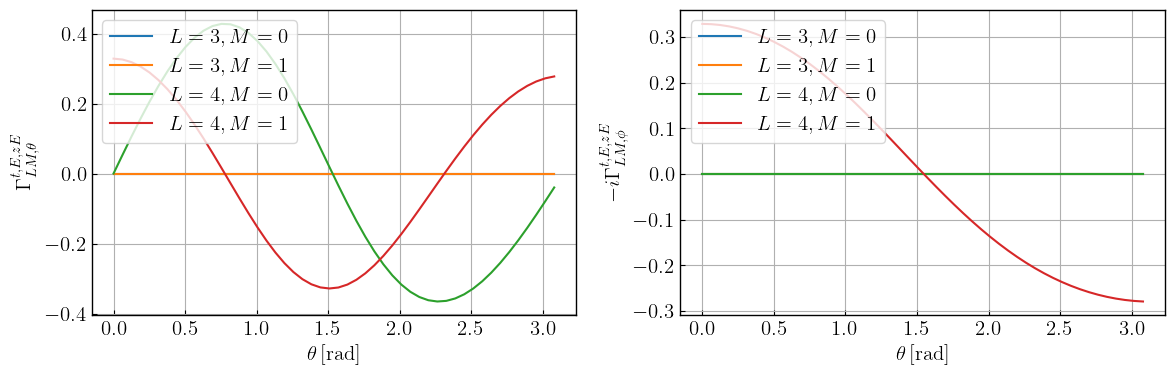

In [556]:
fig = plt.figure(figsize = (12,4),tight_layout=True)
#add_subplot(row,column,place)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

bbox_dict = dict(edgecolor="black",facecolor="white")

ax1.plot(x,gamE_ze_t30,label="$L=3,M=0$")
ax1.plot(x,gamE_ze_t31,label="$L=3,M=1$")
ax1.plot(x,gamE_ze_t40,label="$L=4,M=0$")
ax1.plot(x,gamE_ze_t41,label="$L=4,M=1$")

ax1.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax1.set_ylabel("$\Gamma^{t,E,zE}_{LM,\\theta}$")
fig.subplots_adjust(bottom=0.)
ax1.legend(loc='upper left')

ax2.plot(x,gamE_ze_p30,label="$L=3,M=0$")
ax2.plot(x,gamE_ze_p31,label="$L=3,M=1$")
ax2.plot(x,gamE_ze_p40,label="$L=4,M=0$")
ax2.plot(x,gamE_ze_p41,label="$L=4,M=1$")

ax2.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax2.set_ylabel("$-i\Gamma^{t,E,zE}_{LM,\phi}$")
fig.subplots_adjust(bottom=0.)
ax2.legend(loc='upper left')


#fig.savefig("/Users/keisuke/Documents/XXX.pdf", bbox_inches='tight')
plt.show()

In [557]:
gamB_ze_t30 = GamB_ze(3,0,x,lmax,0)
gamB_ze_t31 = GamB_ze(3,1,x,lmax,0)
gamB_ze_t40 = GamB_ze(4,0,x,lmax,0)
gamB_ze_t41 = GamB_ze(4,1,x,lmax,0)

In [558]:
gamB_ze_p30 = GamB_ze(3,0,x,lmax,1)
gamB_ze_p31 = GamB_ze(3,1,x,lmax,1)
gamB_ze_p40 = GamB_ze(4,0,x,lmax,1)
gamB_ze_p41 = GamB_ze(4,1,x,lmax,1)

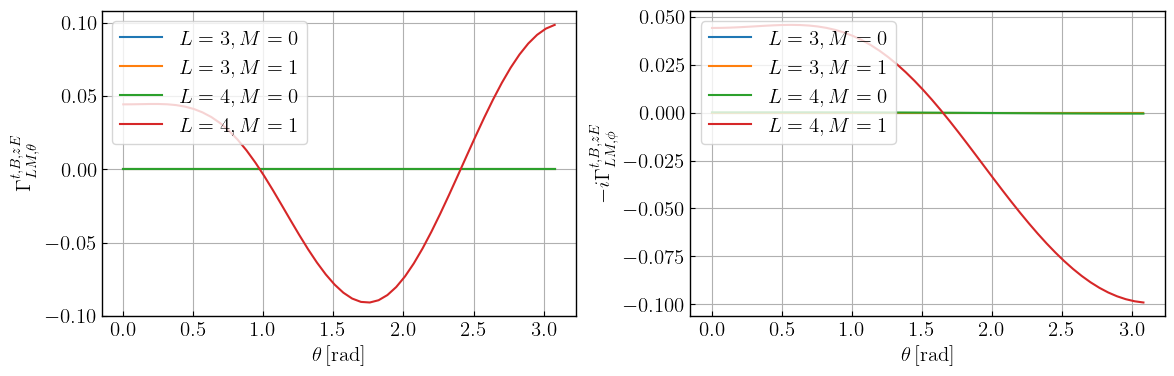

In [559]:
fig = plt.figure(figsize = (12,4),tight_layout=True)
#add_subplot(row,column,place)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

bbox_dict = dict(edgecolor="black",facecolor="white")

ax1.plot(x,gamB_ze_t30,label="$L=3,M=0$")
ax1.plot(x,gamB_ze_t31,label="$L=3,M=1$")
ax1.plot(x,gamB_ze_t40,label="$L=4,M=0$")
ax1.plot(x,gamB_ze_t41,label="$L=4,M=1$")

ax1.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax1.set_ylabel("$\Gamma^{t,B,zE}_{LM,\\theta}$")
fig.subplots_adjust(bottom=0.)
ax1.legend(loc='upper left')

ax2.plot(x,gamB_ze_p30,label="$L=3,M=0$")
ax2.plot(x,gamB_ze_p31,label="$L=3,M=1$")
ax2.plot(x,gamB_ze_p40,label="$L=4,M=0$")
ax2.plot(x,gamB_ze_p41,label="$L=4,M=1$")

ax2.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax2.set_ylabel("$-i\Gamma^{t,B,zE}_{LM,\phi}$")
fig.subplots_adjust(bottom=0.)
ax2.legend(loc='upper left')


#fig.savefig("/Users/keisuke/Documents/XXX.pdf", bbox_inches='tight')
plt.show()

### $\Gamma^{t,X,Bz}_{LM,\alpha}$

In [560]:
gamI_bz_t00 = GamI_bz(0,0,x,lmax,0)
gamI_bz_t10 = GamI_bz(1,0,x,lmax,0)
gamI_bz_t11 = GamI_bz(1,1,x,lmax,0)

In [561]:
gamI_bz_p00 = GamI_bz(0,0,x,lmax,1)
gamI_bz_p10 = GamI_bz(1,0,x,lmax,1)
gamI_bz_p11 = GamI_bz(1,1,x,lmax,1)

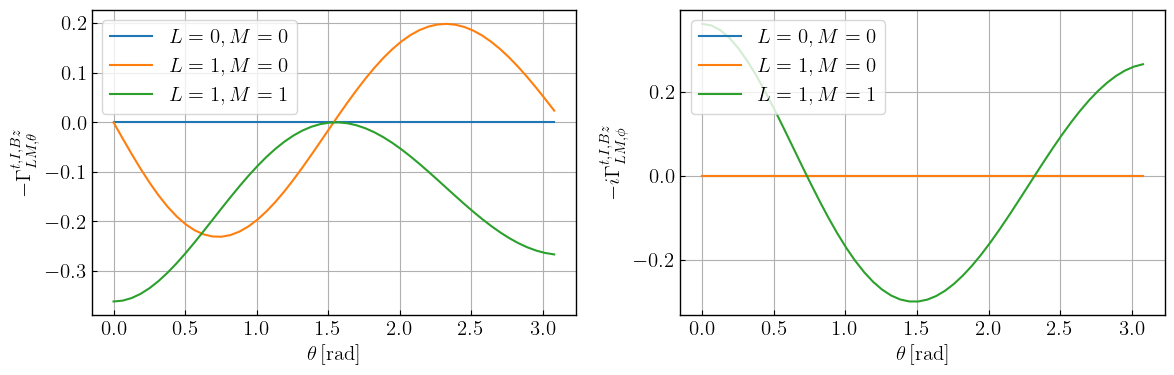

In [567]:
fig = plt.figure(figsize = (12,4),tight_layout=True)
#add_subplot(row,column,place)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

bbox_dict = dict(edgecolor="black",facecolor="white")

ax1.plot(x,gamI_bz_t00,label="$L=0,M=0$")
ax1.plot(x,gamI_bz_t10,label="$L=1,M=0$")
ax1.plot(x,gamI_bz_t11,label="$L=1,M=1$")

ax1.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax1.set_ylabel("$-\Gamma^{t,I,Bz}_{LM,\\theta}$")
fig.subplots_adjust(bottom=0.)
ax1.legend(loc='upper left')

ax2.plot(x,gamI_bz_p00,label="$L=0,M=0$")
ax2.plot(x,gamI_bz_p10,label="$L=1,M=0$")
ax2.plot(x,gamI_bz_p11,label="$L=1,M=1$")

ax2.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax2.set_ylabel("$-i\Gamma^{t,I,Bz}_{LM,\phi}$")
fig.subplots_adjust(bottom=0.)
ax2.legend(loc='upper left')


#fig.savefig("/Users/keisuke/Documents/XXX.pdf", bbox_inches='tight')
plt.show()

In [563]:
gamV_bz_t00 = GamV_bz(0,0,x,lmax,0)
gamV_bz_t10 = GamV_bz(1,0,x,lmax,0)
gamV_bz_t11 = GamV_bz(1,1,x,lmax,0)

In [564]:
gamV_bz_p00 = GamV_bz(0,0,x,lmax,1)
gamV_bz_p10 = GamV_bz(1,0,x,lmax,1)
gamV_bz_p11 = GamV_bz(1,1,x,lmax,1)

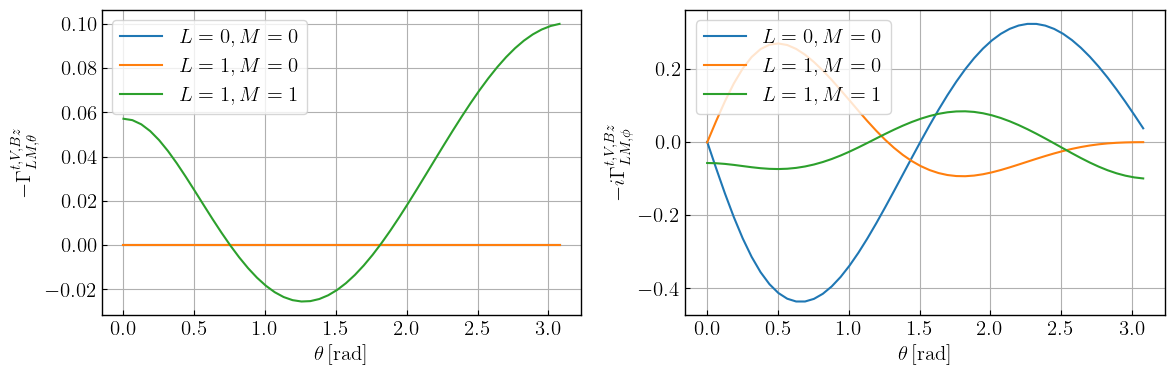

In [568]:
fig = plt.figure(figsize = (12,4),tight_layout=True)
#add_subplot(row,column,place)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

bbox_dict = dict(edgecolor="black",facecolor="white")

ax1.plot(x,gamV_bz_t00,label="$L=0,M=0$")
ax1.plot(x,gamV_bz_t10,label="$L=1,M=0$")
ax1.plot(x,gamV_bz_t11,label="$L=1,M=1$")

ax1.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax1.set_ylabel("$-\Gamma^{t,V,Bz}_{LM,\\theta}$")
fig.subplots_adjust(bottom=0.)
ax1.legend(loc='upper left')

ax2.plot(x,gamV_bz_p00,label="$L=0,M=0$")
ax2.plot(x,gamV_bz_p10,label="$L=1,M=0$")
ax2.plot(x,gamV_bz_p11,label="$L=1,M=1$")

ax2.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax2.set_ylabel("$-i\Gamma^{t,V,Bz}_{LM,\phi}$")
fig.subplots_adjust(bottom=0.)
ax2.legend(loc='upper left')


#fig.savefig("/Users/keisuke/Documents/XXX.pdf", bbox_inches='tight')
plt.show()

In [569]:
gamE_bz_t30 = GamE_bz(3,0,x,lmax,0)
gamE_bz_t31 = GamE_bz(3,1,x,lmax,0)
gamE_bz_t40 = GamE_bz(4,0,x,lmax,0)
gamE_bz_t41 = GamE_bz(4,1,x,lmax,0)

In [570]:
gamE_bz_p30 = GamE_bz(3,0,x,lmax,1)
gamE_bz_p31 = GamE_bz(3,1,x,lmax,1)
gamE_bz_p40 = GamE_bz(4,0,x,lmax,1)
gamE_bz_p41 = GamE_bz(4,1,x,lmax,1)

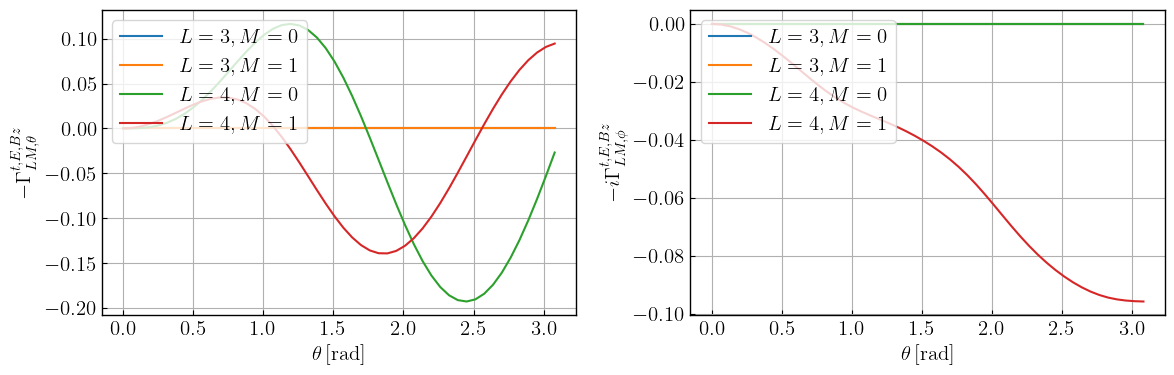

In [571]:
fig = plt.figure(figsize = (12,4),tight_layout=True)
#add_subplot(row,column,place)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

bbox_dict = dict(edgecolor="black",facecolor="white")

ax1.plot(x,gamE_bz_t30,label="$L=3,M=0$")
ax1.plot(x,gamE_bz_t31,label="$L=3,M=1$")
ax1.plot(x,gamE_bz_t40,label="$L=4,M=0$")
ax1.plot(x,gamE_bz_t41,label="$L=4,M=1$")

ax1.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax1.set_ylabel("$-\Gamma^{t,E,Bz}_{LM,\\theta}$")
fig.subplots_adjust(bottom=0.)
ax1.legend(loc='upper left')

ax2.plot(x,gamE_bz_p30,label="$L=3,M=0$")
ax2.plot(x,gamE_bz_p31,label="$L=3,M=1$")
ax2.plot(x,gamE_bz_p40,label="$L=4,M=0$")
ax2.plot(x,gamE_bz_p41,label="$L=4,M=1$")

ax2.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax2.set_ylabel("$-i\Gamma^{t,E,Bz}_{LM,\phi}$")
fig.subplots_adjust(bottom=0.)
ax2.legend(loc='upper left')


#fig.savefig("/Users/keisuke/Documents/XXX.pdf", bbox_inches='tight')
plt.show()

In [573]:
gamB_bz_t30 = GamB_bz(3,0,x,lmax,0)
gamB_bz_t31 = GamB_bz(3,1,x,lmax,0)
gamB_bz_t40 = GamB_bz(4,0,x,lmax,0)
gamB_bz_t41 = GamB_bz(4,1,x,lmax,0)

In [574]:
gamB_bz_p30 = GamB_bz(3,0,x,lmax,1)
gamB_bz_p31 = GamB_bz(3,1,x,lmax,1)
gamB_bz_p40 = GamB_bz(4,0,x,lmax,1)
gamB_bz_p41 = GamB_bz(4,1,x,lmax,1)

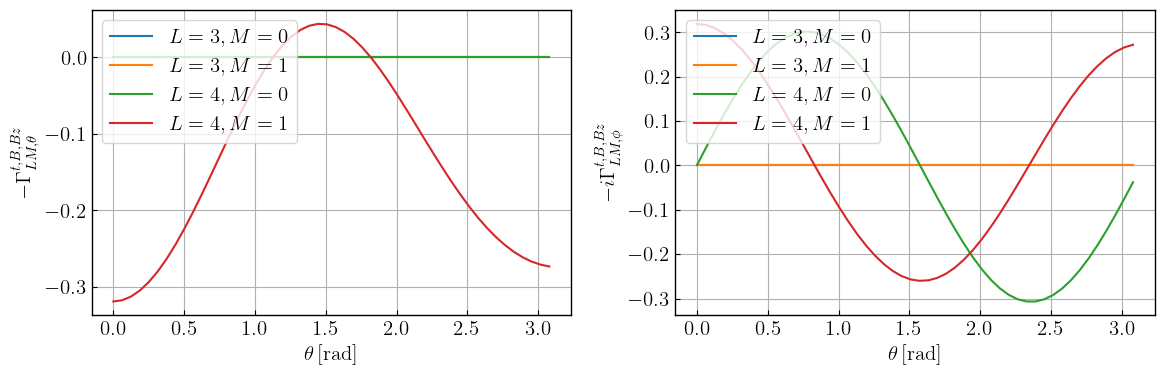

In [575]:
fig = plt.figure(figsize = (12,4),tight_layout=True)
#add_subplot(row,column,place)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

bbox_dict = dict(edgecolor="black",facecolor="white")

ax1.plot(x,gamB_bz_t30,label="$L=3,M=0$")
ax1.plot(x,gamB_bz_t31,label="$L=3,M=1$")
ax1.plot(x,gamB_bz_t40,label="$L=4,M=0$")
ax1.plot(x,gamB_bz_t41,label="$L=4,M=1$")

ax1.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax1.set_ylabel("$-\Gamma^{t,B,Bz}_{LM,\\theta}$")
fig.subplots_adjust(bottom=0.)
ax1.legend(loc='upper left')

ax2.plot(x,gamB_bz_p30,label="$L=3,M=0$")
ax2.plot(x,gamB_bz_p31,label="$L=3,M=1$")
ax2.plot(x,gamB_bz_p40,label="$L=4,M=0$")
ax2.plot(x,gamB_bz_p41,label="$L=4,M=1$")

ax2.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax2.set_ylabel("$-i\Gamma^{t,B,Bz}_{LM,\phi}$")
fig.subplots_adjust(bottom=0.)
ax2.legend(loc='upper left')


#fig.savefig("/Users/keisuke/Documents/XXX.pdf", bbox_inches='tight')
plt.show()

### $\Gamma^{t,X,zB}_{LM,\alpha}$

In [576]:
gamI_zb_t00 = GamI_zb(0,0,x,lmax,0)
gamI_zb_t10 = GamI_zb(1,0,x,lmax,0)
gamI_zb_t11 = GamI_zb(1,1,x,lmax,0)

In [577]:
gamI_zb_p00 = GamI_zb(0,0,x,lmax,1)
gamI_zb_p10 = GamI_zb(1,0,x,lmax,1)
gamI_zb_p11 = GamI_zb(1,1,x,lmax,1)

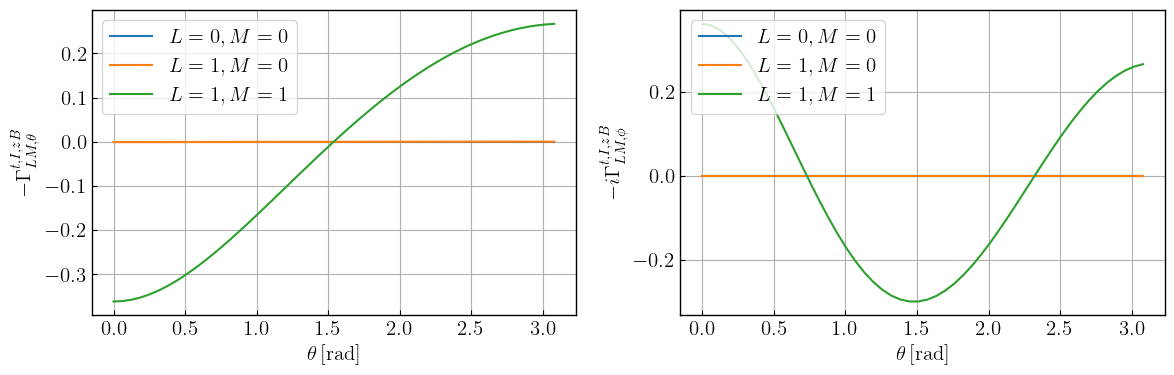

In [578]:
fig = plt.figure(figsize = (12,4),tight_layout=True)
#add_subplot(row,column,place)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

bbox_dict = dict(edgecolor="black",facecolor="white")

ax1.plot(x,gamI_zb_t00,label="$L=0,M=0$")
ax1.plot(x,gamI_zb_t10,label="$L=1,M=0$")
ax1.plot(x,gamI_zb_t11,label="$L=1,M=1$")

ax1.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax1.set_ylabel("$-\Gamma^{t,I,zB}_{LM,\\theta}$")
fig.subplots_adjust(bottom=0.)
ax1.legend(loc='upper left')

ax2.plot(x,gamI_zb_p00,label="$L=0,M=0$")
ax2.plot(x,gamI_zb_p10,label="$L=1,M=0$")
ax2.plot(x,gamI_zb_p11,label="$L=1,M=1$")

ax2.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax2.set_ylabel("$-i\Gamma^{t,I,zB}_{LM,\phi}$")
fig.subplots_adjust(bottom=0.)
ax2.legend(loc='upper left')


#fig.savefig("/Users/keisuke/Documents/XXX.pdf", bbox_inches='tight')
plt.show()

In [579]:
gamV_zb_t00 = GamV_zb(0,0,x,lmax,0)
gamV_zb_t10 = GamV_zb(1,0,x,lmax,0)
gamV_zb_t11 = GamV_zb(1,1,x,lmax,0)

In [580]:
gamV_zb_p00 = GamV_zb(0,0,x,lmax,1)
gamV_zb_p10 = GamV_zb(1,0,x,lmax,1)
gamV_zb_p11 = GamV_zb(1,1,x,lmax,1)

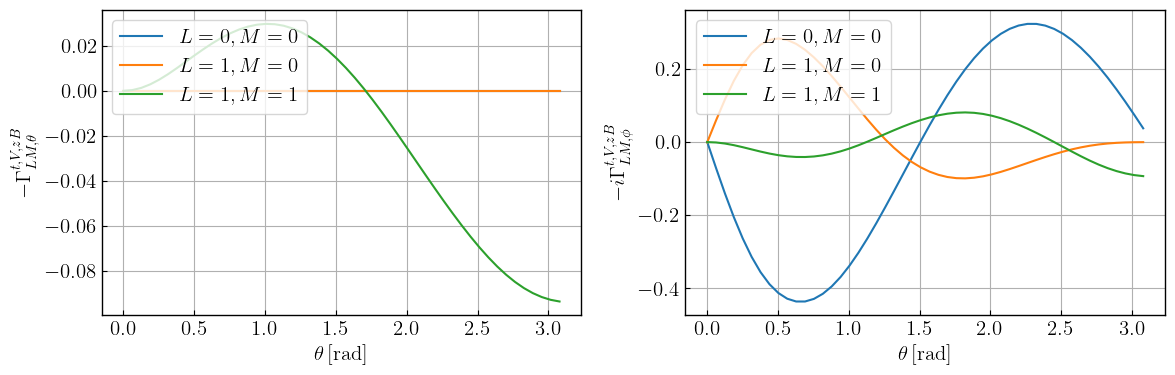

In [581]:
fig = plt.figure(figsize = (12,4),tight_layout=True)
#add_subplot(row,column,place)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

bbox_dict = dict(edgecolor="black",facecolor="white")

ax1.plot(x,gamV_zb_t00,label="$L=0,M=0$")
ax1.plot(x,gamV_zb_t10,label="$L=1,M=0$")
ax1.plot(x,gamV_zb_t11,label="$L=1,M=1$")

ax1.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax1.set_ylabel("$-\Gamma^{t,V,zB}_{LM,\\theta}$")
fig.subplots_adjust(bottom=0.)
ax1.legend(loc='upper left')

ax2.plot(x,gamV_zb_p00,label="$L=0,M=0$")
ax2.plot(x,gamV_zb_p10,label="$L=1,M=0$")
ax2.plot(x,gamV_zb_p11,label="$L=1,M=1$")

ax2.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax2.set_ylabel("$-i\Gamma^{t,V,zB}_{LM,\phi}$")
fig.subplots_adjust(bottom=0.)
ax2.legend(loc='upper left')


#fig.savefig("/Users/keisuke/Documents/XXX.pdf", bbox_inches='tight')
plt.show()

In [582]:
gamE_zb_t30 = GamE_zb(3,0,x,lmax,0)
gamE_zb_t31 = GamE_zb(3,1,x,lmax,0)
gamE_zb_t40 = GamE_zb(4,0,x,lmax,0)
gamE_zb_t41 = GamE_zb(4,1,x,lmax,0)

In [583]:
gamE_zb_p30 = GamE_zb(3,0,x,lmax,1)
gamE_zb_p31 = GamE_zb(3,1,x,lmax,1)
gamE_zb_p40 = GamE_zb(4,0,x,lmax,1)
gamE_zb_p41 = GamE_zb(4,1,x,lmax,1)

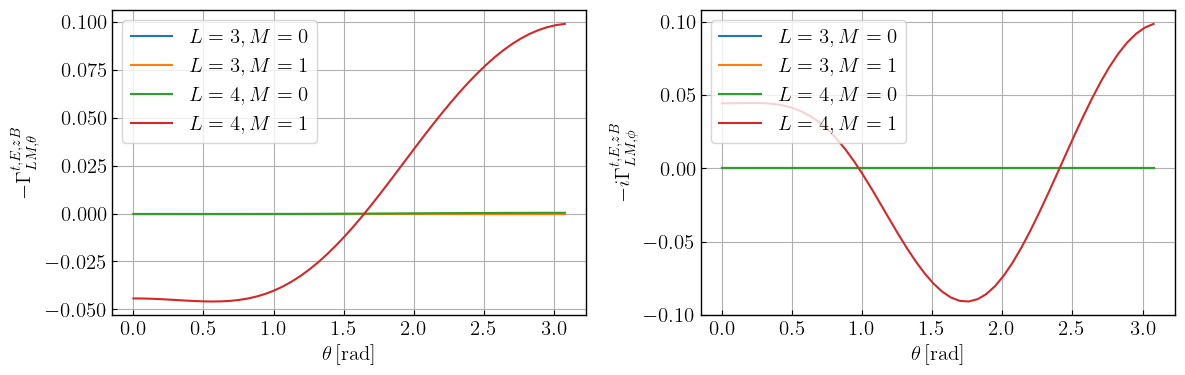

In [584]:
fig = plt.figure(figsize = (12,4),tight_layout=True)
#add_subplot(row,column,place)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

bbox_dict = dict(edgecolor="black",facecolor="white")

ax1.plot(x,gamE_zb_t30,label="$L=3,M=0$")
ax1.plot(x,gamE_zb_t31,label="$L=3,M=1$")
ax1.plot(x,gamE_zb_t40,label="$L=4,M=0$")
ax1.plot(x,gamE_zb_t41,label="$L=4,M=1$")

ax1.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax1.set_ylabel("$-\Gamma^{t,E,zB}_{LM,\\theta}$")
fig.subplots_adjust(bottom=0.)
ax1.legend(loc='upper left')

ax2.plot(x,gamE_zb_p30,label="$L=3,M=0$")
ax2.plot(x,gamE_zb_p31,label="$L=3,M=1$")
ax2.plot(x,gamE_zb_p40,label="$L=4,M=0$")
ax2.plot(x,gamE_zb_p41,label="$L=4,M=1$")

ax2.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax2.set_ylabel("$-i\Gamma^{t,E,zB}_{LM,\phi}$")
fig.subplots_adjust(bottom=0.)
ax2.legend(loc='upper left')


#fig.savefig("/Users/keisuke/Documents/XXX.pdf", bbox_inches='tight')
plt.show()

In [585]:
gamB_zb_t30 = GamB_zb(3,0,x,lmax,0)
gamB_zb_t31 = GamB_zb(3,1,x,lmax,0)
gamB_zb_t40 = GamB_zb(4,0,x,lmax,0)
gamB_zb_t41 = GamB_zb(4,1,x,lmax,0)

In [586]:
gamB_zb_p30 = GamB_zb(3,0,x,lmax,1)
gamB_zb_p31 = GamB_zb(3,1,x,lmax,1)
gamB_zb_p40 = GamB_zb(4,0,x,lmax,1)
gamB_zb_p41 = GamB_zb(4,1,x,lmax,1)

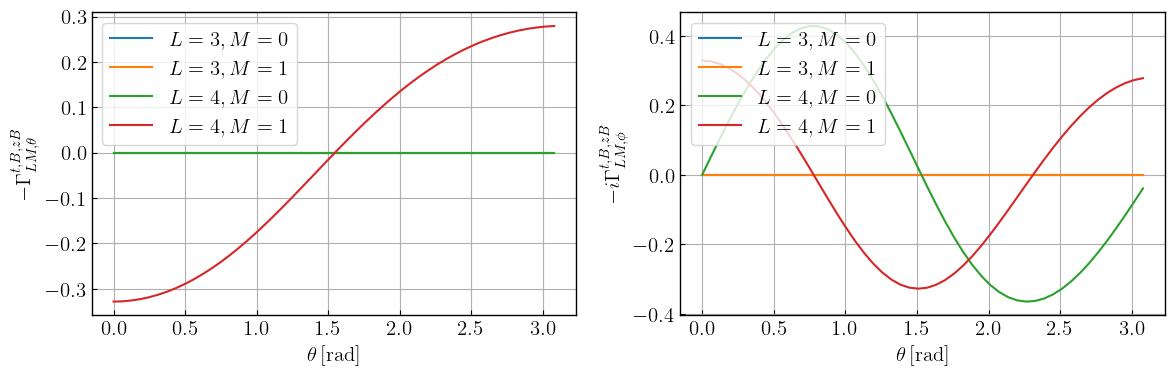

In [587]:
fig = plt.figure(figsize = (12,4),tight_layout=True)
#add_subplot(row,column,place)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

bbox_dict = dict(edgecolor="black",facecolor="white")

ax1.plot(x,gamB_zb_t30,label="$L=3,M=0$")
ax1.plot(x,gamB_zb_t31,label="$L=3,M=1$")
ax1.plot(x,gamB_zb_t40,label="$L=4,M=0$")
ax1.plot(x,gamB_zb_t41,label="$L=4,M=1$")

ax1.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax1.set_ylabel("$-\Gamma^{t,B,zB}_{LM,\\theta}$")
fig.subplots_adjust(bottom=0.)
ax1.legend(loc='upper left')

ax2.plot(x,gamB_zb_p30,label="$L=3,M=0$")
ax2.plot(x,gamB_zb_p31,label="$L=3,M=1$")
ax2.plot(x,gamB_zb_p40,label="$L=4,M=0$")
ax2.plot(x,gamB_zb_p41,label="$L=4,M=1$")

ax2.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax2.set_ylabel("$-i\Gamma^{t,B,zB}_{LM,\phi}$")
fig.subplots_adjust(bottom=0.)
ax2.legend(loc='upper left')


#fig.savefig("/Users/keisuke/Documents/XXX.pdf", bbox_inches='tight')
plt.show()

## $\Gamma^{v,X,Sz}_{LM,\alpha}$ and $\Gamma^{v,X,zS}_{LM,\alpha}$ (spin-1 GWs)

### $\Gamma^{v,X,Ez}_{LM,\alpha}$

In [588]:
gamI_ez_t00_v = GamI_ez_v(0,0,x,lmax,0)
gamI_ez_t10_v = GamI_ez_v(1,0,x,lmax,0)
gamI_ez_t11_v = GamI_ez_v(1,1,x,lmax,0)

In [589]:
gamI_ez_p00_v = GamI_ez_v(0,0,x,lmax,1)
gamI_ez_p10_v = GamI_ez_v(1,0,x,lmax,1)
gamI_ez_p11_v = GamI_ez_v(1,1,x,lmax,1)

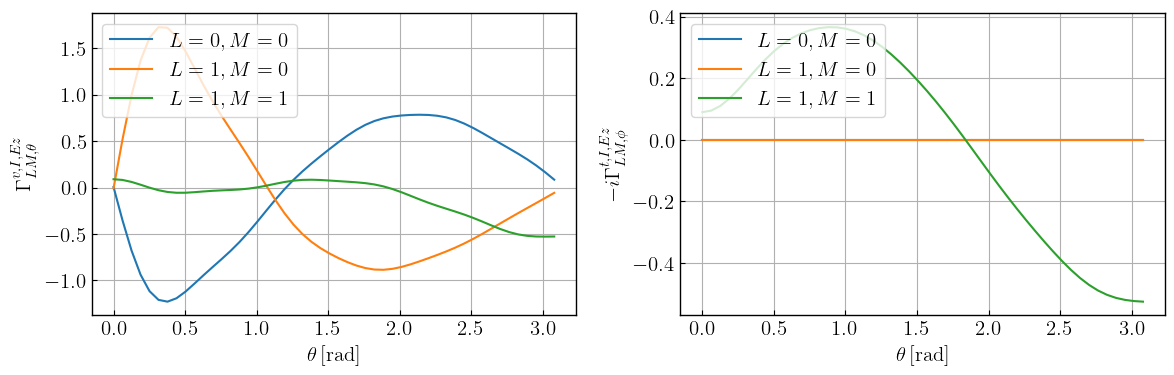

In [590]:
fig = plt.figure(figsize = (12,4),tight_layout=True)
#add_subplot(row,column,place)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

bbox_dict = dict(edgecolor="black",facecolor="white")

ax1.plot(x,gamI_ez_t00_v,label="$L=0,M=0$")
ax1.plot(x,gamI_ez_t10_v,label="$L=1,M=0$")
ax1.plot(x,gamI_ez_t11_v,label="$L=1,M=1$")

ax1.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax1.set_ylabel("$\Gamma^{v,I,Ez}_{LM,\\theta}$")
fig.subplots_adjust(bottom=0.)
ax1.legend(loc='upper left')

ax2.plot(x,gamI_ez_p00_v,label="$L=0,M=0$")
ax2.plot(x,gamI_ez_p10_v,label="$L=1,M=0$")
ax2.plot(x,gamI_ez_p11_v,label="$L=1,M=1$")

ax2.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax2.set_ylabel("$-i\Gamma^{t,I,Ez}_{LM,\phi}$")
fig.subplots_adjust(bottom=0.)
ax2.legend(loc='upper left')


#fig.savefig("/Users/keisuke/Documents/XXX.pdf", bbox_inches='tight')
plt.show()

In [591]:
gamV_ez_t00_v = GamV_ez_v(0,0,x,lmax,0)
gamV_ez_t10_v = GamV_ez_v(1,0,x,lmax,0)
gamV_ez_t11_v = GamV_ez_v(1,1,x,lmax,0)

In [592]:
gamV_ez_p00_v = GamV_ez_v(0,0,x,lmax,1)
gamV_ez_p10_v = GamV_ez_v(1,0,x,lmax,1)
gamV_ez_p11_v = GamV_ez_v(1,1,x,lmax,1)

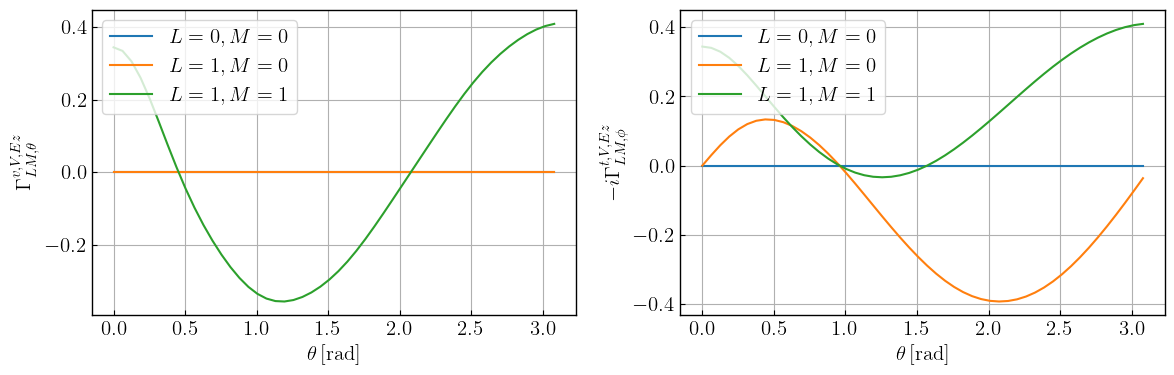

In [593]:
fig = plt.figure(figsize = (12,4),tight_layout=True)
#add_subplot(row,column,place)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

bbox_dict = dict(edgecolor="black",facecolor="white")

ax1.plot(x,gamV_ez_t00_v,label="$L=0,M=0$")
ax1.plot(x,gamV_ez_t10_v,label="$L=1,M=0$")
ax1.plot(x,gamV_ez_t11_v,label="$L=1,M=1$")

ax1.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax1.set_ylabel("$\Gamma^{v,V,Ez}_{LM,\\theta}$")
fig.subplots_adjust(bottom=0.)
ax1.legend(loc='upper left')

ax2.plot(x,gamV_ez_p00_v,label="$L=0,M=0$")
ax2.plot(x,gamV_ez_p10_v,label="$L=1,M=0$")
ax2.plot(x,gamV_ez_p11_v,label="$L=1,M=1$")

ax2.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax2.set_ylabel("$-i\Gamma^{t,V,Ez}_{LM,\phi}$")
fig.subplots_adjust(bottom=0.)
ax2.legend(loc='upper left')


#fig.savefig("/Users/keisuke/Documents/XXX.pdf", bbox_inches='tight')
plt.show()

In [601]:
gamE_ez_t10_v = GamE_ez_v(1,0,x,lmax,0)
gamE_ez_t11_v = GamE_ez_v(1,1,x,lmax,0)
gamE_ez_t20_v = GamE_ez_v(2,0,x,lmax,0)
gamE_ez_t21_v = GamE_ez_v(2,1,x,lmax,0)

In [602]:
gamE_ez_p10_v = GamE_ez_v(1,0,x,lmax,1)
gamE_ez_p11_v = GamE_ez_v(1,1,x,lmax,1)
gamE_ez_p20_v = GamE_ez_v(2,0,x,lmax,1)
gamE_ez_p21_v = GamE_ez_v(2,1,x,lmax,1)

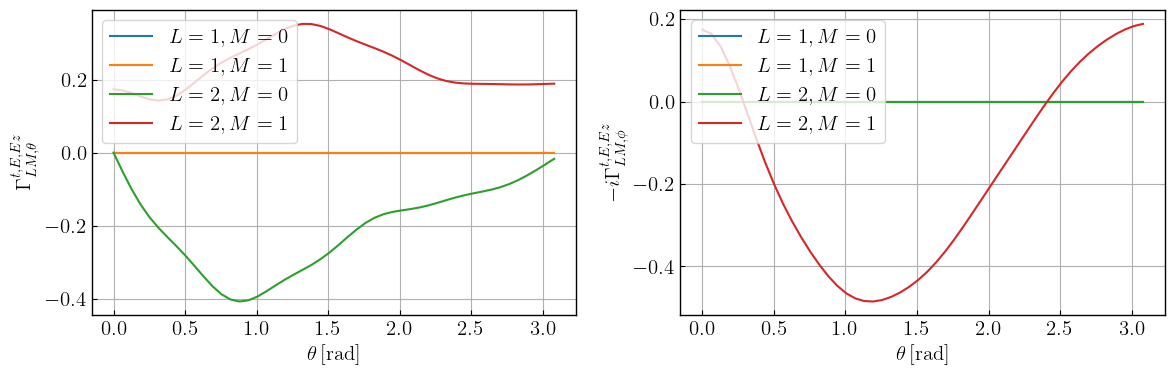

In [603]:
fig = plt.figure(figsize = (12,4),tight_layout=True)
#add_subplot(row,column,place)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

bbox_dict = dict(edgecolor="black",facecolor="white")

ax1.plot(x,gamE_ez_t10_v,label="$L=1,M=0$")
ax1.plot(x,gamE_ez_t11_v,label="$L=1,M=1$")
ax1.plot(x,gamE_ez_t20_v,label="$L=2,M=0$")
ax1.plot(x,gamE_ez_t21_v,label="$L=2,M=1$")

ax1.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax1.set_ylabel("$\Gamma^{t,E,Ez}_{LM,\\theta}$")
fig.subplots_adjust(bottom=0.)
ax1.legend(loc='upper left')

ax2.plot(x,gamE_ez_p10_v,label="$L=1,M=0$")
ax2.plot(x,gamE_ez_p11_v,label="$L=1,M=1$")
ax2.plot(x,gamE_ez_p20_v,label="$L=2,M=0$")
ax2.plot(x,gamE_ez_p21_v,label="$L=2,M=1$")

ax2.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax2.set_ylabel("$-i\Gamma^{t,E,Ez}_{LM,\phi}$")
fig.subplots_adjust(bottom=0.)
ax2.legend(loc='upper left')


#fig.savefig("/Users/keisuke/Documents/XXX.pdf", bbox_inches='tight')
plt.show()

In [606]:
gamB_ez_t10_v = GamB_ez_v(1,0,x,lmax,0)
gamB_ez_t11_v = GamB_ez_v(1,1,x,lmax,0)
gamB_ez_t20_v = GamB_ez_v(2,0,x,lmax,0)
gamB_ez_t21_v = GamB_ez_v(2,1,x,lmax,0)

In [607]:
gamB_ez_p10_v = GamB_ez_v(1,0,x,lmax,1)
gamB_ez_p11_v = GamB_ez_v(1,1,x,lmax,1)
gamB_ez_p20_v = GamB_ez_v(2,0,x,lmax,1)
gamB_ez_p21_v = GamB_ez_v(2,1,x,lmax,1)

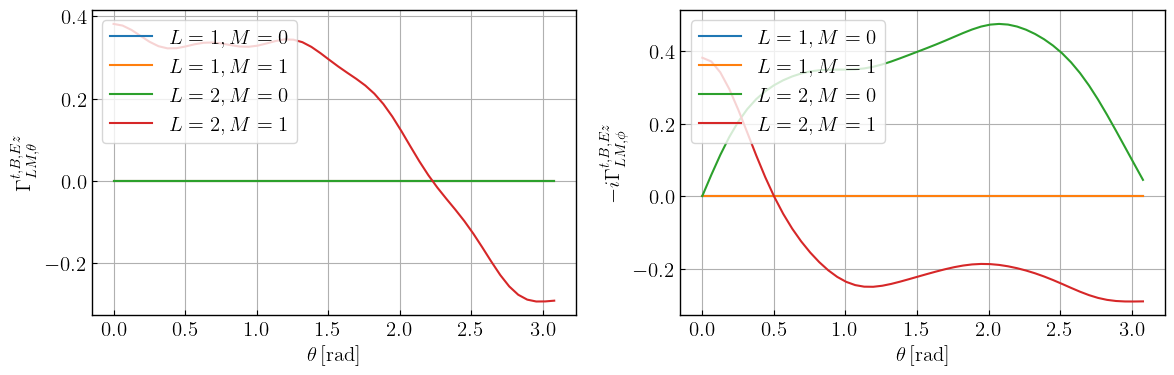

In [608]:
fig = plt.figure(figsize = (12,4),tight_layout=True)
#add_subplot(row,column,place)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

bbox_dict = dict(edgecolor="black",facecolor="white")

ax1.plot(x,gamB_ez_t10_v,label="$L=1,M=0$")
ax1.plot(x,gamB_ez_t11_v,label="$L=1,M=1$")
ax1.plot(x,gamB_ez_t20_v,label="$L=2,M=0$")
ax1.plot(x,gamB_ez_t21_v,label="$L=2,M=1$")

ax1.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax1.set_ylabel("$\Gamma^{t,B,Ez}_{LM,\\theta}$")
fig.subplots_adjust(bottom=0.)
ax1.legend(loc='upper left')

ax2.plot(x,gamB_ez_p10_v,label="$L=1,M=0$")
ax2.plot(x,gamB_ez_p11_v,label="$L=1,M=1$")
ax2.plot(x,gamB_ez_p20_v,label="$L=2,M=0$")
ax2.plot(x,gamB_ez_p21_v,label="$L=2,M=1$")

ax2.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax2.set_ylabel("$-i\Gamma^{t,B,Ez}_{LM,\phi}$")
fig.subplots_adjust(bottom=0.)
ax2.legend(loc='upper left')


#fig.savefig("/Users/keisuke/Documents/XXX.pdf", bbox_inches='tight')
plt.show()

### $\Gamma^{v,X,zE}_{LM,\alpha}$

In [609]:
gamI_ze_t00_v = GamI_ze_v(0,0,x,lmax,0)
gamI_ze_t10_v = GamI_ze_v(1,0,x,lmax,0)
gamI_ze_t11_v = GamI_ze_v(1,1,x,lmax,0)

In [610]:
gamI_ze_p00_v = GamI_ze_v(0,0,x,lmax,1)
gamI_ze_p10_v = GamI_ze_v(1,0,x,lmax,1)
gamI_ze_p11_v = GamI_ze_v(1,1,x,lmax,1)

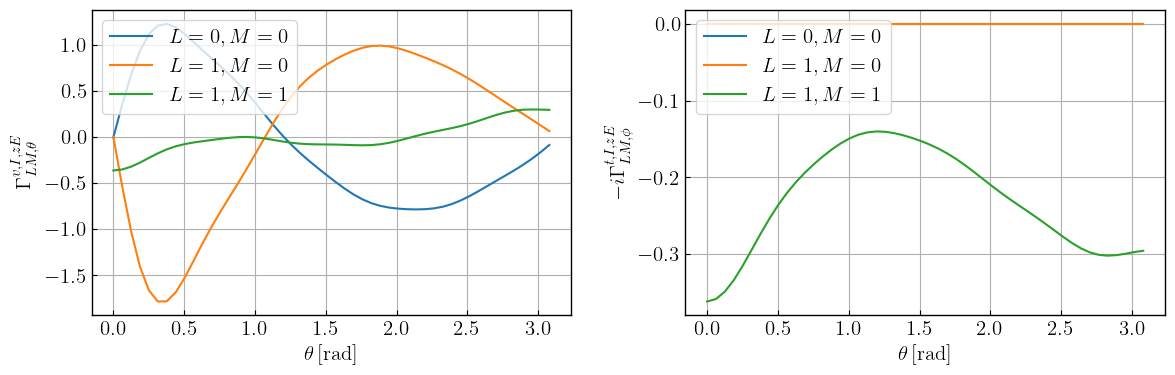

In [611]:
fig = plt.figure(figsize = (12,4),tight_layout=True)
#add_subplot(row,column,place)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

bbox_dict = dict(edgecolor="black",facecolor="white")

ax1.plot(x,gamI_ze_t00_v,label="$L=0,M=0$")
ax1.plot(x,gamI_ze_t10_v,label="$L=1,M=0$")
ax1.plot(x,gamI_ze_t11_v,label="$L=1,M=1$")

ax1.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax1.set_ylabel("$\Gamma^{v,I,zE}_{LM,\\theta}$")
fig.subplots_adjust(bottom=0.)
ax1.legend(loc='upper left')

ax2.plot(x,gamI_ze_p00_v,label="$L=0,M=0$")
ax2.plot(x,gamI_ze_p10_v,label="$L=1,M=0$")
ax2.plot(x,gamI_ze_p11_v,label="$L=1,M=1$")

ax2.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax2.set_ylabel("$-i\Gamma^{t,I,zE}_{LM,\phi}$")
fig.subplots_adjust(bottom=0.)
ax2.legend(loc='upper left')


#fig.savefig("/Users/keisuke/Documents/XXX.pdf", bbox_inches='tight')
plt.show()

In [612]:
gamV_ze_t00_v = GamV_ze_v(0,0,x,lmax,0)
gamV_ze_t10_v = GamV_ze_v(1,0,x,lmax,0)
gamV_ze_t11_v = GamV_ze_v(1,1,x,lmax,0)

In [613]:
gamV_ze_p00_v = GamV_ze_v(0,0,x,lmax,1)
gamV_ze_p10_v = GamV_ze_v(1,0,x,lmax,1)
gamV_ze_p11_v = GamV_ze_v(1,1,x,lmax,1)

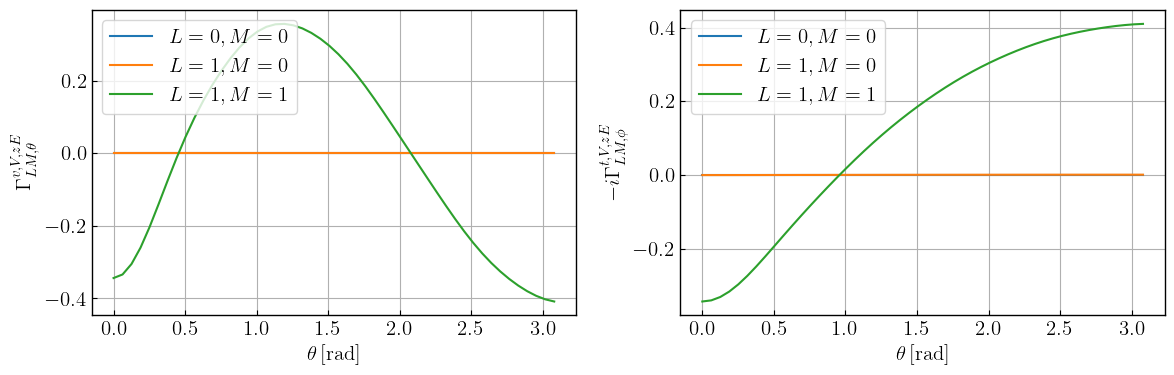

In [614]:
fig = plt.figure(figsize = (12,4),tight_layout=True)
#add_subplot(row,column,place)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

bbox_dict = dict(edgecolor="black",facecolor="white")

ax1.plot(x,gamV_ze_t00_v,label="$L=0,M=0$")
ax1.plot(x,gamV_ze_t10_v,label="$L=1,M=0$")
ax1.plot(x,gamV_ze_t11_v,label="$L=1,M=1$")

ax1.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax1.set_ylabel("$\Gamma^{v,V,zE}_{LM,\\theta}$")
fig.subplots_adjust(bottom=0.)
ax1.legend(loc='upper left')

ax2.plot(x,gamV_ze_p00_v,label="$L=0,M=0$")
ax2.plot(x,gamV_ze_p10_v,label="$L=1,M=0$")
ax2.plot(x,gamV_ze_p11_v,label="$L=1,M=1$")

ax2.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax2.set_ylabel("$-i\Gamma^{t,V,zE}_{LM,\phi}$")
fig.subplots_adjust(bottom=0.)
ax2.legend(loc='upper left')


#fig.savefig("/Users/keisuke/Documents/XXX.pdf", bbox_inches='tight')
plt.show()

In [615]:
gamE_ze_t10_v = GamE_ze_v(1,0,x,lmax,0)
gamE_ze_t11_v = GamE_ze_v(1,1,x,lmax,0)
gamE_ze_t20_v = GamE_ze_v(2,0,x,lmax,0)
gamE_ze_t21_v = GamE_ze_v(2,1,x,lmax,0)

In [616]:
gamE_ze_p10_v = GamE_ze_v(1,0,x,lmax,1)
gamE_ze_p11_v = GamE_ze_v(1,1,x,lmax,1)
gamE_ze_p20_v = GamE_ze_v(2,0,x,lmax,1)
gamE_ze_p21_v = GamE_ze_v(2,1,x,lmax,1)

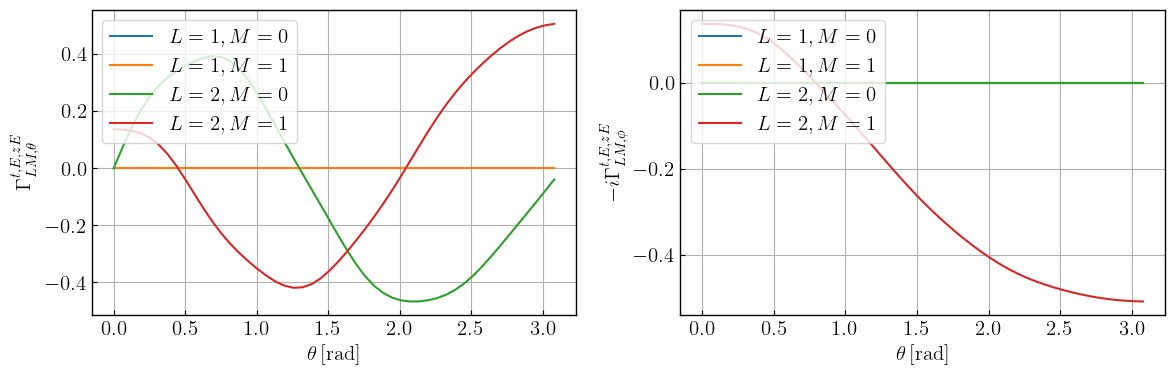

In [617]:
fig = plt.figure(figsize = (12,4),tight_layout=True)
#add_subplot(row,column,place)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

bbox_dict = dict(edgecolor="black",facecolor="white")

ax1.plot(x,gamE_ze_t10_v,label="$L=1,M=0$")
ax1.plot(x,gamE_ze_t11_v,label="$L=1,M=1$")
ax1.plot(x,gamE_ze_t20_v,label="$L=2,M=0$")
ax1.plot(x,gamE_ze_t21_v,label="$L=2,M=1$")

ax1.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax1.set_ylabel("$\Gamma^{t,E,zE}_{LM,\\theta}$")
fig.subplots_adjust(bottom=0.)
ax1.legend(loc='upper left')

ax2.plot(x,gamE_ze_p10_v,label="$L=1,M=0$")
ax2.plot(x,gamE_ze_p11_v,label="$L=1,M=1$")
ax2.plot(x,gamE_ze_p20_v,label="$L=2,M=0$")
ax2.plot(x,gamE_ze_p21_v,label="$L=2,M=1$")

ax2.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax2.set_ylabel("$-i\Gamma^{t,E,zE}_{LM,\phi}$")
fig.subplots_adjust(bottom=0.)
ax2.legend(loc='upper left')


#fig.savefig("/Users/keisuke/Documents/XXX.pdf", bbox_inches='tight')
plt.show()

In [618]:
gamB_ze_t10_v = GamB_ze_v(1,0,x,lmax,0)
gamB_ze_t11_v = GamB_ze_v(1,1,x,lmax,0)
gamB_ze_t20_v = GamB_ze_v(2,0,x,lmax,0)
gamB_ze_t21_v = GamB_ze_v(2,1,x,lmax,0)

In [619]:
gamB_ze_p10_v = GamB_ze_v(1,0,x,lmax,1)
gamB_ze_p11_v = GamB_ze_v(1,1,x,lmax,1)
gamB_ze_p20_v = GamB_ze_v(2,0,x,lmax,1)
gamB_ze_p21_v = GamB_ze_v(2,1,x,lmax,1)

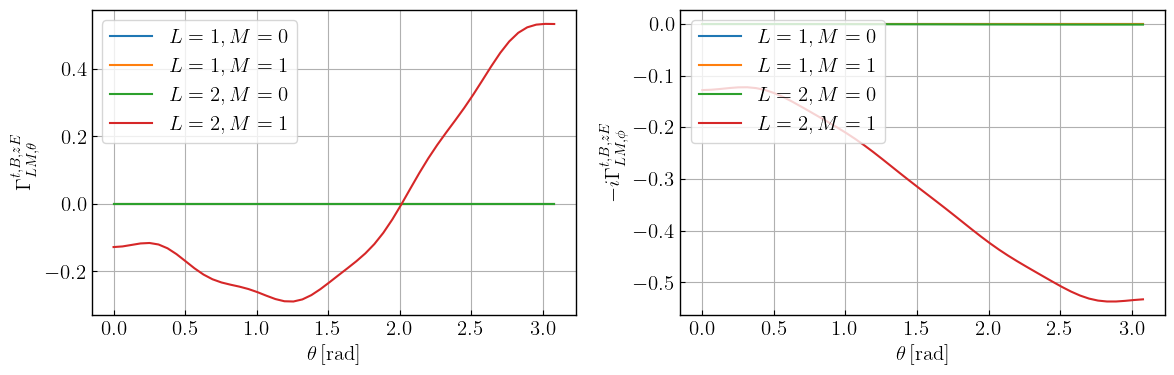

In [620]:
fig = plt.figure(figsize = (12,4),tight_layout=True)
#add_subplot(row,column,place)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

bbox_dict = dict(edgecolor="black",facecolor="white")

ax1.plot(x,gamB_ze_t10_v,label="$L=1,M=0$")
ax1.plot(x,gamB_ze_t11_v,label="$L=1,M=1$")
ax1.plot(x,gamB_ze_t20_v,label="$L=2,M=0$")
ax1.plot(x,gamB_ze_t21_v,label="$L=2,M=1$")

ax1.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax1.set_ylabel("$\Gamma^{t,B,zE}_{LM,\\theta}$")
fig.subplots_adjust(bottom=0.)
ax1.legend(loc='upper left')

ax2.plot(x,gamB_ze_p10_v,label="$L=1,M=0$")
ax2.plot(x,gamB_ze_p11_v,label="$L=1,M=1$")
ax2.plot(x,gamB_ze_p20_v,label="$L=2,M=0$")
ax2.plot(x,gamB_ze_p21_v,label="$L=2,M=1$")

ax2.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax2.set_ylabel("$-i\Gamma^{t,B,zE}_{LM,\phi}$")
fig.subplots_adjust(bottom=0.)
ax2.legend(loc='upper left')


#fig.savefig("/Users/keisuke/Documents/XXX.pdf", bbox_inches='tight')
plt.show()

### $\Gamma^{v,X,Bz}_{LM,\alpha}$

In [621]:
gamI_bz_t00_v = GamI_bz_v(0,0,x,lmax,0)
gamI_bz_t10_v = GamI_bz_v(1,0,x,lmax,0)
gamI_bz_t11_v = GamI_bz_v(1,1,x,lmax,0)

In [622]:
gamI_bz_p00_v = GamI_bz_v(0,0,x,lmax,1)
gamI_bz_p10_v = GamI_bz_v(1,0,x,lmax,1)
gamI_bz_p11_v = GamI_bz_v(1,1,x,lmax,1)

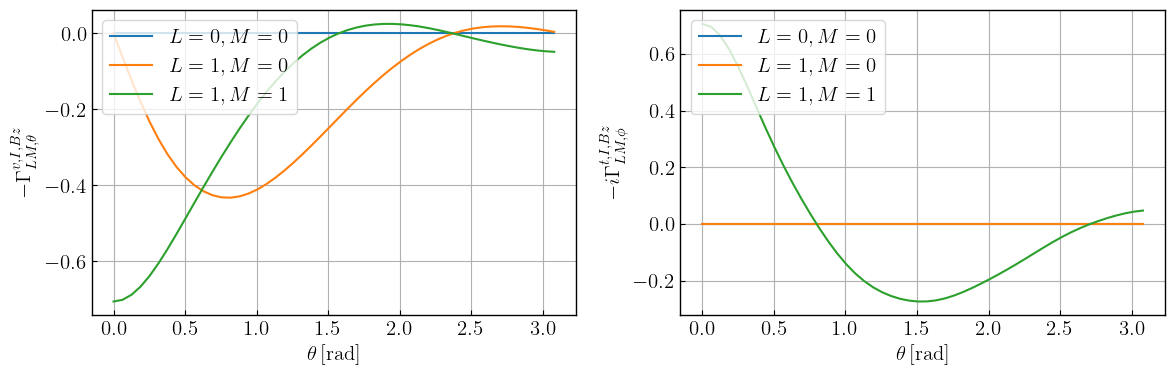

In [623]:
fig = plt.figure(figsize = (12,4),tight_layout=True)
#add_subplot(row,column,place)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

bbox_dict = dict(edgecolor="black",facecolor="white")

ax1.plot(x,gamI_bz_t00_v,label="$L=0,M=0$")
ax1.plot(x,gamI_bz_t10_v,label="$L=1,M=0$")
ax1.plot(x,gamI_bz_t11_v,label="$L=1,M=1$")

ax1.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax1.set_ylabel("$-\Gamma^{v,I,Bz}_{LM,\\theta}$")
fig.subplots_adjust(bottom=0.)
ax1.legend(loc='upper left')

ax2.plot(x,gamI_bz_p00_v,label="$L=0,M=0$")
ax2.plot(x,gamI_bz_p10_v,label="$L=1,M=0$")
ax2.plot(x,gamI_bz_p11_v,label="$L=1,M=1$")

ax2.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax2.set_ylabel("$-i\Gamma^{t,I,Bz}_{LM,\phi}$")
fig.subplots_adjust(bottom=0.)
ax2.legend(loc='upper left')


#fig.savefig("/Users/keisuke/Documents/XXX.pdf", bbox_inches='tight')
plt.show()

In [624]:
gamV_bz_t00_v = GamV_bz_v(0,0,x,lmax,0)
gamV_bz_t10_v = GamV_bz_v(1,0,x,lmax,0)
gamV_bz_t11_v = GamV_bz_v(1,1,x,lmax,0)

In [625]:
gamV_bz_p00_v = GamV_bz_v(0,0,x,lmax,1)
gamV_bz_p10_v = GamV_bz_v(1,0,x,lmax,1)
gamV_bz_p11_v = GamV_bz_v(1,1,x,lmax,1)

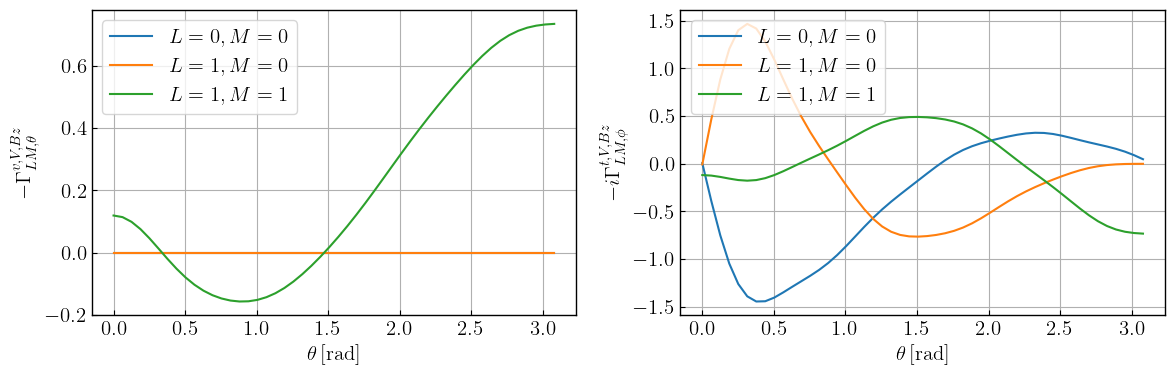

In [626]:
fig = plt.figure(figsize = (12,4),tight_layout=True)
#add_subplot(row,column,place)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

bbox_dict = dict(edgecolor="black",facecolor="white")

ax1.plot(x,gamV_bz_t00_v,label="$L=0,M=0$")
ax1.plot(x,gamV_bz_t10_v,label="$L=1,M=0$")
ax1.plot(x,gamV_bz_t11_v,label="$L=1,M=1$")

ax1.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax1.set_ylabel("$-\Gamma^{v,V,Bz}_{LM,\\theta}$")
fig.subplots_adjust(bottom=0.)
ax1.legend(loc='upper left')

ax2.plot(x,gamV_bz_p00_v,label="$L=0,M=0$")
ax2.plot(x,gamV_bz_p10_v,label="$L=1,M=0$")
ax2.plot(x,gamV_bz_p11_v,label="$L=1,M=1$")

ax2.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax2.set_ylabel("$-i\Gamma^{t,V,Bz}_{LM,\phi}$")
fig.subplots_adjust(bottom=0.)
ax2.legend(loc='upper left')


#fig.savefig("/Users/keisuke/Documents/XXX.pdf", bbox_inches='tight')
plt.show()

In [627]:
gamE_bz_t10_v = GamE_bz_v(1,0,x,lmax,0)
gamE_bz_t11_v = GamE_bz_v(1,1,x,lmax,0)
gamE_bz_t20_v = GamE_bz_v(2,0,x,lmax,0)
gamE_bz_t21_v = GamE_bz_v(2,1,x,lmax,0)

In [628]:
gamE_bz_p10_v = GamE_bz_v(1,0,x,lmax,1)
gamE_bz_p11_v = GamE_bz_v(1,1,x,lmax,1)
gamE_bz_p20_v = GamE_bz_v(2,0,x,lmax,1)
gamE_bz_p21_v = GamE_bz_v(2,1,x,lmax,1)

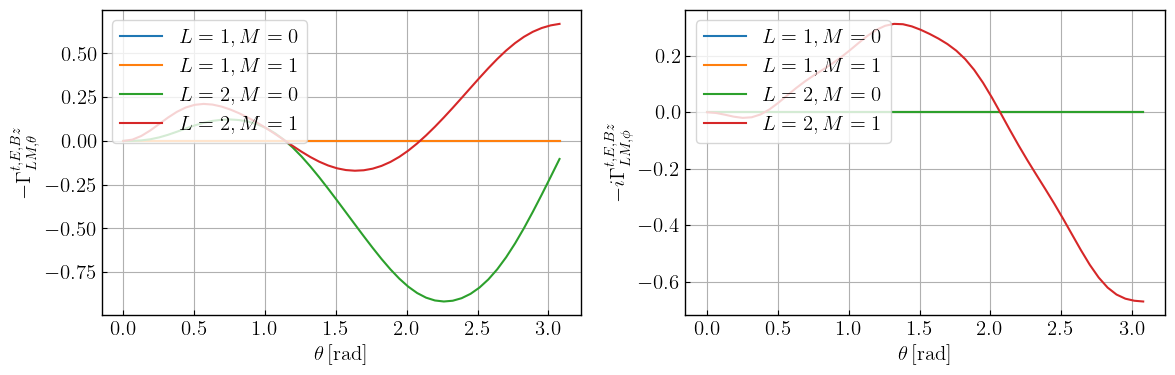

In [629]:
fig = plt.figure(figsize = (12,4),tight_layout=True)
#add_subplot(row,column,place)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

bbox_dict = dict(edgecolor="black",facecolor="white")

ax1.plot(x,gamE_bz_t10_v,label="$L=1,M=0$")
ax1.plot(x,gamE_bz_t11_v,label="$L=1,M=1$")
ax1.plot(x,gamE_bz_t20_v,label="$L=2,M=0$")
ax1.plot(x,gamE_bz_t21_v,label="$L=2,M=1$")

ax1.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax1.set_ylabel("$-\Gamma^{t,E,Bz}_{LM,\\theta}$")
fig.subplots_adjust(bottom=0.)
ax1.legend(loc='upper left')

ax2.plot(x,gamE_bz_p10_v,label="$L=1,M=0$")
ax2.plot(x,gamE_bz_p11_v,label="$L=1,M=1$")
ax2.plot(x,gamE_bz_p20_v,label="$L=2,M=0$")
ax2.plot(x,gamE_bz_p21_v,label="$L=2,M=1$")

ax2.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax2.set_ylabel("$-i\Gamma^{t,E,Bz}_{LM,\phi}$")
fig.subplots_adjust(bottom=0.)
ax2.legend(loc='upper left')


#fig.savefig("/Users/keisuke/Documents/XXX.pdf", bbox_inches='tight')
plt.show()

In [630]:
gamB_bz_t10_v = GamB_bz_v(1,0,x,lmax,0)
gamB_bz_t11_v = GamB_bz_v(1,1,x,lmax,0)
gamB_bz_t20_v = GamB_bz_v(2,0,x,lmax,0)
gamB_bz_t21_v = GamB_bz_v(2,1,x,lmax,0)

In [631]:
gamB_bz_p10_v = GamB_bz_v(1,0,x,lmax,1)
gamB_bz_p11_v = GamB_bz_v(1,1,x,lmax,1)
gamB_bz_p20_v = GamB_bz_v(2,0,x,lmax,1)
gamB_bz_p21_v = GamB_bz_v(2,1,x,lmax,1)

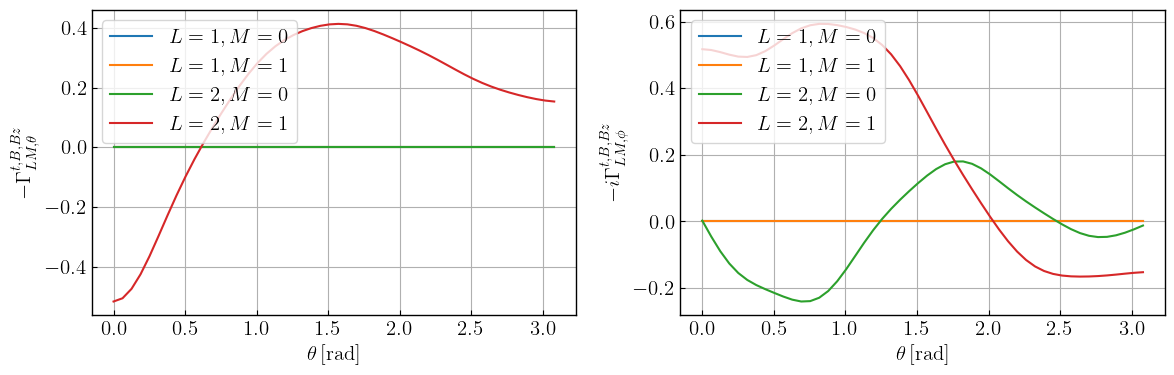

In [632]:
fig = plt.figure(figsize = (12,4),tight_layout=True)
#add_subplot(row,column,place)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

bbox_dict = dict(edgecolor="black",facecolor="white")

ax1.plot(x,gamB_bz_t10_v,label="$L=1,M=0$")
ax1.plot(x,gamB_bz_t11_v,label="$L=1,M=1$")
ax1.plot(x,gamB_bz_t20_v,label="$L=2,M=0$")
ax1.plot(x,gamB_bz_t21_v,label="$L=2,M=1$")

ax1.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax1.set_ylabel("$-\Gamma^{t,B,Bz}_{LM,\\theta}$")
fig.subplots_adjust(bottom=0.)
ax1.legend(loc='upper left')

ax2.plot(x,gamB_bz_p10_v,label="$L=1,M=0$")
ax2.plot(x,gamB_bz_p11_v,label="$L=1,M=1$")
ax2.plot(x,gamB_bz_p20_v,label="$L=2,M=0$")
ax2.plot(x,gamB_bz_p21_v,label="$L=2,M=1$")

ax2.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax2.set_ylabel("$-i\Gamma^{t,B,Bz}_{LM,\phi}$")
fig.subplots_adjust(bottom=0.)
ax2.legend(loc='upper left')


#fig.savefig("/Users/keisuke/Documents/XXX.pdf", bbox_inches='tight')
plt.show()

### $\Gamma^{v,X,z}_{LM,\alpha}$

In [633]:
gamI_zb_t00_v = GamI_zb_v(0,0,x,lmax,0)
gamI_zb_t10_v = GamI_zb_v(1,0,x,lmax,0)
gamI_zb_t11_v = GamI_zb_v(1,1,x,lmax,0)

In [634]:
gamI_zb_p00_v = GamI_zb_v(0,0,x,lmax,1)
gamI_zb_p10_v = GamI_zb_v(1,0,x,lmax,1)
gamI_zb_p11_v = GamI_zb_v(1,1,x,lmax,1)

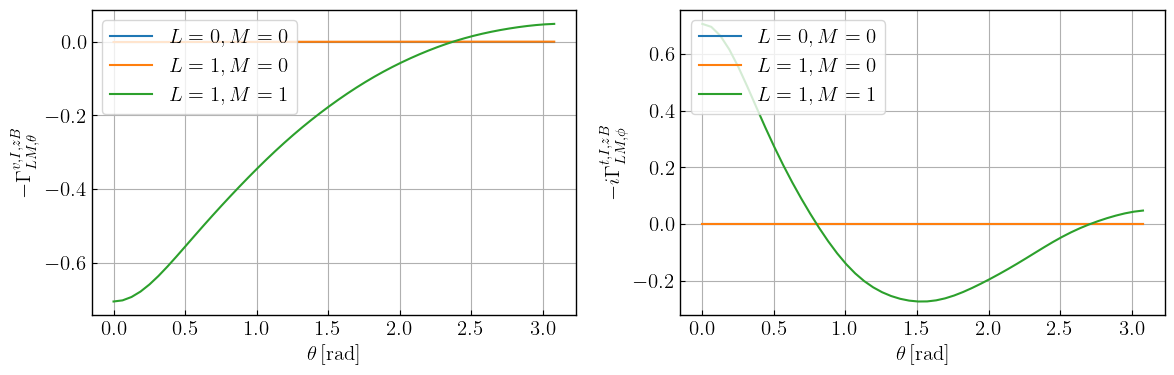

In [635]:
fig = plt.figure(figsize = (12,4),tight_layout=True)
#add_subplot(row,column,place)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

bbox_dict = dict(edgecolor="black",facecolor="white")

ax1.plot(x,gamI_zb_t00_v,label="$L=0,M=0$")
ax1.plot(x,gamI_zb_t10_v,label="$L=1,M=0$")
ax1.plot(x,gamI_zb_t11_v,label="$L=1,M=1$")

ax1.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax1.set_ylabel("$-\Gamma^{v,I,zB}_{LM,\\theta}$")
fig.subplots_adjust(bottom=0.)
ax1.legend(loc='upper left')

ax2.plot(x,gamI_zb_p00_v,label="$L=0,M=0$")
ax2.plot(x,gamI_zb_p10_v,label="$L=1,M=0$")
ax2.plot(x,gamI_zb_p11_v,label="$L=1,M=1$")

ax2.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax2.set_ylabel("$-i\Gamma^{t,I,zB}_{LM,\phi}$")
fig.subplots_adjust(bottom=0.)
ax2.legend(loc='upper left')


#fig.savefig("/Users/keisuke/Documents/XXX.pdf", bbox_inches='tight')
plt.show()

In [636]:
gamV_zb_t00_v = GamV_zb_v(0,0,x,lmax,0)
gamV_zb_t10_v = GamV_zb_v(1,0,x,lmax,0)
gamV_zb_t11_v = GamV_zb_v(1,1,x,lmax,0)

In [637]:
gamV_zb_p00_v = GamV_zb_v(0,0,x,lmax,1)
gamV_zb_p10_v = GamV_zb_v(1,0,x,lmax,1)
gamV_zb_p11_v = GamV_zb_v(1,1,x,lmax,1)

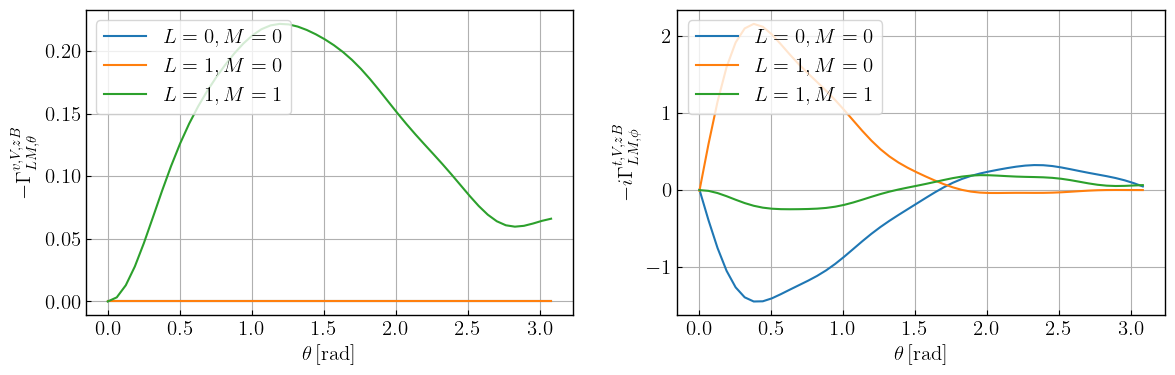

In [638]:
fig = plt.figure(figsize = (12,4),tight_layout=True)
#add_subplot(row,column,place)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

bbox_dict = dict(edgecolor="black",facecolor="white")

ax1.plot(x,gamV_zb_t00_v,label="$L=0,M=0$")
ax1.plot(x,gamV_zb_t10_v,label="$L=1,M=0$")
ax1.plot(x,gamV_zb_t11_v,label="$L=1,M=1$")

ax1.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax1.set_ylabel("$-\Gamma^{v,V,zB}_{LM,\\theta}$")
fig.subplots_adjust(bottom=0.)
ax1.legend(loc='upper left')

ax2.plot(x,gamV_zb_p00_v,label="$L=0,M=0$")
ax2.plot(x,gamV_zb_p10_v,label="$L=1,M=0$")
ax2.plot(x,gamV_zb_p11_v,label="$L=1,M=1$")

ax2.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax2.set_ylabel("$-i\Gamma^{t,V,zB}_{LM,\phi}$")
fig.subplots_adjust(bottom=0.)
ax2.legend(loc='upper left')


#fig.savefig("/Users/keisuke/Documents/XXX.pdf", bbox_inches='tight')
plt.show()

In [639]:
gamE_zb_t10_v = GamE_zb_v(1,0,x,lmax,0)
gamE_zb_t11_v = GamE_zb_v(1,1,x,lmax,0)
gamE_zb_t20_v = GamE_zb_v(2,0,x,lmax,0)
gamE_zb_t21_v = GamE_zb_v(2,1,x,lmax,0)

In [640]:
gamE_zb_p10_v = GamE_zb_v(1,0,x,lmax,1)
gamE_zb_p11_v = GamE_zb_v(1,1,x,lmax,1)
gamE_zb_p20_v = GamE_zb_v(2,0,x,lmax,1)
gamE_zb_p21_v = GamE_zb_v(2,1,x,lmax,1)

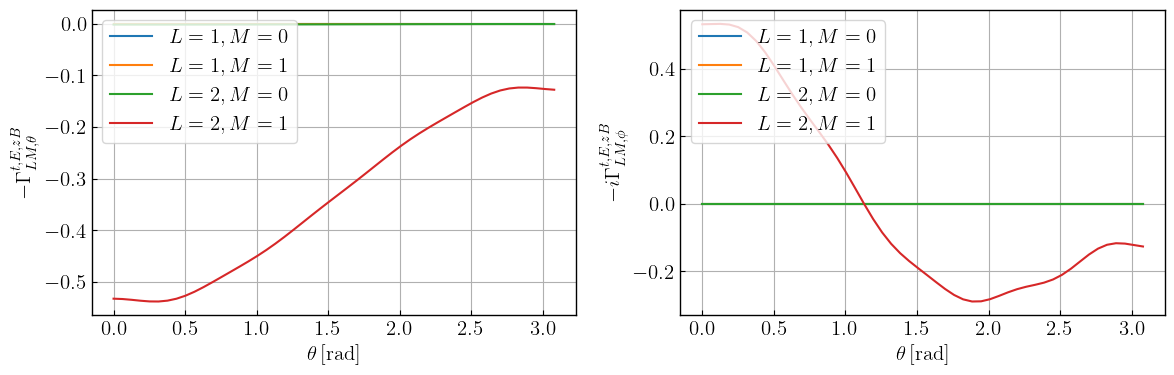

In [641]:
fig = plt.figure(figsize = (12,4),tight_layout=True)
#add_subplot(row,column,place)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

bbox_dict = dict(edgecolor="black",facecolor="white")

ax1.plot(x,gamE_zb_t10_v,label="$L=1,M=0$")
ax1.plot(x,gamE_zb_t11_v,label="$L=1,M=1$")
ax1.plot(x,gamE_zb_t20_v,label="$L=2,M=0$")
ax1.plot(x,gamE_zb_t21_v,label="$L=2,M=1$")

ax1.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax1.set_ylabel("$-\Gamma^{t,E,zB}_{LM,\\theta}$")
fig.subplots_adjust(bottom=0.)
ax1.legend(loc='upper left')

ax2.plot(x,gamE_zb_p10_v,label="$L=1,M=0$")
ax2.plot(x,gamE_zb_p11_v,label="$L=1,M=1$")
ax2.plot(x,gamE_zb_p20_v,label="$L=2,M=0$")
ax2.plot(x,gamE_zb_p21_v,label="$L=2,M=1$")

ax2.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax2.set_ylabel("$-i\Gamma^{t,E,zB}_{LM,\phi}$")
fig.subplots_adjust(bottom=0.)
ax2.legend(loc='upper left')


#fig.savefig("/Users/keisuke/Documents/XXX.pdf", bbox_inches='tight')
plt.show()

In [642]:
gamB_zb_t10_v = GamB_zb_v(1,0,x,lmax,0)
gamB_zb_t11_v = GamB_zb_v(1,1,x,lmax,0)
gamB_zb_t20_v = GamB_zb_v(2,0,x,lmax,0)
gamB_zb_t21_v = GamB_zb_v(2,1,x,lmax,0)

In [643]:
gamB_zb_p10_v = GamB_zb_v(1,0,x,lmax,1)
gamB_zb_p11_v = GamB_zb_v(1,1,x,lmax,1)
gamB_zb_p20_v = GamB_zb_v(2,0,x,lmax,1)
gamB_zb_p21_v = GamB_zb_v(2,1,x,lmax,1)

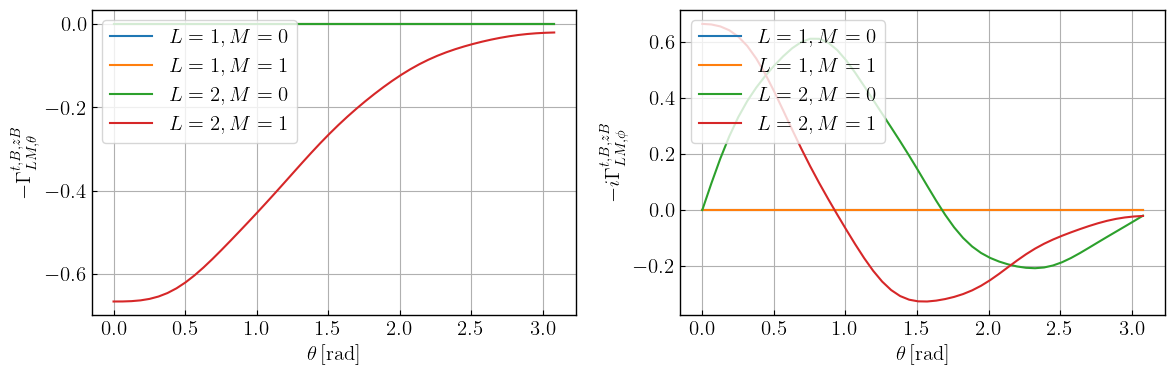

In [644]:
fig = plt.figure(figsize = (12,4),tight_layout=True)
#add_subplot(row,column,place)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

bbox_dict = dict(edgecolor="black",facecolor="white")

ax1.plot(x,gamB_zb_t10_v,label="$L=1,M=0$")
ax1.plot(x,gamB_zb_t11_v,label="$L=1,M=1$")
ax1.plot(x,gamB_zb_t20_v,label="$L=2,M=0$")
ax1.plot(x,gamB_zb_t21_v,label="$L=2,M=1$")

ax1.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax1.set_ylabel("$-\Gamma^{t,B,zB}_{LM,\\theta}$")
fig.subplots_adjust(bottom=0.)
ax1.legend(loc='upper left')

ax2.plot(x,gamB_zb_p10_v,label="$L=1,M=0$")
ax2.plot(x,gamB_zb_p11_v,label="$L=1,M=1$")
ax2.plot(x,gamB_zb_p20_v,label="$L=2,M=0$")
ax2.plot(x,gamB_zb_p21_v,label="$L=2,M=1$")

ax2.set_xlabel("$\\theta\,[\mathrm{rad}]$")
ax2.set_ylabel("$-i\Gamma^{t,B,zB}_{LM,\phi}$")
fig.subplots_adjust(bottom=0.)
ax2.legend(loc='upper left')


#fig.savefig("/Users/keisuke/Documents/XXX.pdf", bbox_inches='tight')
plt.show()